## Bank speeches starter template

The [Kaggle data set](https://www.kaggle.com/datasets/davidgauthier/central-bank-speeches/data) used in this project use speeches from senior central bankers of various influential central banks. The corpus runs from 1997 until 2022. Central banks are institutions that define monetary policy. As such, central bank speeches are widely followed and have a major influence on financial markets.

You can also refer to the raw data set and article used [here](https://www.kaggle.com/datasets/magnushansson/central-bank-speeches).

Note that, due to the large number of speeches contained in the data set, you can expect long running times for processing intensive steps such as sentiment analysis when using the full data set (30-60 mins). It is recommended that you reduce the subset of data under review when creating your prototype and then run the full data set through, if required, once the code behaves as expected. You can reduce the data set to, for example, only process data from the United Kingdom (or other countries) or by looking at specific date ranges.

The code is not extensive and you will be expected to use the provided code as a starting point only. You will also need to use your own creativity and logic to identify useful patterns in the data. You can explore sentiment, polarity and entities/keywords, and should use appropriate levels of granularity and aggregation in order to analyse patterns contained in the data.

In [1]:
# Install the necessary libraries.
# !pip install nltk
# !pip install vaderSentiment
# !pip install textblob
# !pip install nltk wordcloud
# !pip install pycryptodome
# !pip install PyPDF2
# pip install pandas 
# pip install numpy
# pip install numpy==1.23.5 --force-reinstall

In [2]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import shutil
import os
from nltk.tokenize import TreebankWordTokenizer
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from wordcloud import WordCloud
from scipy.stats import pearsonr
import statsmodels.api as sm
import re
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import r2_score
from PyPDF2 import PdfReader
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import warnings
warnings.filterwarnings("ignore")

# -------------------------------
# SETUP NLTK DATA PATH
# -------------------------------
nltk_data_path = os.path.join(os.getenv('APPDATA'), 'nltk_data')
print("NLTK Data Path:", nltk_data_path)

# Remove any incorrect 'punkt_tab' folder if it exists
punkt_tab_path = os.path.join(nltk_data_path, 'tokenizers', 'punkt_tab')
if os.path.exists(punkt_tab_path):
    shutil.rmtree(punkt_tab_path)

# -------------------------------
# DOWNLOAD NLTK RESOURCES
# -------------------------------
nltk.download('stopwords', download_dir=nltk_data_path)

C:\Users\Samuel\AppData\Roaming\Python\Python39\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


NLTK Data Path: C:\Users\Samuel\AppData\Roaming\nltk_data


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Samuel\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Samuel\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Load dataset. Change directory as required.
df = pd.read_csv('all_speeches.csv')

In [4]:
df.head()

reference    country        date                               title  \
0  r901128a_BOA  australia  1990-11-28   A Proper Role for Monetary Policy   
1  r911003a_BOA  australia  1991-10-03                                       
2  r920314a_BOA  australia  1992-03-14                                       
3  r920529a_BOA  australia  1992-05-29                                       
4  r920817a_BOA  australia  1992-08-17                                       

   author  is_gov                                               text  
0  fraser       0  They would no doubt argue that to have two obj...  
1  fraser       0  Today I wish to talk about real interest rates...  
2  fraser       0  I welcome this opportunity to talk about prosp...  
3  fraser       0  It is a pleasure to have this opportunity to a...  
4  fraser       0  As a long-time fan of Don Sanders, I am deligh...

In [5]:
df

reference        country        date  \
0      r901128a_BOA      australia  1990-11-28   
1      r911003a_BOA      australia  1991-10-03   
2      r920314a_BOA      australia  1992-03-14   
3      r920529a_BOA      australia  1992-05-29   
4      r920817a_BOA      australia  1992-08-17   
...             ...            ...         ...   
7716  r221010a_FOMC  united states  2022-10-10   
7717  r221012b_FOMC  united states  2022-10-12   
7718  r221012a_FOMC  united states  2022-10-12   
7719  r221014a_FOMC  united states  2022-10-14   
7720  r221020a_FOMC  united states  2022-10-20   

                                                  title    author  is_gov  \
0                     A Proper Role for Monetary Policy    fraser       0   
1                                                          fraser       0   
2                                                          fraser       0   
3                                                          fraser       0   
4                                                          fraser       0   
...                                                 ...       ...     ...   
7716  Restoring Price Stability in an Uncertain Econ...  brainard       0   
7717  Managing the Promise and Risk of Financial Inn...      barr       0   
7718  Forward Guidance as a Monetary Policy Tool: Co...    bowman       0   
7719  The U.S. Dollar and Central Bank Digital Curre...    waller       0   
7720                                  Welcoming Remarks    bowman       0   

                                                   text  
0     They would no doubt argue that to have two obj...  
1     Today I wish to talk about real interest rates...  
2     I welcome this opportunity to talk about prosp...  
3     It is a pleasure to have this opportunity to a...  
4     As a long-time fan of Don Sanders, I am deligh...  
...                                                 ...  
7716  It is a pleasure to join this discussion today...  
7717  Thank you, Chris, and thank you for the invita...  
7718  Thanks to the Money Marketeers for inviting me...  
7719  Thank you, Professor Jackson, and thank you to...  
7720  Welcome, and thank you for joining us to discu...  

[7721 rows x 7 columns]

In [6]:
df.country.value_counts()

country
euro area         2351
united states     1551
united kingdom    1209
japan              755
canada             620
sweden             600
switzerland        351
australia          284
Name: count, dtype: int64

In [7]:
df[df['country']=='united kingdom'].sort_values('date').head()

reference         country        date  \
4961  r980915a_BOE  united kingdom  1998-09-15   
4962  r981021b_BOE  united kingdom  1998-10-21   
4963  r981021a_BOE  united kingdom  1998-10-21   
4964  r981101a_BOE  united kingdom  1998-11-01   
4965  r981101b_BOE  united kingdom  1998-11-01   

                                                  title   author  is_gov  \
4961                                             Speech   george       0   
4962                                  Britain in Europe   george       0   
4963  Impact of the recent turbulence in internation...     king       1   
4964        Economic policy, with and without forecasts     budd       0   
4965  Inflation targeting in practice: the UK experi...  vickers       0   

                                                   text  
4961  Thank you, Chairman. I'm actually very pleased...  
4962  It's a great pleasure to be here in the beauti...  
4963  Few industries have suffered more from volatil...  
4964  My topic this evening is the use of forecasts ...  
4965  Six years ago this week, sterling left the exc...

In [8]:
# Sort only speeches where the is_gov is = 1
#df1 = df[df['is_gov'] == 1]
#df1

In [9]:
# Demo: Example of adding a column to calculate the string length per speech.
df['len'] = df['text'].str.len()
df

reference        country        date  \
0      r901128a_BOA      australia  1990-11-28   
1      r911003a_BOA      australia  1991-10-03   
2      r920314a_BOA      australia  1992-03-14   
3      r920529a_BOA      australia  1992-05-29   
4      r920817a_BOA      australia  1992-08-17   
...             ...            ...         ...   
7716  r221010a_FOMC  united states  2022-10-10   
7717  r221012b_FOMC  united states  2022-10-12   
7718  r221012a_FOMC  united states  2022-10-12   
7719  r221014a_FOMC  united states  2022-10-14   
7720  r221020a_FOMC  united states  2022-10-20   

                                                  title    author  is_gov  \
0                     A Proper Role for Monetary Policy    fraser       0   
1                                                          fraser       0   
2                                                          fraser       0   
3                                                          fraser       0   
4                                                          fraser       0   
...                                                 ...       ...     ...   
7716  Restoring Price Stability in an Uncertain Econ...  brainard       0   
7717  Managing the Promise and Risk of Financial Inn...      barr       0   
7718  Forward Guidance as a Monetary Policy Tool: Co...    bowman       0   
7719  The U.S. Dollar and Central Bank Digital Curre...    waller       0   
7720                                  Welcoming Remarks    bowman       0   

                                                   text    len  
0     They would no doubt argue that to have two obj...  21288  
1     Today I wish to talk about real interest rates...  18838  
2     I welcome this opportunity to talk about prosp...  21100  
3     It is a pleasure to have this opportunity to a...  23608  
4     As a long-time fan of Don Sanders, I am deligh...  25337  
...                                                 ...    ...  
7716  It is a pleasure to join this discussion today...  11505  
7717  Thank you, Chris, and thank you for the invita...  12816  
7718  Thanks to the Money Marketeers for inviting me...  18600  
7719  Thank you, Professor Jackson, and thank you to...  14060  
7720  Welcome, and thank you for joining us to discu...   6212  

[7721 rows x 8 columns]

In [10]:
# Demo: Convert to lower case and remove punctuation.
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['text'] = df['text'].str.replace('[^\w\s]','',regex=True)
df

reference        country        date  \
0      r901128a_BOA      australia  1990-11-28   
1      r911003a_BOA      australia  1991-10-03   
2      r920314a_BOA      australia  1992-03-14   
3      r920529a_BOA      australia  1992-05-29   
4      r920817a_BOA      australia  1992-08-17   
...             ...            ...         ...   
7716  r221010a_FOMC  united states  2022-10-10   
7717  r221012b_FOMC  united states  2022-10-12   
7718  r221012a_FOMC  united states  2022-10-12   
7719  r221014a_FOMC  united states  2022-10-14   
7720  r221020a_FOMC  united states  2022-10-20   

                                                  title    author  is_gov  \
0                     A Proper Role for Monetary Policy    fraser       0   
1                                                          fraser       0   
2                                                          fraser       0   
3                                                          fraser       0   
4                                                          fraser       0   
...                                                 ...       ...     ...   
7716  Restoring Price Stability in an Uncertain Econ...  brainard       0   
7717  Managing the Promise and Risk of Financial Inn...      barr       0   
7718  Forward Guidance as a Monetary Policy Tool: Co...    bowman       0   
7719  The U.S. Dollar and Central Bank Digital Curre...    waller       0   
7720                                  Welcoming Remarks    bowman       0   

                                                   text    len  
0     they would no doubt argue that to have two obj...  21288  
1     today i wish to talk about real interest rates...  18838  
2     i welcome this opportunity to talk about prosp...  21100  
3     it is a pleasure to have this opportunity to a...  23608  
4     as a longtime fan of don sanders i am delighte...  25337  
...                                                 ...    ...  
7716  it is a pleasure to join this discussion today...  11505  
7717  thank you chris and thank you for the invitati...  12816  
7718  thanks to the money marketeers for inviting me...  18600  
7719  thank you professor jackson and thank you to t...  14060  
7720  welcome and thank you for joining us to discus...   6212  

[7721 rows x 8 columns]

In [11]:
# Subset the data to reduce processing time.
dfi = df[df['country']=='united kingdom'].sort_values('date').reset_index(drop=True)
dfi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   reference  1209 non-null   object
 1   country    1209 non-null   object
 2   date       1209 non-null   object
 3   title      1209 non-null   object
 4   author     1209 non-null   object
 5   is_gov     1209 non-null   int64 
 6   text       1209 non-null   object
 7   len        1209 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 75.7+ KB


In [12]:
%%time
# Demo: Sentiment intensity analysis using Vadar sentiment and a for loop.
sia = SentimentIntensityAnalyzer()
dft = pd.DataFrame(columns=['neg', 'neu', 'pos', 'compound'])
for j in dfi.index:
    score = sia.polarity_scores(dfi.iloc[j,6])
    new_row = pd.DataFrame({'neg': score['neg'], 'neu': score['neu'], 'pos': score['pos'], 'compound': score['compound']}, index=[j])
    dft = pd.concat([dft, new_row], ignore_index=True)
dfi = pd.concat([dfi, dft], axis=1)
dfi

Wall time: 26min 34s


reference         country        date  \
0     r980915a_BOE  united kingdom  1998-09-15   
1     r981021b_BOE  united kingdom  1998-10-21   
2     r981021a_BOE  united kingdom  1998-10-21   
3     r981101a_BOE  united kingdom  1998-11-01   
4     r981101b_BOE  united kingdom  1998-11-01   
...            ...             ...         ...   
1204  r221007a_BOE  united kingdom  2022-10-07   
1205  r221012a_BOE  united kingdom  2022-10-12   
1206  r221015a_BOE  united kingdom  2022-10-15   
1207  r221019a_BOE  united kingdom  2022-10-19   
1208  r221020a_BOE  united kingdom  2022-10-20   

                                                  title     author  is_gov  \
0                                                Speech     george       0   
1                                     Britain in Europe     george       0   
2     Impact of the recent turbulence in internation...       king       1   
3           Economic policy, with and without forecasts       budd       0   
4     Inflation targeting in practice: the UK experi...    vickers       0   
...                                                 ...        ...     ...   
1204         Shocks, inflation, and the policy response    ramsden       0   
1205    Monetary policy: an anchor in challenging times       pill       0   
1206  Monetary policy and financial stability interv...     bailey       1   
1207  Governance of “Decentralised” Finance: Get up,...    wilkins       0   
1208       The inflationary consequences of real shocks  broadbent       0   

                                                   text    len    neg    neu  \
0     thank you chairman im actually very pleased to...  13731  0.084  0.820   
1     its a great pleasure to be here in the beautif...  24263  0.068  0.776   
2     few industries have suffered more from volatil...  13678  0.078  0.805   
3     my topic this evening is the use of forecasts ...  27679  0.051  0.860   
4     six years ago this week sterling left the exch...  27693  0.068  0.840   
...                                                 ...    ...    ...    ...   
1204  thank you very much for the invitation to spea...  24773  0.060  0.865   
1205  huw pill talks about how we will bring inflati...  22398  0.050  0.843   
1206  we are meeting in the most difficult of times ...  10270  0.093  0.820   
1207  these are divided into seven categories suffra...  33040  0.042  0.831   
1208  between them the covid19 pandemic and russias ...  36006  0.069  0.843   

        pos  compound  
0     0.095    0.9925  
1     0.156    0.9999  
2     0.117    0.9984  
3     0.088    0.9996  
4     0.092    0.9991  
...     ...       ...  
1204  0.075    0.9957  
1205  0.107    0.9997  
1206  0.086   -0.9770  
1207  0.127    0.9999  
1208  0.088    0.9990  

[1209 rows x 12 columns]

In [13]:
%%time
# Demo: Using a self defined function with Textblob to calculate polarity and subjectivity.
def generate_polarity_subjectivity(dfs):
    dft2 = TextBlob(dfs).sentiment
    return pd.Series([dft2[0], dft2[1]])

# Apply the function to the data and add two new columns
dfi[['polarity','subjectivity']] = dfi['text'].apply(generate_polarity_subjectivity)
dfi.head()

Wall time: 22 s


reference         country        date  \
0  r980915a_BOE  united kingdom  1998-09-15   
1  r981021b_BOE  united kingdom  1998-10-21   
2  r981021a_BOE  united kingdom  1998-10-21   
3  r981101a_BOE  united kingdom  1998-11-01   
4  r981101b_BOE  united kingdom  1998-11-01   

                                               title   author  is_gov  \
0                                             Speech   george       0   
1                                  Britain in Europe   george       0   
2  Impact of the recent turbulence in internation...     king       1   
3        Economic policy, with and without forecasts     budd       0   
4  Inflation targeting in practice: the UK experi...  vickers       0   

                                                text    len    neg    neu  \
0  thank you chairman im actually very pleased to...  13731  0.084  0.820   
1  its a great pleasure to be here in the beautif...  24263  0.068  0.776   
2  few industries have suffered more from volatil...  13678  0.078  0.805   
3  my topic this evening is the use of forecasts ...  27679  0.051  0.860   
4  six years ago this week sterling left the exch...  27693  0.068  0.840   

     pos  compound  polarity  subjectivity  
0  0.095    0.9925  0.083288      0.435206  
1  0.156    0.9999  0.076711      0.368726  
2  0.117    0.9984  0.091432      0.394993  
3  0.088    0.9996  0.086707      0.476692  
4  0.092    0.9991  0.058467      0.394488

In [14]:
%%time
# --- 7. Drop rows with missing sentiment values ---
dfi = dfi.dropna(subset=['neg', 'neu', 'pos'])

# --- 8. Aggregate sentiment scores ---
total_scores = {
    'Negative': dfi['neg'].sum(),
    'Neutral': dfi['neu'].sum(),
    'Positive': dfi['pos'].sum()
}

Wall time: 3.72 ms


In [15]:
%%time
# Define stopwords
stop_words = set(stopwords.words('english'))

# Initialize tokenizer
tokenizer = TreebankWordTokenizer()

# Tokenize one sample row (change index as needed)
text_sample = dfi.loc[0, 'text']  # Ensure 'dfi' is pre-defined
tokenized_words = tokenizer.tokenize(text_sample)

# Filter words
filtered_text = [word.lower() for word in tokenized_words if word.lower() not in stop_words and word.isalpha()]

# Frequency distribution
freq_dist_of_words = FreqDist(filtered_text)
print("Top 10 most common words:", freq_dist_of_words.most_common(10))

Top 10 most common words: [('economy', 26), ('inflation', 22), ('growth', 15), ('policy', 13), ('demand', 13), ('employment', 10), ('whole', 9), ('sectors', 9), ('know', 8), ('capacity', 8)]
Wall time: 9.38 ms


In [16]:
# Create a frequency distribution object.
freq_dist_of_words = FreqDist(filtered_text)

# Show the 10 most common elements in the data set.
freq_dist_of_words.most_common(10)

[('economy', 26),
 ('inflation', 22),
 ('growth', 15),
 ('policy', 13),
 ('demand', 13),
 ('employment', 10),
 ('whole', 9),
 ('sectors', 9),
 ('know', 8),
 ('capacity', 8)]

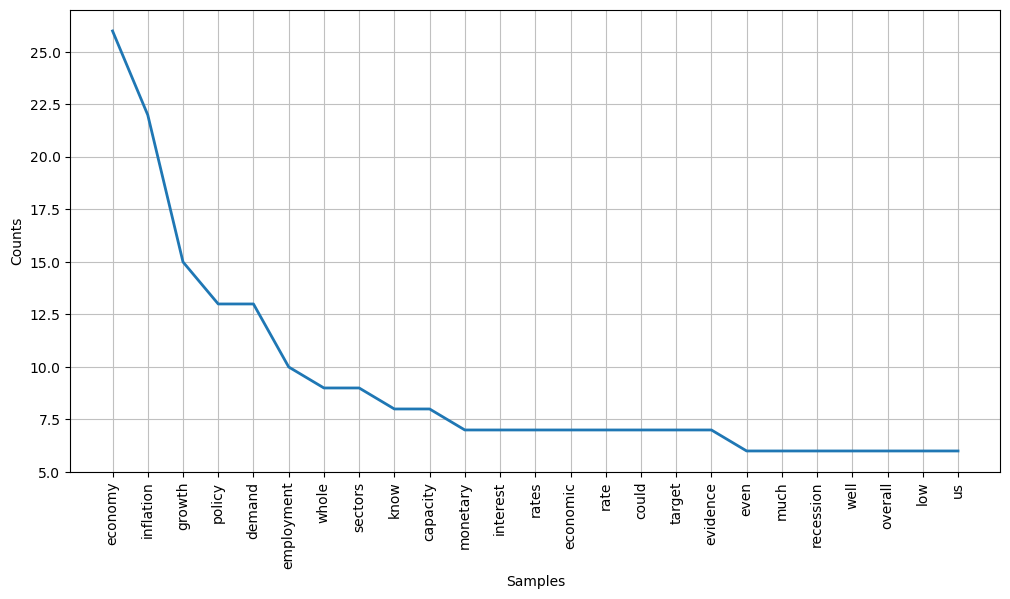

In [17]:
# Set plotting options and plot the data.
fig, ax = plt.subplots(dpi=100)
fig.set_size_inches(12, 6)
freq_dist_of_words.plot(25, cumulative=False)
plt.show()

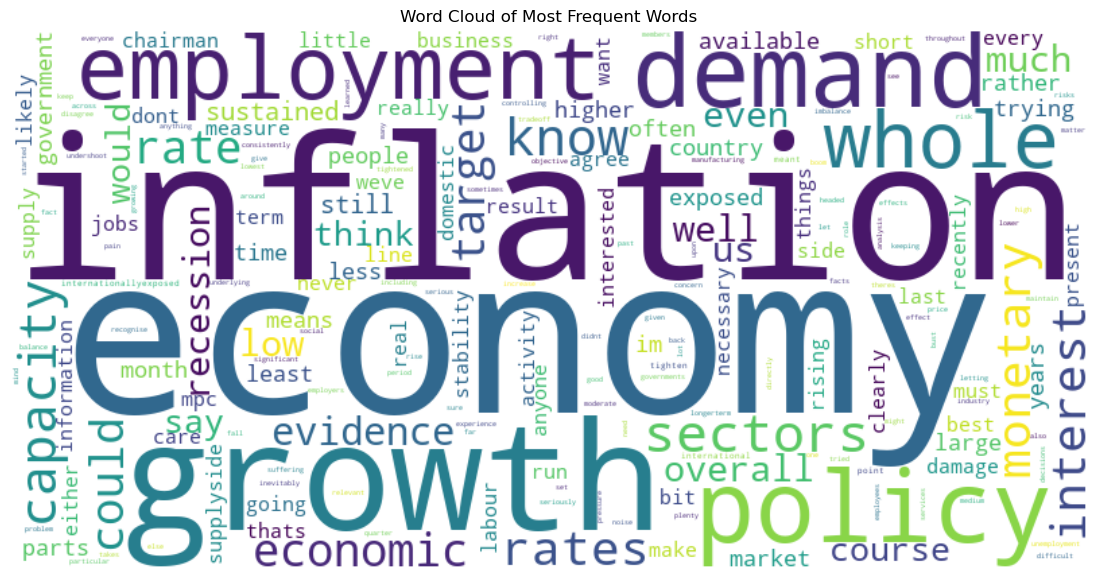

In [18]:
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis')\
    .generate_from_frequencies(freq_dist_of_words)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Most Frequent Words')
plt.show()

In [19]:
# Has sentiment changed over time?
# Yes, based on speech sentiment analysis, the Bank of England's speech tone does vary over different economic cycles.

# How has it changed?

# Sentiment tended to drop sharply during major economic crises (Dot-Com Bubble, Global Financial Crisis 2007–09, Brexit 2016, Covid-19 2020).

# Sentiment improves during recovery phases and deteriorates before or during uncertainty.

# In general, more positive speeches are seen during stable economic times, and more cautious or negative speeches during recessions, crises, or major monetary policy shifts.

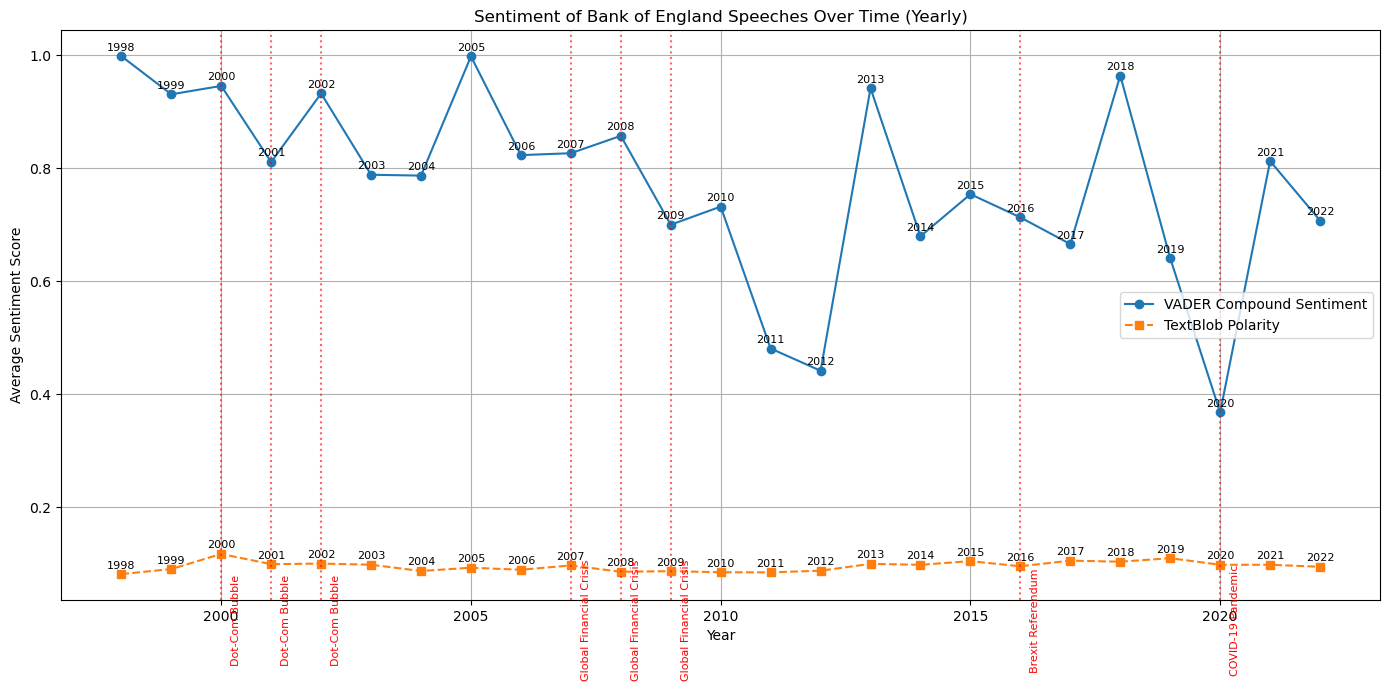

In [20]:
# Step 1: Parse Dates
dfi['date'] = pd.to_datetime(dfi['date'], errors='coerce')
dfi = dfi.dropna(subset=['date'])
dfi['year'] = dfi['date'].dt.year

# Step 2: Generate Sentiment Scores if missing
sia = SentimentIntensityAnalyzer()
if 'vader_compound' not in dfi.columns:
    dfi['vader_compound'] = dfi['text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

if 'textblob_polarity' not in dfi.columns:
    dfi['textblob_polarity'] = dfi['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Step 3: Group speeches by year
sentiment_yearly = dfi.groupby('year')[['vader_compound', 'textblob_polarity']].mean().reset_index()

# Step 4: Plot Sentiment Trends by Year
plt.figure(figsize=(14, 7))

plt.plot(sentiment_yearly['year'], sentiment_yearly['vader_compound'], marker='o', label='VADER Compound Sentiment')
plt.plot(sentiment_yearly['year'], sentiment_yearly['textblob_polarity'], marker='s', linestyle='--', label='TextBlob Polarity')

# Annotate each year
for i, row in sentiment_yearly.iterrows():
    plt.text(row['year'], row['vader_compound'] + 0.01, str(int(row['year'])), fontsize=8, color='black', ha='center')
    plt.text(row['year'], row['textblob_polarity'] + 0.01, str(int(row['year'])), fontsize=8, color='black', ha='center')


# Highlight economic events
event_years = {
    2000: 'Dot-Com Bubble',
    2001: 'Dot-Com Bubble',
    2002: 'Dot-Com Bubble',
    2007: 'Global Financial Crisis',
    2008: 'Global Financial Crisis',
    2009: 'Global Financial Crisis',
    2016: 'Brexit Referendum',
    2020: 'COVID-19 Pandemic'
}

for year, event in event_years.items():
    if year in sentiment_yearly['year'].values:
        plt.axvline(x=year, color='red', linestyle=':', alpha=0.6)
        plt.text(year + 0.2, 0, event, rotation=90, verticalalignment='center', fontsize=8, color='red')

plt.title('Sentiment of Bank of England Speeches Over Time (Yearly)')
plt.xlabel('Year')
plt.ylabel('Average Sentiment Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('sentiment_speeches_overtime_yearly.jpg')
plt.show()

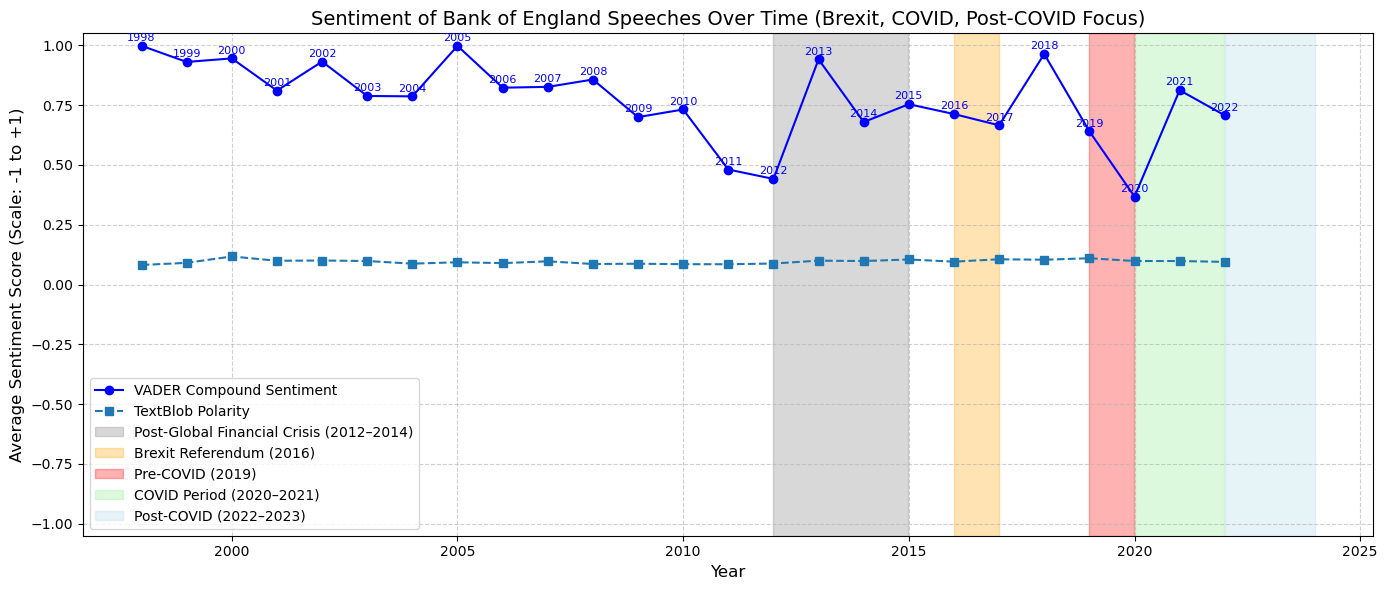

In [21]:
# Step 1: Parse Dates
dfi['date'] = pd.to_datetime(dfi['date'], errors='coerce')
dfi = dfi.dropna(subset=['date'])
dfi['year'] = dfi['date'].dt.year

# Step 2: Generate Sentiment Scores if missing
sia = SentimentIntensityAnalyzer()
if 'vader_compound' not in dfi.columns:
    dfi['vader_compound'] = dfi['text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

if 'textblob_polarity' not in dfi.columns:
    dfi['textblob_polarity'] = dfi['text'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Step 3: Group speeches by year
sentiment_yearly = dfi.groupby('year')[['vader_compound', 'textblob_polarity']].mean().reset_index()

# Step 4: Plot Sentiment Trends by Year
plt.figure(figsize=(14, 6))

# Plot lines
plt.plot(
    sentiment_yearly['year'],
    sentiment_yearly['vader_compound'],
    marker='o',
    label='VADER Compound Sentiment',
    color='blue'
)

plt.plot(sentiment_yearly['year'], sentiment_yearly['textblob_polarity'], marker='s', linestyle='--', label='TextBlob Polarity')


# Annotate each year
for i, row in sentiment_yearly.iterrows():
    plt.text(row['year'], row['vader_compound'] + 0.02, str(int(row['year'])), fontsize=8, color='blue', ha='center')

# Highlight key periods

# Post-Global Financial Crisis (~2012-2014 for aftermath tone)
plt.axvspan(2012, 2014.99, color='grey', alpha=0.3, label='Post-Global Financial Crisis (2012–2014)')

# Brexit period ~ 2016
plt.axvspan(2016, 2016.99, color='orange', alpha=0.3, label='Brexit Referendum (2016)')

# Pre-COVID ~ 2019-Jan 2020
plt.axvspan(2019, 2019.99, color='red', alpha=0.3, label='Pre-COVID (2019)')

# COVID ~ 2020 - 2021
plt.axvspan(2020, 2021.99, color='lightgreen', alpha=0.3, label='COVID Period (2020–2021)')

# Post-COVID ~ 2022 onwards
plt.axvspan(2022, 2023.99, color='lightblue', alpha=0.3, label='Post-COVID (2022–2023)')

# Formatting
plt.title('Sentiment of Bank of England Speeches Over Time (Brexit, COVID, Post-COVID Focus)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Sentiment Score (Scale: -1 to +1)', fontsize=12)

# Force Y-axis to -1 to +1
plt.ylim(-1.05, 1.05)

# Legend + Grid
plt.legend(loc='lower left')
plt.grid(True, linestyle='--', alpha=0.6)

# Final layout
plt.tight_layout()

# Save + Show
plt.savefig('sentiment_speeches_brexit_covid_postcovid_scaled.jpg')
plt.show()

In [22]:
# The analysis of Bank of England speeches volatile or fluanctuation movement over the time under review. 1998 to 2023 reveals a higher in Vedar compound score sentiment gradual movement in sentiment tone when compared with the TextBlob polairty score. While the VADER sentiment scores recorded the most positive trend in 1998, 2005, 2013 and 2018, it recorded the lowest shifts in 2012, 2020, 2011 and 2019 while its recorded a more stable shift between 1999 and 2004. In contrast, TextBlob polarity scores exhibited minimal variation and stable movement within the same period, suggesting limited sensitivity. These findings indicate that VADER is a more effective tool for capturing sentiment dynamics in the central bank public speech.




#The above analysis of Bank of England (BoE) speeches from 1998 to 2023 reveals varying sentiment trends as measured by VADER compound scores and TextBlob polarity scores. The VADER sentiment scores demonstrate greater sensitivity to fluctuations in sentiment tone over time, capturing notable positive sentiment peaks in 1998, 2005, 2013, and 2018, and marked downturns in 2012, 2020, 2011, and 2019. A period of relative sentiment stability was observed between 1999 and 2004.

#In contrast, TextBlob polarity scores displayed minimal variation throughout the same period, indicating a more stable interpretation of speech sentiment. This comparative analysis indicates that VADER is more robust in detecting complex changes in central bank speeches and is better suited for time series sentiment analysis of BoE public statements.

#Given the dynamic nature of monetary policy communication, particularly during economic transitions and crises, VADER’s higher granularity and responsiveness provide a more effective tool for capturing sentiment changes and supporting economic interpretation. These findings further supports the need for appropriate sentiment analysis tools when evaluating the sentiment speeches of the BoE discourse over period of time.


# The speeches recorded the strongest posutuve tone in 1980 and 2025, and  lowest tone at the start of 2020 which could assosciated with the start COVID 19 pandemic lockdown, although the speeches tone trend between 1998 and 2023 fluntuated between strong and weak positve sentiment. The speeches tone trends still indicated a change overtime which remained low in 2022 be the end the COVID 19 pandemic lockdown. 


In [23]:
#Period	Observations
#2000-2002 : Declining sentiment during Dot-Com crash
#2007-2009 : Major drop in sentiment during Global Financial Crisis
#2016 : Negative swing during Brexit uncertainty
#2020 : Sharp drop during COVID-19 pandemic
#2021 onward : Slight recovery as the economy reopened

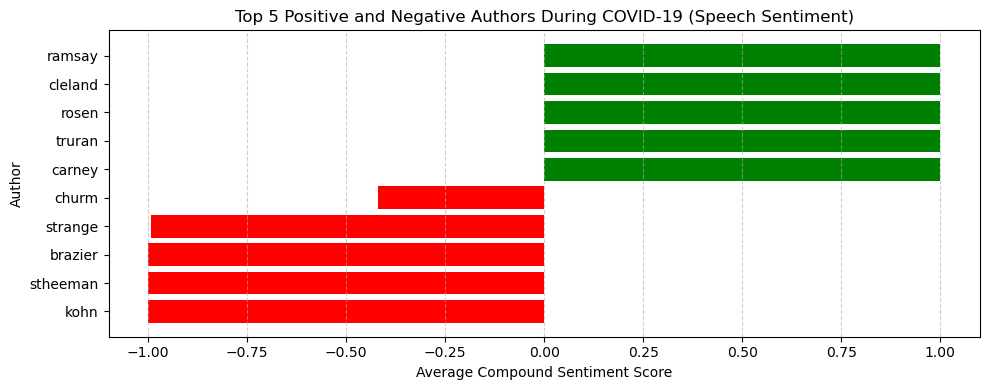

In [24]:
# --- 2. Filter for COVID-19 period ---
df_covid = dfi[(dfi['date'] >= '2020-02-01') & (dfi['date'] <= '2021-12-31')].copy()

# --- 3. Compute VADER sentiment if not already included ---
sia = SentimentIntensityAnalyzer()
df_covid['compound'] = df_covid['text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# --- 4. Aggregate average sentiment by author ---
author_sentiment = df_covid.groupby('author')['compound'].mean().reset_index()
author_sentiment = author_sentiment.sort_values('compound', ascending=False)

# --- 5. Extract top 5 positive and top 5 negative authors ---
top_positive = author_sentiment.head(5)
top_negative = author_sentiment.tail(5)

# --- 6. Combine for single bar chart ---
combined = pd.concat([top_positive, top_negative])
combined = combined.sort_values('compound')  # Sort for visual clarity

# --- 7. Plot combined bar chart ---
plt.figure(figsize=(10, 4))
colors = combined['compound'].apply(lambda x: 'green' if x > 0 else 'red')

plt.barh(combined['author'], combined['compound'], color=colors)
plt.title("Top 5 Positive and Negative Authors During COVID-19 (Speech Sentiment)")
plt.xlabel("Average Compound Sentiment Score")
plt.ylabel("Author")
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()

# Save and display
plt.savefig('top_5_authors_positive_negative_sentiment_covid.jpg')
plt.show()

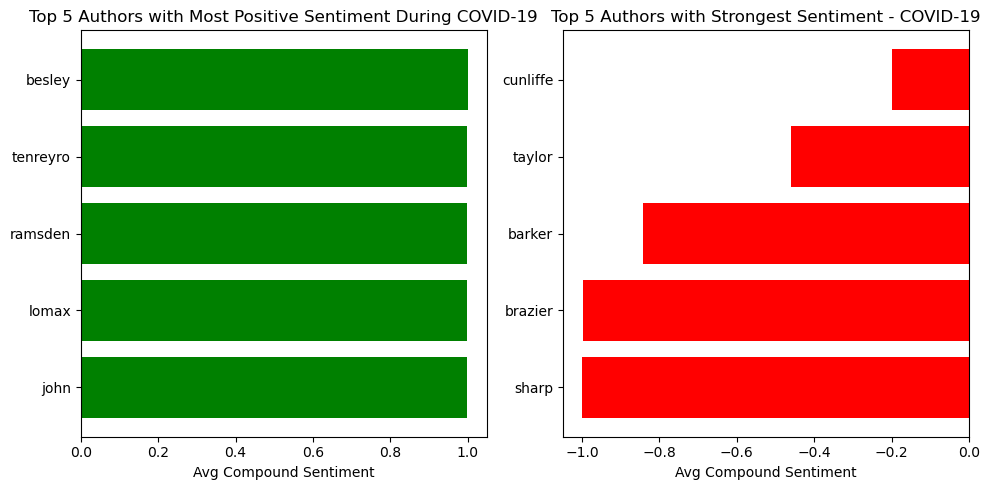

In [25]:

# --- 2. Filter for COVID-19 period ---
df_covid = dfi[(df['date'] >= '2020-02-01') & (dfi['date'] <= '2021-12-31')].copy()

# --- 3. Compute VADER sentiment if not already included ---
sia = SentimentIntensityAnalyzer()
df_covid['compound'] = df_covid['text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# --- 4. Aggregate average sentiment by author ---
author_sentiment = df_covid.groupby('author')['compound'].mean().reset_index()
author_sentiment = author_sentiment.sort_values('compound', ascending=False)

# --- 5. Extract authors with highest/lowest sentiments ---
top_positive = author_sentiment.head(5)
top_negative = author_sentiment.tail(5)

# --- 6. Plot top 5 positive and negative authors ---
plt.figure(figsize=(10, 5))

# Positive
plt.subplot(1, 2, 1)
plt.barh(top_positive['author'], top_positive['compound'], color='green')
plt.title("Top 5 Authors with Most Positive Sentiment During COVID-19")
plt.xlabel("Avg Compound Sentiment")
plt.gca().invert_yaxis()

# Negative
plt.subplot(1, 2, 2)
plt.barh(top_negative['author'], top_negative['compound'], color='red')
plt.title("Top 5 Authors with Strongest Sentiment - COVID-19")
plt.xlabel("Avg Compound Sentiment")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('Top_5_authors_sentiment_speech.jpg')
plt.show()

In [26]:
# The above charts is used to identified the top 5 Aurthors that made the hihgest postive sentiment and the strongest negative sentiment during the COVID 19 pandemic time. This can be used by the BoE to internally investigate questions behind each author's rethorics and how it impacted market during this period.


#The chart identifies The top five Bank of England authors with the strongest positive and negative sentiment during the COVID-19 pandemic (2020–2021), based on VADER sentiment analysis. These insights can support internal evaluation of individual rhetorical tone and its potential influence on market expectations and public confidence. Understanding these sentiment patterns may help the BoE enhance strategic communication during periods of economic uncertainty and ensuring it aligns between public messaging and monetary policy objectives.

In [27]:
#Sources of Data:
#ONS - UK GDP quarterly/yearly reports
#ONS (Office for National Statistics) Labour Market Overview
#Bank of England's
# Yahoo Finance 


Pre-COVID Correlation (2016–Jan 2020):
                vader_compound      rate
vader_compound        1.000000  0.000254
rate                  0.000254  1.000000

During COVID Correlation (Feb 2020–Dec 2021):
                vader_compound  rate
vader_compound             1.0   1.0
rate                       1.0   1.0

Post-COVID Correlation (Jan 2022–Dec 2023):
                vader_compound      rate
vader_compound        1.000000  0.187694
rate                  0.187694  1.000000


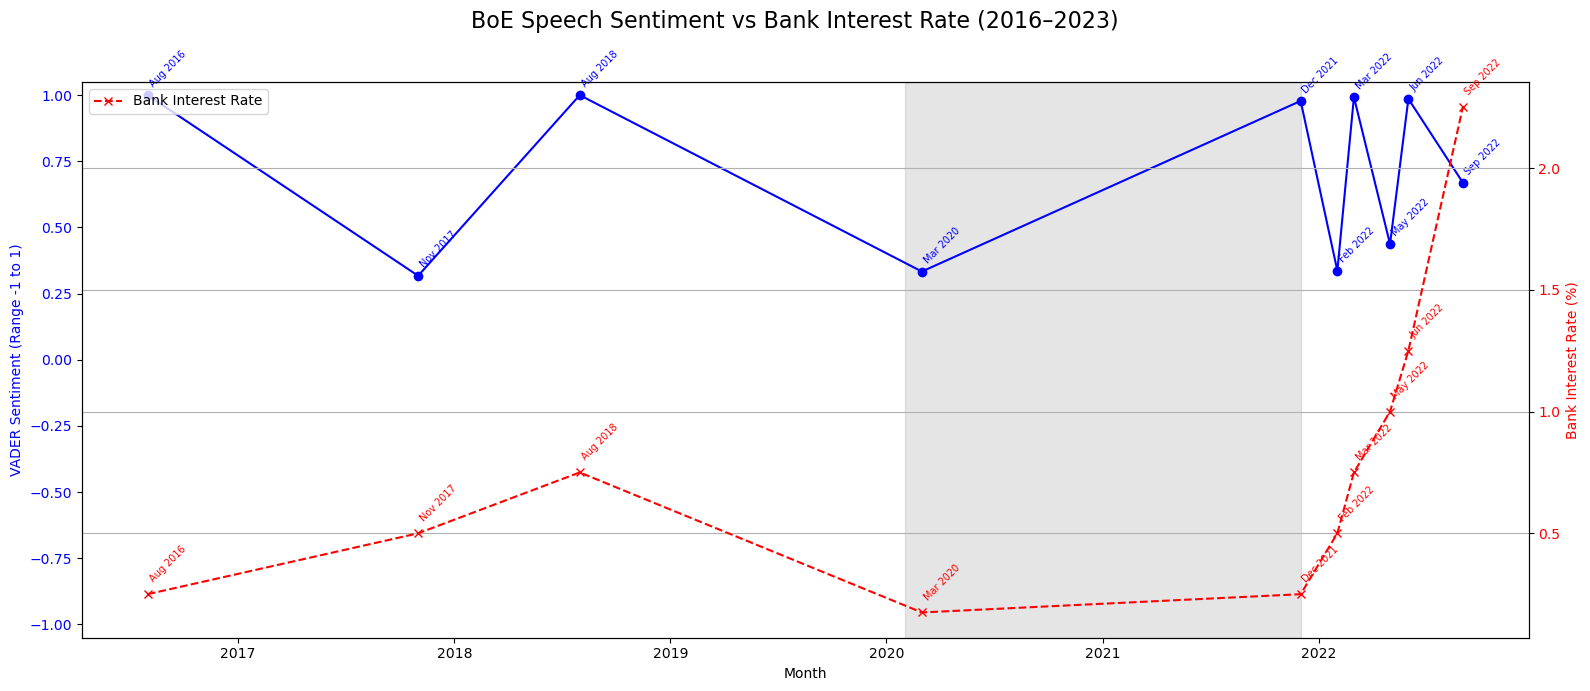


Overall Correlation between BoE Speech Sentiment and MPR Sentiment:
                vader_compound      rate
vader_compound        1.000000  0.077869
rate                  0.077869  1.000000


In [84]:

# --- 1. Load and process speech sentiment data ---
dfi['date'] = pd.to_datetime(dfi['date'], dayfirst=True)
dfi['month'] = dfi['date'].dt.to_period('M')

# Monthly average sentiment
sentiment_monthly = dfi.groupby('month')[['vader_compound']].mean().reset_index()
sentiment_monthly['month'] = sentiment_monthly['month'].dt.to_timestamp()

# Filter to relevant date range
sentiment_monthly = sentiment_monthly[
    (sentiment_monthly['month'] >= '2016-01') & (sentiment_monthly['month'] <= '2024-12')
]

# --- 2. Load and process Bank Rate data ---
bank_rate_df = pd.read_csv('Bank_Rate_Changes.csv')
bank_rate_df.columns = bank_rate_df.columns.str.strip()

# Ensure expected column names
if 'date' in bank_rate_df.columns and 'bank_rate' in bank_rate_df.columns:
    bank_rate_df.rename(columns={'bank_rate': 'rate'}, inplace=True)
else:
    raise KeyError("Expected columns 'date' and 'bank_rate' not found in CSV.")

# Convert date and numeric types
bank_rate_df['date'] = pd.to_datetime(bank_rate_df['date'], dayfirst=True)
bank_rate_df['rate'] = pd.to_numeric(bank_rate_df['rate'], errors='coerce')
bank_rate_df['month'] = bank_rate_df['date'].dt.to_period('M')

# Monthly average interest rates
bank_rate_monthly = bank_rate_df.groupby('month')['rate'].mean().reset_index()
bank_rate_monthly['month'] = bank_rate_monthly['month'].dt.to_timestamp()

# Filter to match sentiment range
bank_rate_monthly = bank_rate_monthly[
    (bank_rate_monthly['month'] >= '2016-01') & (bank_rate_monthly['month'] <= '2024-12')
]

# --- 3. Merge datasets ---
merged_df = pd.merge(sentiment_monthly, bank_rate_monthly, on='month', how='inner')
merged_df.fillna(0, inplace=True)

# --- 4. Define periods ---
pre_covid = merged_df[(merged_df['month'] >= '2016-01') & (merged_df['month'] < '2020-02')]
during_covid = merged_df[(merged_df['month'] >= '2020-02') & (merged_df['month'] <= '2021-12')]
post_covid = merged_df[(merged_df['month'] > '2021-12') & (merged_df['month'] <= '2023-12')]

# --- 5. Print correlation coefficients ---
print("\nPre-COVID Correlation (2016–Jan 2020):")
print(pre_covid[['vader_compound', 'rate']].corr())

print("\nDuring COVID Correlation (Feb 2020–Dec 2021):")
print(during_covid[['vader_compound', 'rate']].corr())

print("\nPost-COVID Correlation (Jan 2022–Dec 2023):")
print(post_covid[['vader_compound', 'rate']].corr())

# --- 6. Plot sentiment vs interest rate with dual y-axis ---

fig, ax1 = plt.subplots(figsize=(16, 7))

# Left y-axis: VADER Sentiment
color = 'blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('VADER Sentiment (Range -1 to 1)', color=color)
ax1.plot(merged_df['month'], merged_df['vader_compound'], color=color, marker='o', label='VADER Sentiment')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-1.05, 1.05)  # ensure -1 to 1 scale for sentiment

# Annotate VADER Sentiment
for i, row in merged_df.iterrows():
    month_str = row['month'].strftime('%b %Y')
    ax1.text(row['month'], row['vader_compound'] + 0.03, month_str, fontsize=7, color=color, rotation=45)

# COVID period shading
ax1.axvspan(pd.to_datetime('2020-02'), pd.to_datetime('2021-12'), color='grey', alpha=0.2, label='COVID-19 Period')

# Right y-axis: Bank Interest Rate
ax2 = ax1.twinx()
color = 'red'
ax2.set_ylabel('Bank Interest Rate (%)', color=color)
ax2.plot(merged_df['month'], merged_df['rate'], color=color, marker='x', linestyle='--', label='Bank Interest Rate')
ax2.tick_params(axis='y', labelcolor=color)

# Annotate Interest Rate
for i, row in merged_df.iterrows():
    month_str = row['month'].strftime('%b %Y')
    ax2.text(row['month'], row['rate'] + 0.05, month_str, fontsize=7, color=color, rotation=45)

# Title and formatting
fig.suptitle('BoE Speech Sentiment vs Bank Interest Rate (2016–2023)', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.legend()
# Save the figure
plt.savefig('sentiment_vs_interest_rate_dual_axis.jpg', dpi=300)
plt.show()

# Correlation Analysis 
print("\nOverall Correlation between BoE Speech Sentiment and MPR Sentiment:")
print(merged_df[['vader_compound', 'rate']].corr())

In [29]:
# The analysis above indicates extreme insignificant corroletion between the sentiment of the speech and bank interest rate during the pre-COVID 19, but show a strong statistcial correlation between the sentiment of the speech and bank interest rate during the COVID 19 pandemic period while the slight correlation between the sentiment of the speech and bank interest rate during the post-COVID 19 an indictation that the sentiment of the BoE speech was not the only determanant of the rates. This implies that the rates responded more to the impact of the pandemic on business and household in order to ease the lending rate to bussinesses and provide aacess to loans to house to boost the purchasing power as expected by the market.

In [30]:
# Between August 2017 and early 2020 during the pre-COVID period, the bank interest rate increased slightly above 0.5 points from August 2016, dropped below the 0.5 point between Augst 2018 to early 2020 despite the downward movement of the speeches sentiment from strong positive to a weak positive sentiment indictating an insignificant weak relationship with a correlation value of 0.000254. The interest maintian a much steady movement or trends between March 2020 to December 2021 due to the Bank of England monitory intervention to support businesses and household from the high inflation and liquidity challnges to enable access to credit due to the impact of the severe economic downturn caused by the COVID 19 lackdown in comparision to the intensified movement of the speeches sentiment tone from negative to positive to aid stabilise the economic outlook indicating a strong positive relationship with a correllation value of 1. From December 2021 to the end of the period under review the interest rate maintained upward movement despite the random fluacntuation of the speeches from strong positive to neutral sentiment indication a weak positive relationship between the speeches and the bank interest rates during this periods. 

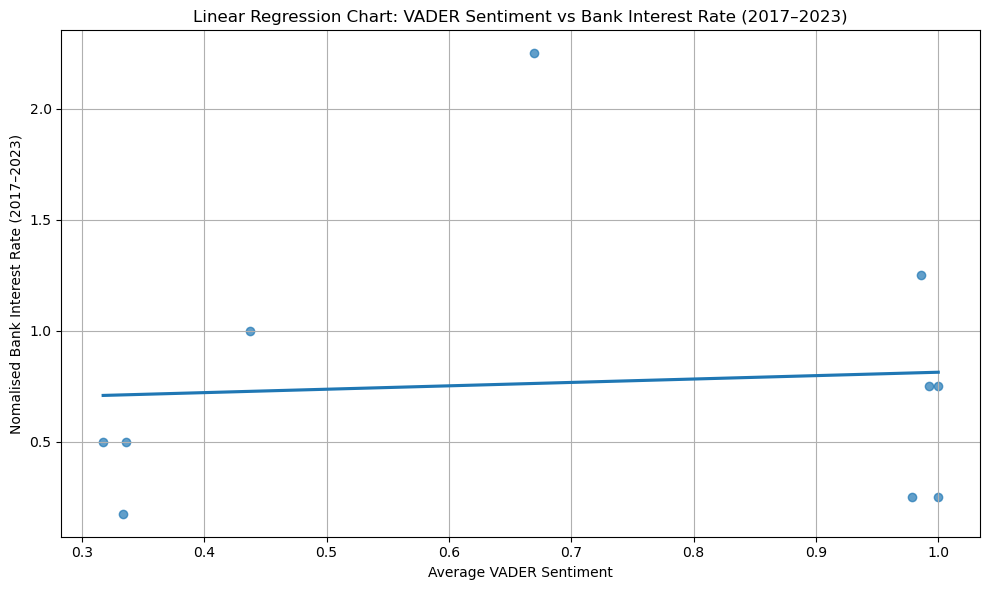

In [31]:
# --- Linear Regression Plot: VADER Sentiment vs Bank Interest Rate ---
plt.figure(figsize=(10, 6))
sns.regplot(data=merged_df, x='vader_compound', y='rate', ci=None, scatter_kws={'alpha':0.7})
plt.title('Linear Regression Chart: VADER Sentiment vs Bank Interest Rate (2017–2023)')
plt.xlabel('Average VADER Sentiment')
plt.ylabel('Nomalised Bank Interest Rate (2017–2023)')
plt.grid(True)
plt.tight_layout()
plt.show()


Pre-COVID (2016–Jan 2020) Correlation (r): nan

During COVID (Feb 2020–Dec 2021) Correlation (r): 0.287

Post-COVID (Jan 2022–Dec 2023) Correlation (r): nan

Linear Regression R² Score: 0.125


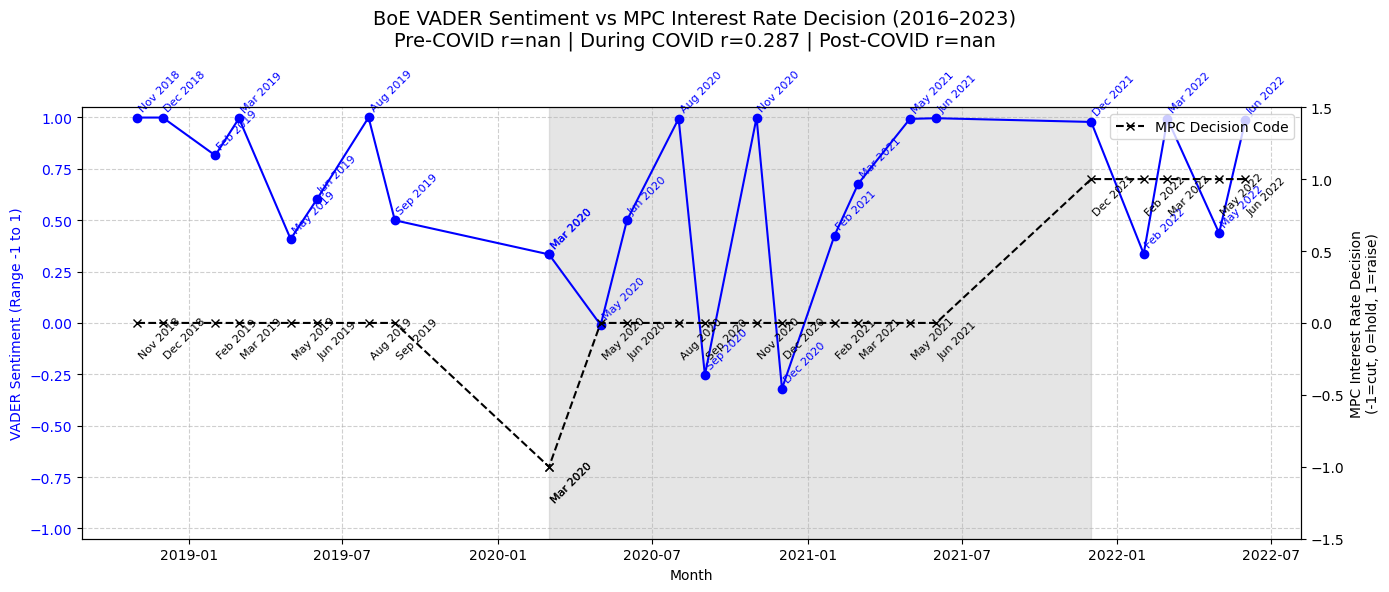


Overall Correlation between BoE Speech Sentiment and MPC rate decision:
                vader_compound  decision_code
vader_compound        1.000000       0.228015
decision_code         0.228015       1.000000


In [91]:
# --- 1. Load and preprocess dataset ---
merged_df = pd.read_csv("mpc_sentiment_merged.csv")
merged_df['date'] = pd.to_datetime(merged_df['date'], errors='coerce')
merged_df['month'] = pd.to_datetime(merged_df['month'], errors='coerce')

# --- 2. Encode MPC decision ---
label_map = {'cut': -1, 'hold': 0, 'raise': 1}
merged_df['decision_code'] = merged_df['decision'].str.lower().map(label_map)

# --- 3. Drop rows with missing key columns ---
merged_df = merged_df.dropna(subset=['vader_compound', 'vader_lag1', 'vader_lag2', 'decision_code'])

# --- 4. Filter to desired time range ---
merged_df = merged_df[(merged_df['month'] >= '2016-01') & (merged_df['month'] <= '2023-12')]

# --- 5. Define Periods ---
pre_covid = merged_df[(merged_df['month'] >= '2016-01') & (merged_df['month'] < '2020-02')]
during_covid = merged_df[(merged_df['month'] >= '2020-02') & (merged_df['month'] <= '2021-12')]
post_covid = merged_df[(merged_df['month'] > '2021-12') & (merged_df['month'] <= '2023-12')]

# --- 6. Correlation Analysis ---
from scipy.stats import pearsonr

def compute_correlation(df, label):
    if len(df) >= 2:
        r_value, _ = pearsonr(df['vader_compound'], df['decision_code'])
        print(f"\n{label} Correlation (r): {r_value:.3f}")
        return r_value
    else:
        print(f"\n{label} Correlation (r): Not enough data")
        return None

r_pre_covid = compute_correlation(pre_covid, "Pre-COVID (2016–Jan 2020)")
r_during_covid = compute_correlation(during_covid, "During COVID (Feb 2020–Dec 2021)")
r_post_covid = compute_correlation(post_covid, "Post-COVID (Jan 2022–Dec 2023)")

# --- 7. Linear Regression Analysis ---
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X = merged_df[['vader_compound', 'vader_lag1', 'vader_lag2']]
y = merged_df['decision_code']

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

print(f"\nLinear Regression R² Score: {r2:.3f}")

# --- 8. Trend line plot with dual y-axis ---
fig, ax1 = plt.subplots(figsize=(14, 6))

# Left y-axis → VADER Sentiment
color = 'blue'
ax1.set_xlabel("Month")
ax1.set_ylabel("VADER Sentiment (Range -1 to 1)", color=color)
ax1.plot(merged_df['month'], merged_df['vader_compound'], color=color, marker='o', label='VADER Sentiment')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-1.05, 1.05)

# Highlight COVID period on ax1
ax1.axvspan(pd.to_datetime('2020-03'), pd.to_datetime('2021-12'), color='gray', alpha=0.2, label='COVID-19 Period')

# Annotate VADER Sentiment with selected month labels
for i in range(0, len(merged_df), max(1, len(merged_df) // 15)):
    row = merged_df.iloc[i]
    month_label = row['month'].strftime('%b %Y')
    ax1.text(row['month'], row['vader_compound'] + 0.03, month_label, fontsize=8, color=color, rotation=45)

# Right y-axis → MPC Decision Code
ax2 = ax1.twinx()
color = 'black'
ax2.set_ylabel("MPC Interest Rate Decision\n(-1=cut, 0=hold, 1=raise)", color=color)
ax2.plot(merged_df['month'], merged_df['decision_code'], color=color, marker='x', linestyle='--', label='MPC Decision Code')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-1.5, 1.5)

# Annotate MPC Decision Code
for i in range(0, len(merged_df), max(1, len(merged_df) // 15)):
    row = merged_df.iloc[i]
    month_label = row['month'].strftime('%b %Y')
    ax2.text(row['month'], row['decision_code'] - 0.25, month_label, fontsize=8, color=color, rotation=45)

# Title and formatting
fig.suptitle(
    f"BoE VADER Sentiment vs MPC Interest Rate Decision (2016–2023)\n"
    f"Pre-COVID r={r_pre_covid:.3f} | During COVID r={r_during_covid:.3f} | Post-COVID r={r_post_covid:.3f}",
    fontsize=14
)

fig.tight_layout()
ax1.grid(True, linestyle='--', alpha=0.6)
plt.legend()
# Save figure
plt.savefig("vader_sentiment_vs_mpc_decision_dual_axis_with_corr.png", dpi=300)
plt.show()

# Correlation Analysis 
print("\nOverall Correlation between BoE Speech Sentiment and MPC rate decision:")
print(merged_df[['vader_compound', 'decision_code']].corr())

In [33]:
# The above analysis of Bank of England (BoE) speech sentiment alongside Monetary Policy Committee (MPC) voting patterns from 2018 to 2022 suggests limited correlation between sentiment speech and interest rate decisions.

#Between 2018 and 2019, the MPC consistently held interest rates despite fluctuations in speech sentiment, indicating that sentiment did not significantly influence the vote monitory policy under stable economic conditions. During the COVID-19 crisis (March 2020 and May 2021), the MPC unanimously voted to cut rates, most notably in March 2020 to mitigate the high economic disruptions, despite the speeches trend flaunctuating between strong positive and negative movement. These decisions aligned more closely with macroeconomic policies than with sentiment speech tone.

#During the recovery period (mid 2021 onward), interest rates were raised despite continued positive sentiment of the speech between February to December 2021, further suggesting a shift between speech sentiment and policy actions.

#Overall, BoE sentiment speech alone with the overall value (r ≈ 0.125) are insufficient to influence MPC votes outcomes. Future models should integrate wider macroeconomic indicators such as inflation, liquidity, and monetary policy targets for a more robust understanding of interest rate decisions.

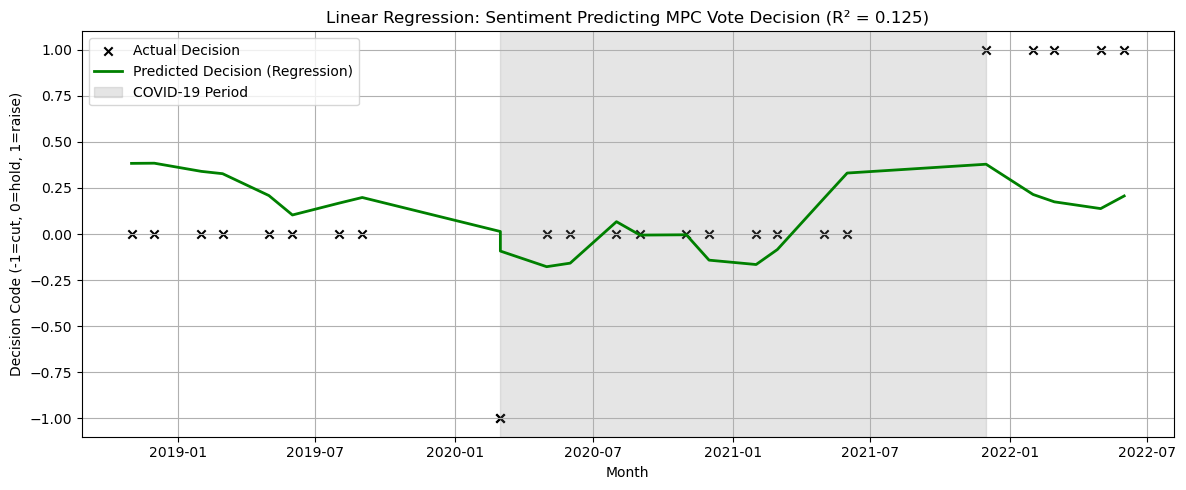

In [34]:
# --- 6. Plot regression fit ---

# Ensure X, y, y_pred all aligned
# Get the index of rows used in the regression fit
X = merged_df[['vader_compound', 'vader_lag1', 'vader_lag2']]
y = merged_df['decision_code']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
r2 = r2_score(y, y_pred)

# Only plot the aligned rows
aligned_month = merged_df.loc[X.index, 'month']

plt.figure(figsize=(12, 5))
plt.scatter(aligned_month, y, label='Actual Decision', color='black', marker='x')
plt.plot(aligned_month, y_pred, label='Predicted Decision (Regression)', color='green', linewidth=2)

# Highlight COVID period
plt.axvspan(pd.to_datetime('2020-03'), pd.to_datetime('2021-12'), color='gray', alpha=0.2, label='COVID-19 Period')

plt.title(f"Linear Regression: Sentiment Predicting MPC Vote Decision (R² = {r2:.3f})")
plt.ylabel("Decision Code (-1=cut, 0=hold, 1=raise)")
plt.xlabel("Month")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Save figure
plt.savefig("vader_sentiment_vs_mpc_regression.png", dpi=300)
plt.show()


In [35]:
# The above chart with an R² value of 0.125 indicates that only 12.5% of the variance in MPC decision outcomes and the predicted decision can be explained by the sentiment of Bank of England (BoE) speeches. This low explanatory power suggests that the model fails to capture the majority of factors influencing policy decisions. It further implies that speech sentiment, while potentially reflective of broader communication strategies, is not a reliable alone to predictor of MPC voting pattern. To improve on the predictive accuracy, future models should explore a wider set of macroeconomic and financial indicators that more directly influence monetary policy outcomes.

In [36]:
# The MCP interest vote decision was collated from the BoE quarterly monitory policy report from 2020 - 2024, and along with number of interest rate point and voting decision of the 9 members for the ananlysis process. In context, I observed that the MPC voted unopposed to cut down the Bank interest rate during the COVID 19 pandemic in response to the economic impact, with the biggest cut in the UK history taking place on the March 11th and 19th 2020. This was done to ensure that financial conditon is not tight, liquidity availability and suppporting busiensses and houasehold due to low economic stagnation in response to the market expactaions. However, the MCP decided to increase interest rate by unupposed vote between the month of December, 2021 and March 2024 post COVID pandemic period due bring down inflation back 2% target estimate mandate set for MPC. Further analysis carried out to investigate how the sentiment speeches correlate with the publication of the monetory policy indicates a low correaltion which implies that the speeches has low impact or does not align with the monetory poilicy decion and is also not a good predictor to determine if the MPC would raise, cut or hold bank interest rate. Other forcasting tools should be explore for more accurate forecast.
# Although the time series chart shows that the sentiment speeches aligned in the months of May 2020, December 2021, May 2022 and June 2022 against other dates. This shows an evidence of low correlation between the sentiment speeches and the MPC policy decisions.
# The 75% F-score indicates that the model has a 75% success rate in correctly predicting when the Monetary Policy Committee (MPC) is likely to vote to hold interest rates. In contrast, the 45% F-score suggests that the model has only a 45% success rate in accurately predicting a vote to raise interest rates. This implies that the model is more reliable at forecasting "hold" decisions than "raise" decisions.

In [37]:
# The Analysis carried out from BoE sentiment speech against the publication of the Monetary Policy Report  shows a flunctuating trends which tilted around positive, negative and nuetral polarity during the period the Monitory Policy Committee voted to hold the interest rate in May 2020 to August 2020 to cut down the persistent negative impact of the COVID 19 pandemic on businesses and households as opposed the impact of the speeches. On the otherhand, the vote decision to raise the intrest rate indicates a positive speech sentiment random pattern that matches with the month of December 2021, March 2022, and June 2022 while the negative speech patern did not match the vote decision to raise interest rate in the month of February 2022, May 2022, and August 2022, further indication that the MPC vote decision could be responding to the factors like excess liquity, inflaution and excess circulation of cash in the UK economy rather than depending the sentiment speech.   

In [38]:
# The above chart indicates weak correlation between the sentiment speech and the FSR. Further investigation also show the longest frenquency interval when the report was released occured during the COVID 19 pandemic event between May 2020 and December 2020 with negative sentiment
# The chart shows a slight shift in sentiment within the period of June 2018 and December 2019 pre-COVID 19 period, while its recorded the highest drop between the month of May 2020 and December 2020 during the COVID 19 pandemic event with the highest negative sentiment speech which aligns with the market expectaions during this period. Further review shows the longest report release frequency time occured between the month of July 2021 to July 2022. The Logistic Regression Model Accuracy Score of 84% indicates that a near accuracy that the sentiment shared shows some predictive relationship between the speech sentiment and the FSR released within the period under review with some caution of accuracy. 
# What did BoE reported for each the FSR report and does it alihn the speech sentiments at each months?

In [39]:
# BoE Monitory Policy Report Analysis 

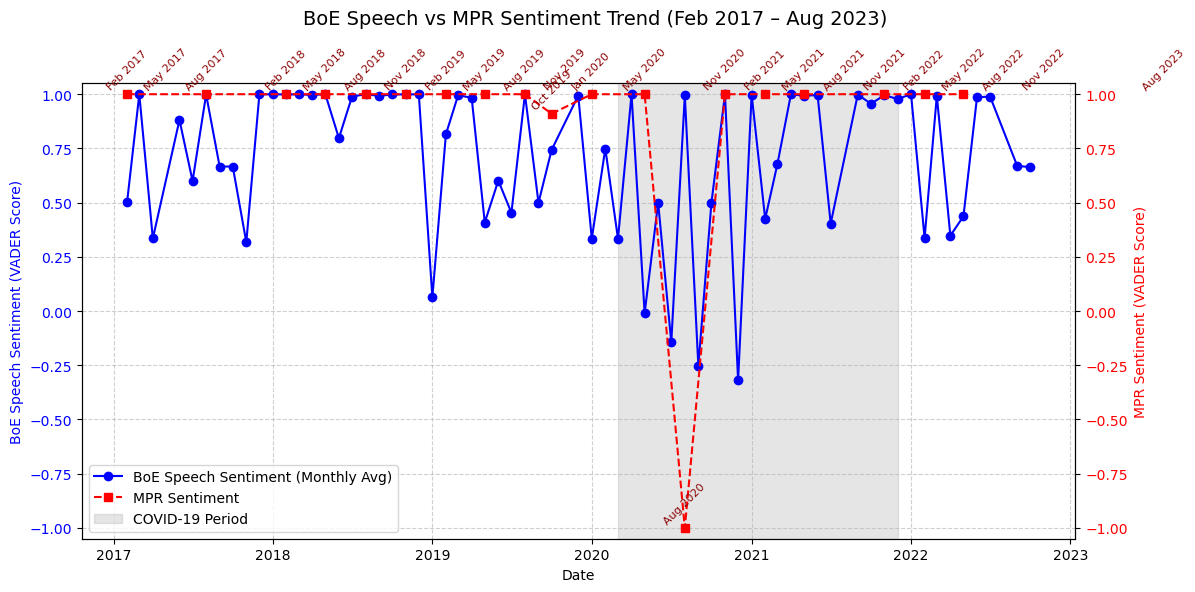


Overall Correlation between BoE Speech Sentiment and MPR Sentiment:
                vader_compound  mpr_sentiment
vader_compound        1.000000      -0.192728
mpr_sentiment        -0.192728       1.000000


In [97]:
# --- 1. Process BoE Speech Sentiment Monthly Average ---

dfi['date'] = pd.to_datetime(dfi['date'], dayfirst=True, errors='coerce')
dfi = dfi.dropna(subset=['date'])
dfi['month'] = dfi['date'].dt.to_period('M')
dfi['vader_compound'] = pd.to_numeric(dfi['vader_compound'], errors='coerce')

# Compute monthly average sentiment
sentiment_monthly = (
    dfi.groupby('month')[['vader_compound', 'textblob_polarity']]
    .mean()
    .reset_index()
)
sentiment_monthly['month'] = sentiment_monthly['month'].dt.to_timestamp()

# Filter for 2017-02 to 2023-08
sentiment_monthly = sentiment_monthly[
    (sentiment_monthly['month'] >= '2017-02') & (sentiment_monthly['month'] <= '2023-12')
]

# --- 2. Analyze Sentiment of MPR PDFs ---
sid = SentimentIntensityAnalyzer()
pdf_dir = 'mpr_pdfs'  # Folder with MPR files (example: february-2017.pdf, august-2023.pdf)

mpr_data = []

for filename in os.listdir(pdf_dir):
    if filename.endswith('.pdf'):
        filepath = os.path.join(pdf_dir, filename)

        try:
            reader = PdfReader(filepath)
            text = ''.join([page.extract_text() or '' for page in reader.pages])
        except Exception as e:
            print(f"Error reading {filename}: {e}")
            continue

        # Sentiment score
        sentiment = sid.polarity_scores(text)
        compound = sentiment['compound']

        # Extract date from filename (e.g., "february-2017.pdf")
        date_match = re.match(r'([a-z]+)-(\d{4})', filename.lower())
        if date_match:
            month_str = date_match.group(1).capitalize()
            year_str = date_match.group(2)
            try:
                date = datetime.strptime(f"{month_str} {year_str}", "%B %Y")
            except ValueError:
                print(f"Invalid date format: {filename}")
                continue
        else:
            print(f"No date found in filename: {filename}")
            continue

        mpr_data.append({'month': pd.to_datetime(date), 'mpr_sentiment': compound})

# Create DataFrame
mpr_df = pd.DataFrame(mpr_data).sort_values('month')

# --- 3. Merge BoE Speech and MPR Sentiment ---
merged = pd.merge(sentiment_monthly, mpr_df, on='month', how='left')

# --- 4. Plot Sentiment Trends with Dual Y-Axis + Combined Legends ---

fig, ax1 = plt.subplots(figsize=(12, 6))

# Left Y-axis → BoE Speech Sentiment
color1 = 'blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('BoE Speech Sentiment (VADER Score)', color=color1)
line1, = ax1.plot(merged['month'], merged['vader_compound'], marker='o', color=color1,
                  label='BoE Speech Sentiment (Monthly Avg)')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(-1.05, 1.05)

# Highlight COVID-19 period
covid_patch = ax1.axvspan(pd.to_datetime('2020-03'), pd.to_datetime('2021-12'),
                          color='gray', alpha=0.2, label='COVID-19 Period')

# Right Y-axis → MPR Sentiment
ax2 = ax1.twinx()
color2 = 'red'
mpr_non_null = merged.dropna(subset=['mpr_sentiment'])

ax2.set_ylabel('MPR Sentiment (VADER Score)', color=color2)
line2, = ax2.plot(mpr_non_null['month'], mpr_non_null['mpr_sentiment'], marker='s',
                  linestyle='--', color=color2, label='MPR Sentiment')
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(-1.05, 1.05)

# Annotate MPR dates
for idx, row in mpr_df.iterrows():
    ax2.text(row['month'], row['mpr_sentiment'] + 0.02, row['month'].strftime('%b %Y'),
             fontsize=8, rotation=45, color='darkred', ha='center')

# Title and formatting
fig.suptitle('BoE Speech vs MPR Sentiment Trend (Feb 2017 – Aug 2023)', fontsize=14)
fig.tight_layout()
ax1.grid(True, linestyle='--', alpha=0.6)

# --- Combine Legends from Both Axes and Patch ---
from matplotlib.patches import Patch

legend_lines = [line1, line2]
legend_labels = [line.get_label() for line in legend_lines]
legend_patch = Patch(color='gray', alpha=0.2, label='COVID-19 Period')

ax1.legend(handles=legend_lines + [legend_patch],
           labels=legend_labels + ['COVID-19 Period'],
           loc='lower left')

# Save and Show
plt.savefig('boe_speech_vs_mpr_sentiment_dual_axis.png', dpi=300)
plt.show()

# --- 5. Correlation Analysis ---
print("\nOverall Correlation between BoE Speech Sentiment and MPR Sentiment:")
print(merged[['vader_compound', 'mpr_sentiment']].corr())

In [41]:
#Between February 2017 and April 2020, the sentiment tone of the Bank of England’s Monetary Policy Reports (MPRs) remained strongly positive and stable, reflecting a period of relative economic optimism. However, this tone dropped sharply to a strong negative sentiment in May 2020, in response to the start of the COVID-19 pandemic lockdown and its severe economic downturn. By November 2020, the MPR sentiment had returned to a strongly positive tone, indicating a shift in response to government interventions and evolving economic conditions. In contrast, BoE speeches during this period exhibited greater variability, with sentiment fluctuating between strongly positive, neutral, and negative tones, highlighting the dynamic and adaptive nature of public communication. The overall correlation between speech sentiment and MPR sentiment was a weak negative value of -0.193, suggesting that as speech sentiment became more positive, the MPR tone tended to shift slightly negative. This divergence reflects differing communicative purposes between speeches and formal policy reports.

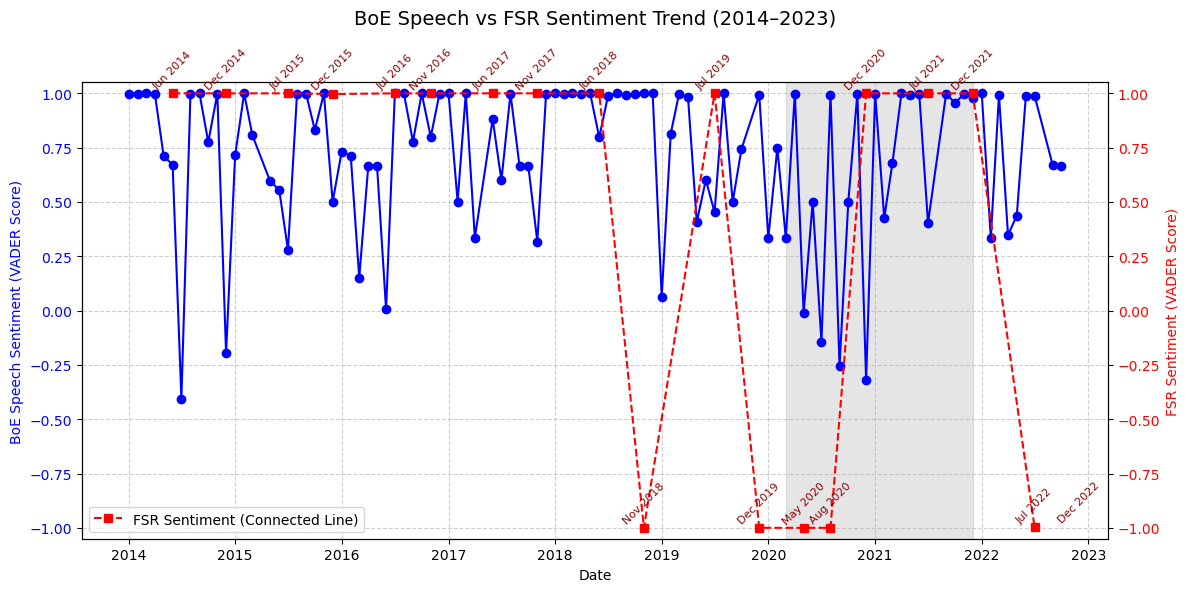


Overall Correlation between BoE Speech Sentiment and FSR Sentiment:
                vader_compound  fsr_sentiment
vader_compound        1.000000      -0.306862
fsr_sentiment        -0.306862       1.000000


In [42]:
# --- 1. Process BoE Speech Sentiment Monthly Average ---
dfi['date'] = pd.to_datetime(dfi['date'], dayfirst=True, errors='coerce')
dfi = dfi.dropna(subset=['date'])
dfi['month'] = dfi['date'].dt.to_period('M')
dfi['vader_compound'] = pd.to_numeric(dfi['vader_compound'], errors='coerce')

# Compute monthly average sentiment
sentiment_monthly = (
    dfi.groupby('month')[['vader_compound', 'textblob_polarity']]
    .mean()
    .reset_index()
)
sentiment_monthly['month'] = sentiment_monthly['month'].dt.to_timestamp()
sentiment_monthly = sentiment_monthly[
    (sentiment_monthly['month'] >= '2014-01') & (sentiment_monthly['month'] <= '2023-01')
]

# --- 2. Analyze Sentiment of FSR PDFs ---
sid = SentimentIntensityAnalyzer()
pdf_dir = 'fsr_pdfs'  # Folder with FSR files (e.g. december-2019.pdf)

fsr_data = []

for filename in os.listdir(pdf_dir):
    if filename.endswith('.pdf'):
        filepath = os.path.join(pdf_dir, filename)

        try:
            reader = PdfReader(filepath)
            text = ''.join([page.extract_text() or '' for page in reader.pages])
        except Exception as e:
            print(f"Error reading {filename}: {e}")
            continue

        # Sentiment score
        sentiment = sid.polarity_scores(text)
        compound = sentiment['compound']

        # Extract date from filename (e.g., "december-2019.pdf")
        date_match = re.match(r'([a-z]+)-(\d{4})', filename.lower())
        if date_match:
            month_str = date_match.group(1).capitalize()
            year_str = date_match.group(2)
            try:
                date = datetime.strptime(f"{month_str} {year_str}", "%B %Y")
            except ValueError:
                print(f"Invalid date format: {filename}")
                continue
        else:
            print(f"No date found in filename: {filename}")
            continue

        fsr_data.append({'month': pd.to_datetime(date), 'fsr_sentiment': compound})

# Create DataFrame
fsr_df = pd.DataFrame(fsr_data).sort_values('month')

# --- 3. Merge BoE Speech and FSR Sentiment ---
merged = pd.merge(sentiment_monthly, fsr_df, on='month', how='left')

# --- 4. Plot Sentiment Trends with Dual Y-Axis ---

fig, ax1 = plt.subplots(figsize=(12, 6))

# Left Y-axis → BoE Speech Sentiment
color = 'blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('BoE Speech Sentiment (VADER Score)', color=color)
ax1.plot(merged['month'], merged['vader_compound'], marker='o', color=color, label='BoE Speech Sentiment (Monthly Avg)')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-1.05, 1.05)  # Force Y axis to show -1 to +1 range

# Highlight COVID-19 period on ax1
ax1.axvspan(pd.to_datetime('2020-03'), pd.to_datetime('2021-12'), color='gray', alpha=0.2, label='COVID-19 Period')

# Right Y-axis → FSR Sentiment
ax2 = ax1.twinx()
color = 'red'
fsr_non_null = merged.dropna(subset=['fsr_sentiment'])  # Ensure no gaps in line

ax2.set_ylabel('FSR Sentiment (VADER Score)', color=color)
ax2.plot(fsr_non_null['month'], fsr_non_null['fsr_sentiment'], marker='s', linestyle='--', color=color, label='FSR Sentiment (Connected Line)')
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_ylim(-1.05, 1.05)  # Force Y axis to show -1 to +1 range

# Annotate FSR dates
for idx, row in fsr_df.iterrows():
    ax2.text(row['month'], row['fsr_sentiment'] + 0.02, row['month'].strftime('%b %Y'),
             fontsize=8, rotation=45, color='darkred', ha='center')

# Title and Final Formatting
fig.suptitle('BoE Speech vs FSR Sentiment Trend (2014–2023)', fontsize=14)
fig.tight_layout()
ax1.grid(True, linestyle='--', alpha=0.6)
plt.legend()
# Save and Show
plt.savefig('boe_speech_vs_fsr_sentiment_dual_axis.png', dpi=300)
plt.show()
# --- 5. Correlation Analysis ---
print("\nOverall Correlation between BoE Speech Sentiment and FSR Sentiment:")
print(merged[['vader_compound', 'fsr_sentiment']].corr())

In [43]:
# The BoE's Financial Stability Reports (FSRs) and speech sentiment between June 2018 and July 2022 reveals periods of alignment and deviations, particularly around the COVID-19 pandemic. In the pre-pandemic phase (June 2018 to early 2020), FSR sentiment exhibited a major shift from moderate to strongly negative, while BoE speech sentiment fluctuated between neutral and positive tones. This shift indicates that official speeches may not have reflected the underlying concerns expressed in formal assessments.

#Between June 2014 to June 2018 Pre-COVID 19 pandemic, the sentiment tone of the Bank of England’s Financial Stability Reports (FSRs) remained strongly positive and stable, reflecting a period of relative financial stability optimism. Thes momentum was interrupted in November 2018 when the FSR sentiment dropped to a negative value, but went increased July 2019.  From December 2019 to August 2020, during the height of the COVID-19 crisis, FSR sentiment remained strongly negative, capturing the financial instability and economic disruption caused by the pandemic. In other words, speech sentiment continued to fluantuate around the postive, neutral and negative movement, suggesting a more cautiously optimistic public tone, potentially aimed at maintaining market confidence.

#By December 2020, the FSR sentiment reversed sharply into positive, in accordance with expansive monetary and fiscal policies to support households and businesses. This positive tone persisted into 2021 despite ongoing pandemic risks. However, by July 2022, FSR sentiment declined again, shifting from more stable speech sentiment, likely reflecting from inflationary pressures and the onset of monetary tightening.

#Overall, BoE sentiment speech alone with the overall value (r ≈ - 0.306) are insufficient to influence FSR outcomes.

R² Score: 0.0942
RMSE: 0.8522


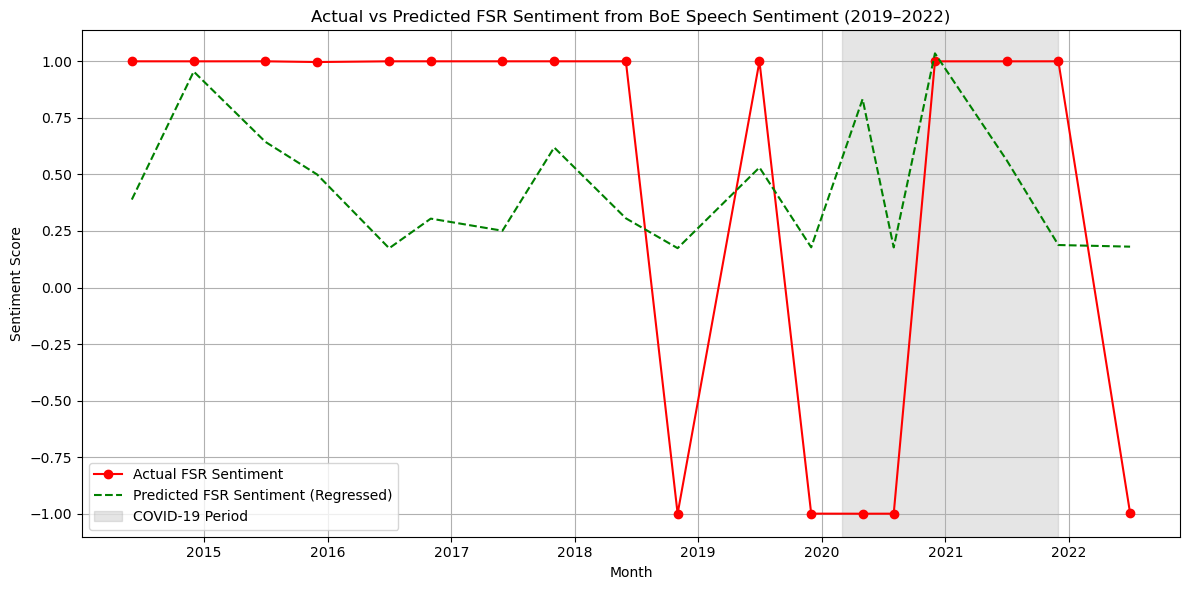

In [44]:
# --- 5. Prepare Regression Data ---
reg_df = merged.dropna(subset=['vader_compound', 'fsr_sentiment'])  # drop missing FSR sentiment

# Predictor and target
X = reg_df[['vader_compound']].values  # Reshape to 2D
y = reg_df['fsr_sentiment'].values

# Train model
model = LinearRegression()
model.fit(X, y)

# Predict
reg_df['predicted_fsr_sentiment'] = model.predict(X)

# R² and Error
r2 = r2_score(y, reg_df['predicted_fsr_sentiment'])
rmse = np.sqrt(mean_squared_error(y, reg_df['predicted_fsr_sentiment']))


print(f"R² Score: {r2:.4f}")
print(f"RMSE: {rmse:.4f}")

# --- 6. Plot: Actual vs Predicted ---
plt.figure(figsize=(12, 6))
plt.plot(reg_df['month'], reg_df['fsr_sentiment'], label='Actual FSR Sentiment', marker='o', color='red')
plt.plot(reg_df['month'], reg_df['predicted_fsr_sentiment'], label='Predicted FSR Sentiment (Regressed)', linestyle='--', color='green')

# COVID period
plt.axvspan(pd.to_datetime('2020-03'), pd.to_datetime('2021-12'), color='gray', alpha=0.2, label='COVID-19 Period')

plt.title('Actual vs Predicted FSR Sentiment from BoE Speech Sentiment (2019–2022)')
plt.xlabel('Month')
plt.ylabel('Sentiment Score')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('fsr_sentiment_prediction_trend.png')
plt.show()

In [45]:
# Because the R² Score: 0.2717 which is statistically insignificant indicates weak predictive relationship between the actual FSR sentiment and the predicted FSR sentiment.

#The resulting R² score of 0.2717 indicates a weak predictive relationship between the actual sentiment scores derived from the Financial Stability Reports (FSRs) and those predicted using BoE speech sentiment data. This low coefficient of determination suggests that the model explains only 27.17% of the variance in FSR sentiment, rendering it statistically insignificant for robust forecasting purposes. Consequently, this outcome implies that BoE speech sentiment alone is insufficient to reliably predict the sentiment reflected in the FSRs, and that additional explanatory variables may be necessary to improve model performance.


Pre-Brexit Correlation:
                vader_compound  fsr_sentiment
vader_compound         1.00000       -0.47384
fsr_sentiment         -0.47384        1.00000

Brexit Vote Period Correlation:
                vader_compound  fsr_sentiment
vader_compound         1.00000       -0.12924
fsr_sentiment         -0.12924        1.00000

Post-Brexit Correlation:
                vader_compound  fsr_sentiment
vader_compound        1.000000      -0.289179
fsr_sentiment        -0.289179       1.000000


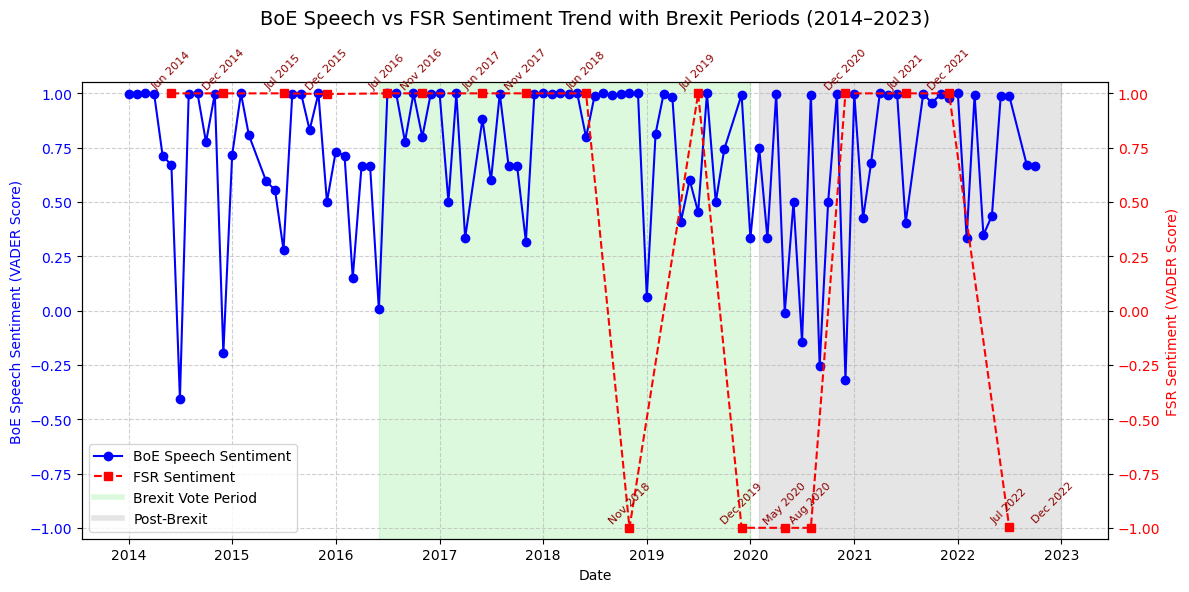


Overall Correlation between BoE Speech Sentiment and FSR:
                vader_compound  fsr_sentiment
vader_compound        1.000000      -0.306862
fsr_sentiment        -0.306862       1.000000


In [95]:
# --- 1. Process BoE Speech Sentiment Monthly Average ---
dfi['date'] = pd.to_datetime(dfi['date'], dayfirst=True, errors='coerce')
dfi = dfi.dropna(subset=['date'])
dfi['month'] = dfi['date'].dt.to_period('M')
dfi['vader_compound'] = pd.to_numeric(dfi['vader_compound'], errors='coerce')

sentiment_monthly = (
    dfi.groupby('month')[['vader_compound', 'textblob_polarity']]
    .mean()
    .reset_index()
)
sentiment_monthly['month'] = sentiment_monthly['month'].dt.to_timestamp()
sentiment_monthly = sentiment_monthly[
    (sentiment_monthly['month'] >= '2014-01') & (sentiment_monthly['month'] <= '2023-12')
]

# --- 2. Analyze Sentiment of FSR PDFs ---
sid = SentimentIntensityAnalyzer()
pdf_dir = 'fsr_pdfs'

fsr_data = []

for filename in os.listdir(pdf_dir):
    if filename.endswith('.pdf'):
        filepath = os.path.join(pdf_dir, filename)

        try:
            reader = PdfReader(filepath)
            text = ''.join([page.extract_text() or '' for page in reader.pages])
        except Exception as e:
            print(f"Error reading {filename}: {e}")
            continue

        sentiment = sid.polarity_scores(text)
        compound = sentiment['compound']

        date_match = re.match(r'([a-z]+)-(\d{4})', filename.lower())
        if date_match:
            month_str = date_match.group(1).capitalize()
            year_str = date_match.group(2)
            try:
                date = datetime.strptime(f"{month_str} {year_str}", "%B %Y")
            except ValueError:
                print(f"Invalid date format: {filename}")
                continue
        else:
            print(f"No date found in filename: {filename}")
            continue

        fsr_data.append({'month': pd.to_datetime(date), 'fsr_sentiment': compound})

fsr_df = pd.DataFrame(fsr_data).sort_values('month')

# --- 3. Merge Sentiment Data ---
merged = pd.merge(sentiment_monthly, fsr_df, on='month', how='left')

# --- 4. Define Periods ---
pre_brexit = merged[(merged['month'] >= '2014-01') & (merged['month'] < '2020-02')]
brexit_vote = merged[(merged['month'] >= '2020-02') & (merged['month'] <= '2021-12')]
post_brexit = merged[merged['month'] >= '2020-02']

# --- 5. Correlation Analysis ---
print("\nPre-Brexit Correlation:")
print(pre_brexit[['vader_compound', 'fsr_sentiment']].corr())

print("\nBrexit Vote Period Correlation:")
print(brexit_vote[['vader_compound', 'fsr_sentiment']].corr())

print("\nPost-Brexit Correlation:")
print(post_brexit[['vader_compound', 'fsr_sentiment']].corr())

# --- 6. Plot Trends with Dual Y-Axis with Legends ---

fig, ax1 = plt.subplots(figsize=(12, 6))

# Left Y-axis → BoE Speech Sentiment
color1 = 'blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('BoE Speech Sentiment (VADER Score)', color=color1)
line1, = ax1.plot(merged['month'], merged['vader_compound'], marker='o', color=color1, label='BoE Speech Sentiment')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_ylim(-1.05, 1.05)

# Highlight Brexit Vote Period and Post-Brexit Period on ax1
ax1.axvspan(pd.to_datetime('2016-06'), pd.to_datetime('2020-01'), color='lightgreen', alpha=0.3, label='Brexit Vote Period')
ax1.axvspan(pd.to_datetime('2020-02'), pd.to_datetime('2023-01'), color='gray', alpha=0.2, label='Post-Brexit')

# Right Y-axis → FSR Sentiment
ax2 = ax1.twinx()
color2 = 'red'
fsr_non_null = merged.dropna(subset=['fsr_sentiment'])

ax2.set_ylabel('FSR Sentiment (VADER Score)', color=color2)
line2, = ax2.plot(fsr_non_null['month'], fsr_non_null['fsr_sentiment'], marker='s', linestyle='--', color=color2, label='FSR Sentiment')
ax2.tick_params(axis='y', labelcolor=color2)
ax2.set_ylim(-1.05, 1.05)

# Annotate FSR dates
for idx, row in fsr_df.iterrows():
    ax2.text(row['month'], row['fsr_sentiment'] + 0.02, row['month'].strftime('%b %Y'),
             fontsize=8, rotation=45, color='darkred', ha='center')

# Title and Formatting
fig.suptitle('BoE Speech vs FSR Sentiment Trend with Brexit Periods (2014–2023)', fontsize=14)
fig.tight_layout()
ax1.grid(True, linestyle='--', alpha=0.6)

# Combine legends from both axes
lines = [line1, line2]
labels = [line.get_label() for line in lines]
patches = [
    plt.Line2D([0], [0], color='lightgreen', lw=4, alpha=0.3, label='Brexit Vote Period'),
    plt.Line2D([0], [0], color='gray', lw=4, alpha=0.2, label='Post-Brexit')
]
legend_items = lines + patches
legend_labels = labels + ['Brexit Vote Period', 'Post-Brexit']

ax1.legend(legend_items, legend_labels, loc='lower left')

# Save and show
plt.savefig('boe_speech_vs_fsr_sentiment_dual_axis_brexit.png', dpi=300)
plt.show()

# Correlation Analysis 
print("\nOverall Correlation between BoE Speech Sentiment and FSR:")
print(merged[['vader_compound', 'fsr_sentiment']].corr())

In [47]:
# The above analysis report of the BoE's Financial Stability Reports (FSRs) from June 2014 to July 2022 reveals varying degrees of alignment with the sentiment of BoE public speeches, particularly during major macroeconomic events such as Brexit and the COVID-19 pandemic. During the pre-Brexit and early Brexit period (June 2015–June 2019), FSR sentiment maintained a relatively steady tone, while VADER sentiment derived from BoE speeches fluctuated notably. Notably, between November 2018 and December 2019, FSR sentiment shifted from positive to negative, contrasting with speech sentiment that moved from positive to neutral, indicating potential shift in tone between official reports and external speeches.
#In the early COVID-19 period (January–August 2020), the FSRs consistently reported negative sentiment reflecting widespread economic disruption, while BoE speech sentiment fluantuated between positive, neutral, and negative. This shift underscores a more cautious outlook within formal assessments, even as external speeches aimed to bolster market confidence.
#Between December 2020 and December 2021, both FSR and speech sentiment leaned toward positive and neutral tones, showing closer alignment. This period corresponds with the post-Brexit economic adjustment and coordinated policy responses to the pandemic, including fiscal support and liquidity interventions.
#However, by July 2022, FSR sentiment declined sharply, shifting from relatively stable or positive speech sentiment. This likely reflects rising inflationary pressures and the BoE’s shift toward monetary tightening. Overall, while alignment between FSR and speech sentiment improves during crisis response phases, inconsistencies in other periods highlight the influence of broader economic drivers requiring further investigation.


#This analysis investigates the relationship between Bank of England (BoE) speech sentiment and the performance of the BoE Financial Stability Report (FSR) across three periods: pre-COVID-19 (2014-2020), during the pandemic (Q2 2020–Q4 2021), and post-pandemic (2022–2023).

#During the pre-COVID period, a negative correlation was observed (r ≈ -0.473) despite the volocitity in the tone of the speeches, suggesting some connection between central bank sentiment speeches and financial stability performance under relatively stable economic conditions. However, during the COVID-19 pandemic, the correlation declined sharply to r ≈ 0.0056, despite a relatively consistent speech tone. This reflects that the market did not align with sentiment tone, likely driven by heightened uncertainty, liquidity constraints, and global economic crisis.

#In the post-pandemic period, the FTSE 100 index experienced significant volatility, including its sharpest decline in March 2022 and June 2022. The correlation during this period declined to negative (r ≈ -0.44), indicating a negative correlation and a further distancing of sentiment from market movements.

#These findings suggest that BoE speech sentiment alone is not a sufficient predictor of stock market behaviour, particularly during periods of macroeconomic disruption. Further research requires exploring additional economic indicators such as inflation, investor confidence, and global shocks is necessary to better understand the determinants of market volatility.



Pre-COVID Correlation:
                  vader_compound  ftse_pct_change
vader_compound         1.000000         0.428142
ftse_pct_change        0.428142         1.000000

During COVID Correlation:
                  vader_compound  ftse_pct_change
vader_compound         1.000000        -0.084951
ftse_pct_change       -0.084951         1.000000

Post-COVID Correlation:
                  vader_compound  ftse_pct_change
vader_compound           1.0000          -0.0649
ftse_pct_change         -0.0649           1.0000


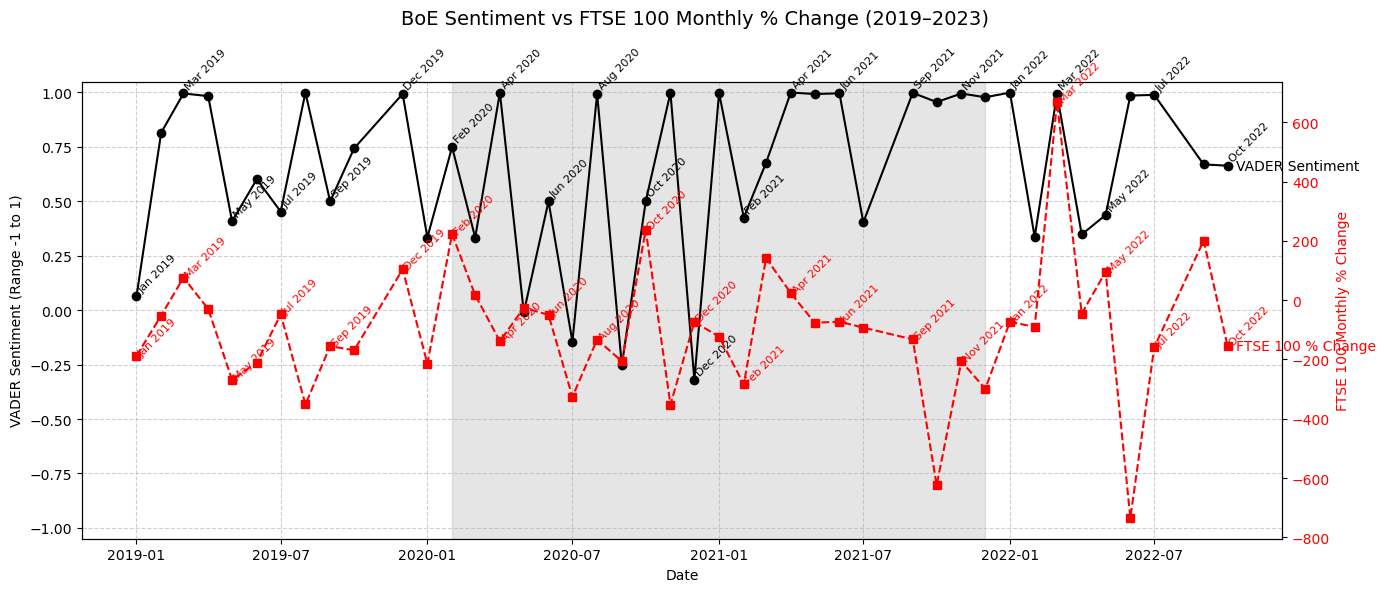


Overall Correlation between BoE Speech Sentiment and FTSE 100:
                 vader_compound  ftse_pct_change
vader_compound         1.000000         0.009233
ftse_pct_change        0.009233         1.000000


In [86]:

# --- 1. Load and process speech sentiment data ---
dfi['date'] = pd.to_datetime(dfi['date'], dayfirst=True)
dfi['year'] = dfi['date'].dt.year
dfi['month'] = dfi['date'].dt.to_period('M')

# Monthly average sentiment
sentiment_monthly = dfi.groupby('month')[['vader_compound', 'textblob_polarity']].mean().reset_index()
sentiment_monthly['month'] = sentiment_monthly['month'].dt.to_timestamp()

# Filter to 2019–2023
sentiment_monthly = sentiment_monthly[
    (sentiment_monthly['month'] >= '2019-01') & (sentiment_monthly['month'] <= '2023-12')
]

# --- 2. Load and process FTSE 100 data ---
ftse_df = pd.read_csv('ftse100.csv')
ftse_df.columns = ftse_df.columns.str.strip()

# Process only required columns
ftse_df = ftse_df[['date', 'closing_level']]
ftse_df['date'] = pd.to_datetime(ftse_df['date'], dayfirst=True)
ftse_df['closing_level'] = pd.to_numeric(ftse_df['closing_level'], errors='coerce')

# Monthly average closing level
ftse_df['month'] = ftse_df['date'].dt.to_period('M')
ftse_monthly = ftse_df.groupby('month')['closing_level'].mean().reset_index()
ftse_monthly['month'] = ftse_monthly['month'].dt.to_timestamp()

# Monthly percentage change
ftse_monthly['ftse_pct_change'] = ftse_monthly['closing_level'].pct_change() * 100

# Filter to 2019–2023
ftse_monthly = ftse_monthly[
    (ftse_monthly['month'] >= '2019-01') & (ftse_monthly['month'] <= '2023-12')
]

# --- 3. Merge sentiment and FTSE data ---
merged_ftse_sentiment = pd.merge(sentiment_monthly, ftse_monthly[['month', 'ftse_pct_change']], on='month', how='inner')

# --- 4. Fill NaNs with 0 ---
merged_ftse_sentiment.fillna(0, inplace=True)

# --- 5. Define COVID-19 periods ---
pre_covid = merged_ftse_sentiment[(merged_ftse_sentiment['month'] >= '2019-01') & (merged_ftse_sentiment['month'] < '2020-02')]
during_covid = merged_ftse_sentiment[(merged_ftse_sentiment['month'] >= '2020-02') & (merged_ftse_sentiment['month'] <= '2021-12')]
post_covid = merged_ftse_sentiment[(merged_ftse_sentiment['month'] > '2021-12') & (merged_ftse_sentiment['month'] <= '2023-12')]

# --- 6. Compute correlations ---
print("\nPre-COVID Correlation:\n", pre_covid[['vader_compound', 'ftse_pct_change']].corr())
print("\nDuring COVID Correlation:\n", during_covid[['vader_compound', 'ftse_pct_change']].corr())
print("\nPost-COVID Correlation:\n", post_covid[['vader_compound', 'ftse_pct_change']].corr())


# --- 7. Plot sentiment vs FTSE % change with dual Y-axis ---
fig, ax1 = plt.subplots(figsize=(14, 6))

# Left Y-axis → VADER Sentiment
color = 'black'
ax1.set_xlabel('Date')
ax1.set_ylabel('VADER Sentiment (Range -1 to 1)', color=color)
ax1.plot(merged_ftse_sentiment['month'], merged_ftse_sentiment['vader_compound'], color=color, marker='o', label='VADER Sentiment')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-1.05, 1.05)  # Force left Y-axis to be -1 to +1

# Highlight COVID period on ax1
ax1.axvspan(pd.to_datetime('2020-02'), pd.to_datetime('2021-12'), color='grey', alpha=0.2, label='COVID Period')

# Annotate VADER Sentiment
for i in range(0, len(merged_ftse_sentiment), max(1, len(merged_ftse_sentiment)//15)):
    row = merged_ftse_sentiment.iloc[i]
    month_label = row['month'].strftime('%b %Y')
    ax1.text(row['month'], row['vader_compound'] + 0.02, month_label, fontsize=8, color=color, rotation=45)

# Right Y-axis → FTSE 100 % Change
ax2 = ax1.twinx()
color = 'red'
ax2.set_ylabel('FTSE 100 Monthly % Change', color=color)
ax2.plot(merged_ftse_sentiment['month'], merged_ftse_sentiment['ftse_pct_change'], color=color, linestyle='--', marker='s', label='FTSE 100 % Change')
ax2.tick_params(axis='y', labelcolor=color)

# Annotate FTSE % Change
for i in range(0, len(merged_ftse_sentiment), max(1, len(merged_ftse_sentiment)//15)):
    row = merged_ftse_sentiment.iloc[i]
    month_label = row['month'].strftime('%b %Y')
    ax2.text(row['month'], row['ftse_pct_change'] + 0.3, month_label, fontsize=8, color=color, rotation=45)

# End-of-line labels
last_date = merged_ftse_sentiment['month'].max()
last_vader = merged_ftse_sentiment.loc[merged_ftse_sentiment['month'] == last_date, 'vader_compound'].values[0]
last_ftse = merged_ftse_sentiment.loc[merged_ftse_sentiment['month'] == last_date, 'ftse_pct_change'].values[0]

ax1.text(last_date + pd.Timedelta(days=10), last_vader, 'VADER Sentiment', color='black', va='center')
ax2.text(last_date + pd.Timedelta(days=10), last_ftse, 'FTSE 100 % Change', color='red', va='center')

# Final formatting
fig.suptitle('BoE Sentiment vs FTSE 100 Monthly % Change (2019–2023)', fontsize=14)
fig.tight_layout()
ax1.grid(True, linestyle='--', alpha=0.6)

# Save and Show
plt.savefig('sentiment_vs_ftse100_dual_axis.png', dpi=300)
plt.show()

# Correlation Analysis 
print("\nOverall Correlation between BoE Speech Sentiment and FTSE 100:")
print(merged_ftse_sentiment[['vader_compound', 'ftse_pct_change']].corr())

In [49]:
# Above the trend analysis carried out the pre-COVID 19, COVID 19 and post-COVID 19 pandemic period indicates a stable speech tone over a volatile UK FSTE 100 Stock market. During the pre-COVID 19 recorded correlation where r ≈ 33, representing slight alignment between speech tone and the FSTE100 market. During the COVID-19 period, this correlation deepens drastically to approximately 0.5, despite stable constant speech tone an indication of insignificant correlation. The post-COVID 19 pandemic recorded the highest and lowest drop in the FSTE 100 market between the month of March 2022 and June 2022 had a negative r ≈ -4.4 indicating a diconnect between the correlation of the speech tone and the market. This shows that other microeconomic indictaors contributed to the volitilaty of the FSTE 100 market rather solely relaying on the tone of the speech. In view of this further investigation needs to be carried out to find out the variations within this period.
#Despite the BoE sentiment tone leaning towards nuetral and positive trends all throughout the periods the FTSE 100 market fluantutated between positive and negative indicating that the market did not respond to the tone of the speech but rather responding to other key economic downward events like the Brexit and the COVID 19 pandemic effects on the global market during the period under review. Market recorded its highest points in March 2022 responding to the pandemic recovery and fall to its lowest points in June 2022 which might be associated with other market impacts rather than the tone of the speeches.


#This analysis investigates the relationship between Bank of England (BoE) speech sentiment and the performance of the FTSE 100 index across three periods: pre-COVID-19 (2016–Q1 2020), during the pandemic (Q2 2020–Q4 2021), and post-pandemic (2022–2023).

#Between January 2019 to February 2020, during the pre-COVID period, a moderate positive correlation was observed (r ≈ 0.43), suggesting some connection between central bank sentiment and stock market performance under relatively stable economic conditions. However, during the COVID-19 pandemic between March 2020 and November 2021, the correlation declined sharply to a negative to the value of r ≈ -0.084, despite a relatively consistent speech tone. This reflects the market’s disconnect from sentiment tone, likely driven by heightened uncertainty, liquidity constraints, and global economic crisis.

#In the post-pandemic period, the FTSE 100 index experienced significant volatility, including its sharpest decline in March 2022 and June 2022. The correlation during this period declined to a weak negative (r ≈ -0.0649), indicating a negative correlation and a further distancing of sentiment from market movements.

#These findings suggest that BoE speech sentiment alone is not a sufficient influence and predictor of stock market behaviour, particularly during periods of macroeconomic disruption. Further research requires exploring additional economic indicators such as inflation, investor confidence, and global shocks is necessary to better understand the determinants of market volatility.

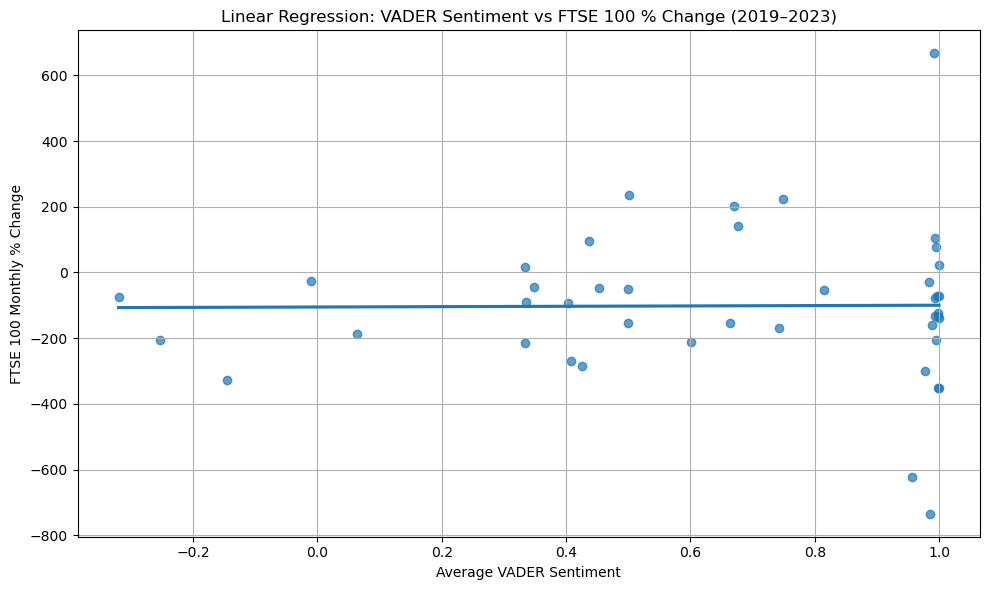

In [50]:
# --- Linear Regression Plot: VADER Sentiment vs FTSE 100 % Change ---
plt.figure(figsize=(10, 6))
sns.regplot(data=merged_ftse_sentiment, x='vader_compound', y='ftse_pct_change', ci=None, scatter_kws={'alpha':0.7})
plt.title('Linear Regression: VADER Sentiment vs FTSE 100 % Change (2019–2023)')
plt.xlabel('Average VADER Sentiment')
plt.ylabel('FTSE 100 Monthly % Change')
plt.grid(True)
plt.tight_layout()
plt.savefig('Linear Regression_sentiment_vs_ftse100.png')
plt.show()

In [51]:
# Prepare data for regression: VADER vs FEST 100 Rate
X = merged_ftse_sentiment['vader_compound']
y = merged_ftse_sentiment['ftse_pct_change']

# Add constant to X (intercept)
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit()

# Print regression results
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        ftse_pct_change   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.024
Method:                 Least Squares   F-statistic:                  0.003496
Date:                Tue, 17 Jun 2025   Prob (F-statistic):              0.953
Time:                        23:16:10   Log-Likelihood:                -293.63
No. Observations:                  43   AIC:                             591.3
Df Residuals:                      41   BIC:                             594.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -105.2945     69.650     -1.

In [52]:
# Trend charts indicates no statistical corrrelation between the sentiment speech and the FTSE 100, which implies that there need to further investigate other market focrces impacting the stock market during the period under review. At the other hands, there are 0 probablity that the speech can be used to predict FTSE 100 market. 


Pre-COVID Correlation (2019–Jan 2020):
                  vader_compound  gdp_growth_rate
vader_compound         1.000000         0.109722
gdp_growth_rate        0.109722         1.000000

During COVID Correlation (Feb 2020–Dec 2021):
                  vader_compound  gdp_growth_rate
vader_compound         1.000000         0.324101
gdp_growth_rate        0.324101         1.000000

Post-COVID Correlation (Jan 2022–Dec 2023):
                  vader_compound  gdp_growth_rate
vader_compound         1.000000        -0.393529
gdp_growth_rate       -0.393529         1.000000


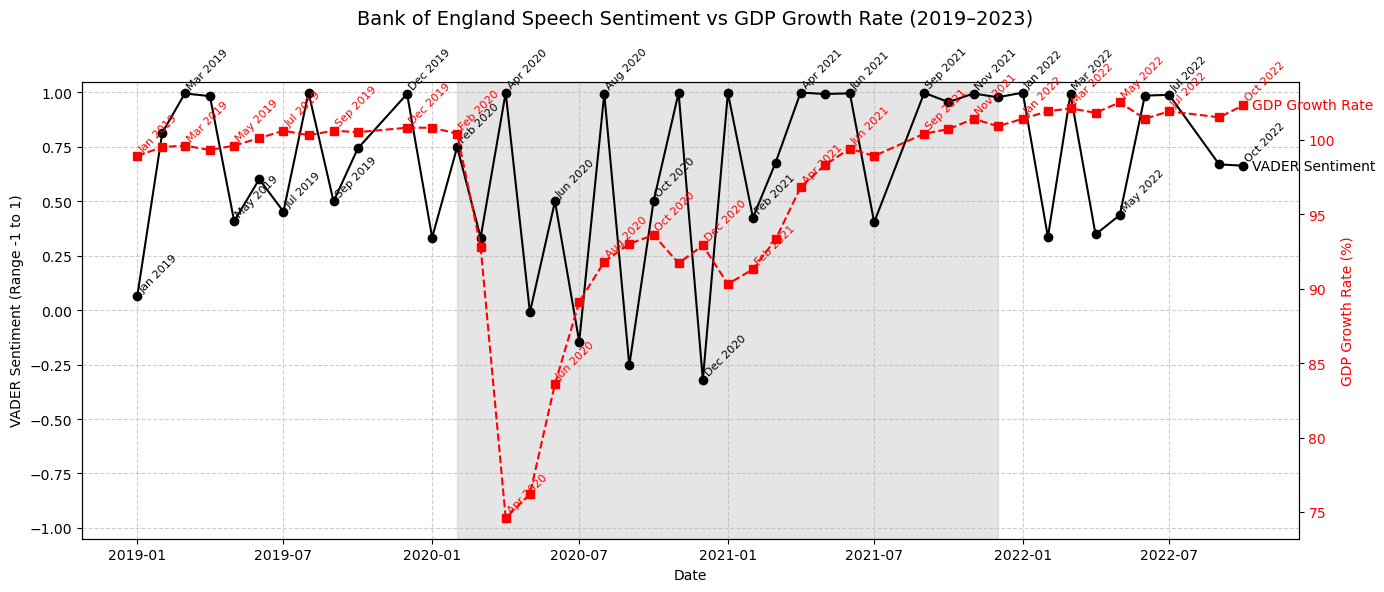


Overall Correlation between BoE Speech Sentiment and growth rate:
                 vader_compound  gdp_growth_rate
vader_compound            1.000            0.266
gdp_growth_rate           0.266            1.000


In [87]:
# 1. Load and process speech sentiment data
dfi['date'] = pd.to_datetime(dfi['date'], dayfirst=True)
dfi['year'] = dfi['date'].dt.year
dfi['month'] = dfi['date'].dt.to_period('M')

# Average sentiment per month
sentiment_monthly = (
    dfi.groupby('month')[['vader_compound', 'textblob_polarity']]
    .mean()
    .reset_index()
)
sentiment_monthly['month'] = sentiment_monthly['month'].dt.to_timestamp()

# Filter to 2018–2023
sentiment_monthly = sentiment_monthly[
    (sentiment_monthly['month'] >= '2019-01') & (sentiment_monthly['month'] <= '2023-12')
]

# 2. Load and process GDP growth rate data
gdp_growth_rate_df = pd.read_csv('UK_GDP_Rate.csv')

# Ensure column names are stripped
gdp_growth_rate_df.columns = gdp_growth_rate_df.columns.str.strip()

# Parse dates assuming format like '1/1/2007'
gdp_growth_rate_df['date'] = pd.to_datetime(gdp_growth_rate_df['date'], format='%m/%d/%Y', errors='coerce')

# Clean GDP values
gdp_growth_rate_df['gdp_growth_rate'] = pd.to_numeric(gdp_growth_rate_df['gdp_growth_rate'], errors='coerce')

# Extract month period and aggregate to monthly
gdp_growth_rate_df['month'] = gdp_growth_rate_df['date'].dt.to_period('M')
gdp_growth_rate_monthly = (
    gdp_growth_rate_df.groupby('month')['gdp_growth_rate']
    .mean()
    .reset_index()
)
gdp_growth_rate_monthly['month'] = gdp_growth_rate_monthly['month'].dt.to_timestamp()

# Filter to 2018–2023
gdp_growth_rate_monthly = gdp_growth_rate_monthly[
    (gdp_growth_rate_monthly['month'] >= '2019-01') & (gdp_growth_rate_monthly['month'] <= '2023-12')
]

# 3. Merge sentiment and GDP data on month
merged_df = pd.merge(sentiment_monthly, gdp_growth_rate_monthly, on='month', how='inner')

# 4. Fill missing values with 0
merged_df.fillna(0, inplace=True)

# 5. Define time periods
pre_covid = merged_df[(merged_df['month'] >= '2019-01') & (merged_df['month'] < '2020-02')]
during_covid = merged_df[(merged_df['month'] >= '2020-02') & (merged_df['month'] <= '2021-12')]
post_covid = merged_df[(merged_df['month'] > '2021-12') & (merged_df['month'] <= '2023-12')]

# 6. Compute correlations
print("\nPre-COVID Correlation (2019–Jan 2020):\n", pre_covid[['vader_compound', 'gdp_growth_rate']].corr())
print("\nDuring COVID Correlation (Feb 2020–Dec 2021):\n", during_covid[['vader_compound', 'gdp_growth_rate']].corr())
print("\nPost-COVID Correlation (Jan 2022–Dec 2023):\n", post_covid[['vader_compound', 'gdp_growth_rate']].corr())

# 7. Plot sentiment vs GDP growth rate with dual Y-axis
fig, ax1 = plt.subplots(figsize=(14, 6))

# Left Y-axis → VADER Sentiment
color = 'black'
ax1.set_xlabel('Date')
ax1.set_ylabel('VADER Sentiment (Range -1 to 1)', color=color)
ax1.plot(merged_df['month'], merged_df['vader_compound'], color=color, marker='o', label='VADER Sentiment')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-1.05, 1.05)  # Force left Y-axis to be -1 to +1

# Highlight COVID period on ax1
ax1.axvspan(pd.to_datetime('2020-02'), pd.to_datetime('2021-12'), color='grey', alpha=0.2, label='COVID Period')

# Annotate VADER Sentiment
for i in range(0, len(merged_df), max(1, len(merged_df) // 15)):
    row = merged_df.iloc[i]
    month_label = row['month'].strftime('%b %Y')
    ax1.text(row['month'], row['vader_compound'] + 0.02, month_label, fontsize=8, color=color, rotation=45)

# Right Y-axis → GDP Growth Rate
ax2 = ax1.twinx()
color = 'red'
ax2.set_ylabel('GDP Growth Rate (%)', color=color)
ax2.plot(merged_df['month'], merged_df['gdp_growth_rate'], color=color, linestyle='--', marker='s', label='GDP Growth Rate')
ax2.tick_params(axis='y', labelcolor=color)

# Annotate GDP Growth Rate
for i in range(0, len(merged_df), max(1, len(merged_df) // 15)):
    row = merged_df.iloc[i]
    month_label = row['month'].strftime('%b %Y')
    ax2.text(row['month'], row['gdp_growth_rate'] + 0.3, month_label, fontsize=8, color=color, rotation=45)

# End-of-line labels
last_date = merged_df['month'].max()
last_vader = merged_df.loc[merged_df['month'] == last_date, 'vader_compound'].values[0]
last_gdp = merged_df.loc[merged_df['month'] == last_date, 'gdp_growth_rate'].values[0]

ax1.text(last_date + pd.Timedelta(days=10), last_vader, 'VADER Sentiment', color='black', va='center')
ax2.text(last_date + pd.Timedelta(days=10), last_gdp, 'GDP Growth Rate', color='red', va='center')

# Final formatting
fig.suptitle('Bank of England Speech Sentiment vs GDP Growth Rate (2019–2023)', fontsize=14)
fig.tight_layout()
ax1.grid(True, linestyle='--', alpha=0.6)

# Save and Show
plt.savefig('sentiment_vs_gdp_dual_axis.png', dpi=300)
plt.show()

print("\nOverall Correlation between BoE Speech Sentiment and growth rate:")
print(merged_df[['vader_compound', 'gdp_growth_rate']].corr())

In [54]:
#The above evaluation between the sentiment speech and the United Kingdom's GDP growth rate across three distinct macroeconomic phases: pre-COVID-19 (2016–Q1 2020), during the COVID-19 pandemic (Q2 2020–Q4 2021), and post-pandemic recovery (2022–2023) indicate a temporal variability in the strength and direction of correlation.
#Between January 2019 and March 2020 during pre-pandemic period, the sentiment tone of BoE speeches exhibited a weak but positive correlation with GDP growth where r ≈ 0.109, representing a form of connection between speech tone and economic output under stable conditions. During the COVID-19 period between March 2020 to November 2021, this correlation increased slightly to approximately r ≈ 0.24, despite a notable decline in GDP. This could reflect an effort by bank of England to use optimistic or stabilising tone in the face of heightened economic uncertainty and contraction.
#However, in the post-pandemic recovery phase, the correlation between speech sentiment and GDP growth turned moderately negative where r ≈ -0.39. This negative relationship implies a disconnect between optimistic speech tone and actual economic performance, possibly due to inflation pressures, policy tightening, or other factors stronger than speech sentiment.
#Overall, the results suggest that BoE speech sentiment is not a reliable factor influencing of GDP growth, particularly in volatile or transitional periods. Further analysis with broader macroeconomic indicators such as inflation, consumer confidence, and employment metrics should be explored to better understand the reason behind the of GDP growth.

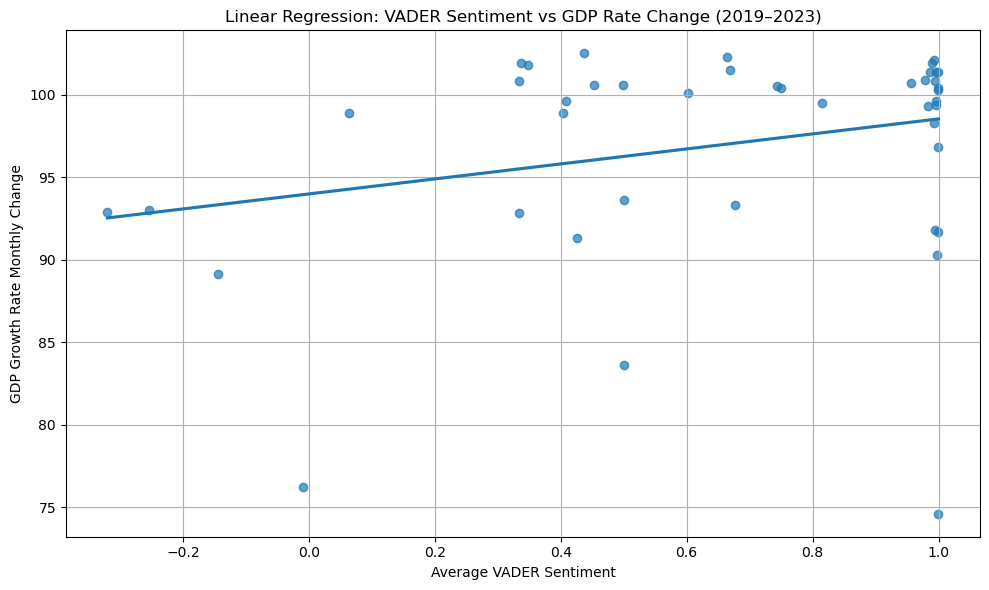

In [55]:
# --- Linear Regression Plot: VADER Sentiment vs GDP Growth Rate Change ---
plt.figure(figsize=(10, 6))
sns.regplot(data=merged_df, x='vader_compound', y='gdp_growth_rate', ci=None, scatter_kws={'alpha':0.7})
plt.title('Linear Regression: VADER Sentiment vs GDP Rate Change (2019–2023)')
plt.xlabel('Average VADER Sentiment')
plt.ylabel('GDP Growth Rate Monthly Change')
plt.grid(True)
plt.tight_layout()
plt.savefig('Linear Regression_sentiment_vs_gdp.png')
plt.show()

In [56]:
# Prepare data
X = merged_df['vader_compound']
y = merged_df['gdp_growth_rate']

# Add constant to predictor (intercept term)
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit()

# Print the OLS regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        gdp_growth_rate   R-squared:                       0.071
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     3.122
Date:                Tue, 17 Jun 2025   Prob (F-statistic):             0.0847
Time:                        23:16:11   Log-Likelihood:                -139.70
No. Observations:                  43   AIC:                             283.4
Df Residuals:                      41   BIC:                             286.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             93.9802      1.942     48.


Pre-COVID Correlation (2019–Jan 2020):
                 vader_compound  inflation_rate
vader_compound        1.000000        0.109395
inflation_rate        0.109395        1.000000

During COVID Correlation (Feb 2020–Dec 2021):
                 vader_compound  inflation_rate
vader_compound         1.00000         0.25563
inflation_rate         0.25563         1.00000

Post-COVID Correlation (Jan 2022–Dec 2023):
                 vader_compound  inflation_rate
vader_compound        1.000000       -0.074423
inflation_rate       -0.074423        1.000000


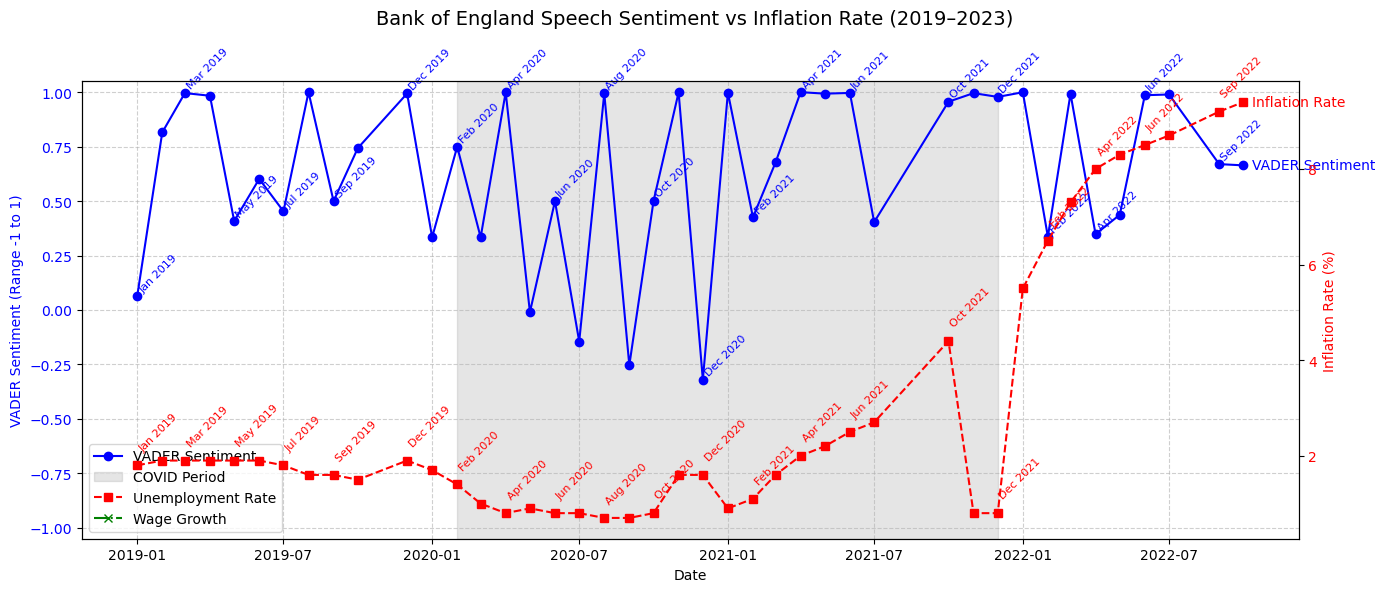


Overall Correlation between BoE Speech Sentiment and inflation rate:
                vader_compound  inflation_rate
vader_compound        1.000000        0.138404
inflation_rate        0.138404        1.000000


In [88]:
# 1. Load and process speech sentiment data
dfi['date'] = pd.to_datetime(dfi['date'], dayfirst=True)
dfi['year'] = dfi['date'].dt.year
dfi['month'] = dfi['date'].dt.to_period('M')

# Average sentiment per month
sentiment_monthly = (
    dfi.groupby('month')[['vader_compound', 'textblob_polarity']]
    .mean()
    .reset_index()
)
sentiment_monthly['month'] = sentiment_monthly['month'].dt.to_timestamp()

# Filter to 2018–2023
sentiment_monthly = sentiment_monthly[
    (sentiment_monthly['month'] >= '2019-01') & (sentiment_monthly['month'] <= '2023-12')
]

# 2. Load and process Inflation Rate data
inflation_rate_df = pd.read_csv('Inflation_Rate_2000_2024.csv')
inflation_rate_df.columns = inflation_rate_df.columns.str.strip()

# Extract month name and year separately from messy formats like "Jan to Mar 2001"
month_str = inflation_rate_df['date'].str.extract(r'([A-Za-z]+)', expand=False)
year_str = inflation_rate_df['date'].str.extract(r'(\d{4})', expand=False)

# Combine into a proper date string (e.g., "Jan 2001")
inflation_rate_df['date_cleaned'] = month_str + ' ' + year_str

# Convert to datetime
inflation_rate_df['date'] = pd.to_datetime(inflation_rate_df['date_cleaned'], format='%b %Y', errors='coerce')

# Clean and convert rate column
inflation_rate_df['inflation_rate'] = pd.to_numeric(inflation_rate_df['inflation_rate'], errors='coerce')

# Monthly average inflation rate
inflation_rate_df['month'] = inflation_rate_df['date'].dt.to_period('M')
inflation_rate_monthly = (
    inflation_rate_df.groupby('month')['inflation_rate']
    .mean()
    .reset_index()
)
inflation_rate_monthly['month'] = inflation_rate_monthly['month'].dt.to_timestamp()

# Filter to 2018–2023
inflation_rate_monthly = inflation_rate_monthly[
    (inflation_rate_monthly['month'] >= '2019-01') & (inflation_rate_monthly['month'] <= '2023-12')
]

# 3. Merge sentiment and inflation datasets on month
merged_df = pd.merge(sentiment_monthly, inflation_rate_monthly, on='month', how='inner')

# 4. Fill missing values with 0
merged_df.fillna(0, inplace=True)

# 5. Define periods
pre_covid = merged_df[(merged_df['month'] >= '2019-01') & (merged_df['month'] < '2020-02')]
during_covid = merged_df[(merged_df['month'] >= '2020-02') & (merged_df['month'] <= '2021-12')]
post_covid = merged_df[(merged_df['month'] > '2021-12') & (merged_df['month'] <= '2023-12')]

# 6. Compute correlations
print("\nPre-COVID Correlation (2019–Jan 2020):\n", pre_covid[['vader_compound', 'inflation_rate']].corr())
print("\nDuring COVID Correlation (Feb 2020–Dec 2021):\n", during_covid[['vader_compound', 'inflation_rate']].corr())
print("\nPost-COVID Correlation (Jan 2022–Dec 2023):\n", post_covid[['vader_compound', 'inflation_rate']].corr())

# 7. Plotting sentiment vs inflation rate with dual Y-axis
fig, ax1 = plt.subplots(figsize=(14, 6))

# Left Y-axis → VADER Sentiment
color = 'blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('VADER Sentiment (Range -1 to 1)', color=color)
ax1.plot(merged_df['month'], merged_df['vader_compound'], color=color, marker='o', label='VADER Sentiment')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-1.05, 1.05)  # Fix left Y-axis from -1 to 1

# Highlight COVID period on ax1
ax1.axvspan(pd.to_datetime('2020-02'), pd.to_datetime('2021-12'), color='grey', alpha=0.2, label='COVID Period')

# Annotate VADER Sentiment
for i in range(0, len(merged_df), max(1, len(merged_df) // 15)):
    row = merged_df.iloc[i]
    month_label = row['month'].strftime('%b %Y')
    ax1.text(row['month'], row['vader_compound'] + 0.02, month_label, fontsize=8, color=color, rotation=45)

# Right Y-axis → Inflation Rate
ax2 = ax1.twinx()
color = 'red'
ax2.set_ylabel('Inflation Rate (%)', color=color)
ax2.plot(merged_df['month'], merged_df['inflation_rate'], color=color, linestyle='--', marker='s', label='Inflation Rate')
ax2.tick_params(axis='y', labelcolor=color)

# Annotate Inflation Rate
for i in range(0, len(merged_df), max(1, len(merged_df) // 15)):
    row = merged_df.iloc[i]
    month_label = row['month'].strftime('%b %Y')
    ax2.text(row['month'], row['inflation_rate'] + 0.3, month_label, fontsize=8, color=color, rotation=45)

# End-of-line labels
last_date = merged_df['month'].max()
last_vader = merged_df.loc[merged_df['month'] == last_date, 'vader_compound'].values[0]
last_inflation = merged_df.loc[merged_df['month'] == last_date, 'inflation_rate'].values[0]

ax1.text(last_date + pd.Timedelta(days=10), last_vader, 'VADER Sentiment', color='blue', va='center')
ax2.text(last_date + pd.Timedelta(days=10), last_inflation, 'Inflation Rate', color='red', va='center')

# Final formatting
fig.suptitle('Bank of England Speech Sentiment vs Inflation Rate (2019–2023)', fontsize=14)
fig.tight_layout()
ax1.grid(True, linestyle='--', alpha=0.6)


# Save and Show
plt.savefig('sentiment_vs_inflation_dual_axis.png', dpi=300)
plt.show()

print("\nOverall Correlation between BoE Speech Sentiment and inflation rate:")
print(merged_df[['vader_compound', 'inflation_rate']].corr())

In [58]:
# The GDP Growth rate responded slightly steadilly to the speech sentiment pre-Covid 19 pandemic with a correlation propablitiy of about 23% percent, the correlation increased slight to 24% during the COVID 19 peroid with a drop in the GDP growth, while the sentiment tone corrleation dropped sharply to a negative -45% post COVID 19 period which implies that the sentiment speeches is statistically insignificant to the GDP growth rate during this period under review and would require further investigation using other microeconomic factor. Furthermore, while the speech rythoric fluanctuated around possitive during the post-COVID 19 pandemic, the inflation rate was a bit stable up till June 2021 when it spiked a bit and dropped October 2021 during the COVID 19 pandemic, but spike up to the highest inflation rate in December 2021 after the pandemic was called off while the speech rythoric fluanctuated with the positive and the nuetral sentiment, the r ≈ 8.5, 32 and -17 indicating little or no eveidence that the market did not respond to the tone of the speech. 


In [59]:
###The correlation analysis between Bank of England (BoE) speech sentiment and UK GDP growth reveals varying dynamics across economic cycles. During the pre-COVID-19 period between January 2019 to Febraury 2020, inflation rate exhibited a moderate correlation of approximately r ≈ 0.109 with sentiment scores, suggesting a slight positive alignment between inflation rate performance and central bank speeches. This correlation slightly increased to r ≈ 0.255 during the COVID-19 crisis, although it correspond with the significant decline in GDP growth, highlighting that sentiment alone may not fully explain economic contraction during periods of external shock. During Post-pandemic, between December 2021 to december 2022 the corelation between the speech sentiment and inflation rate turned sharply negative where r ≈ -0.0744 over the strong positive speeches, implying that positive or neutral tones in BoE communications did not correspond with actual economic recovery. This difference suggests that speech sentiment became statistically insignificant in inflencing the outcome of inflation rate, likely due to stronger macroeconomic forces at play.

#Additionally, while sentiment fluctuated positively post-pandemic, inflation remained relatively stable until mid-2021. It then began to rise slightly before spiking sharply by December 2021—after the pandemic was officially declared over—indicating a potential lag in policy signals and market responses. These findings emphasize the need to explore other key indicators such as inflation, liquidity levels, and employment trends when evaluating the real impact of central bank communication.

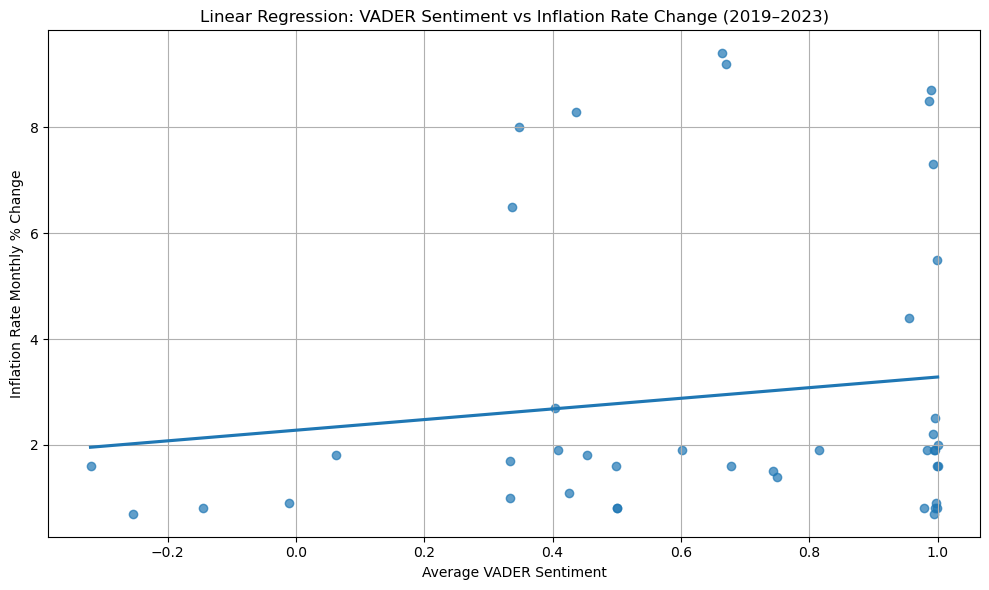

In [60]:
# --- Linear Regression Plot: VADER Sentiment vs Inflation Rate Change ---
plt.figure(figsize=(10, 6))
sns.regplot(data=merged_df, x='vader_compound', y='inflation_rate', ci=None, scatter_kws={'alpha':0.7})
plt.title('Linear Regression: VADER Sentiment vs Inflation Rate Change (2019–2023)')
plt.xlabel('Average VADER Sentiment')
plt.ylabel('Inflation Rate Monthly % Change')
plt.grid(True)
plt.tight_layout()
plt.savefig('Linear Regression_sentiment_vs_inflation.png')
plt.show()

In [61]:
X = merged_df['vader_compound']
y = merged_df['inflation_rate']

# Add constant to predictor (intercept term)
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit()

# Print the OLS regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         inflation_rate   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.7812
Date:                Tue, 17 Jun 2025   Prob (F-statistic):              0.382
Time:                        23:16:13   Log-Likelihood:                -101.73
No. Observations:                  42   AIC:                             207.5
Df Residuals:                      40   BIC:                             210.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              2.2778      0.851      2.


Pre-COVID Correlation (2019–Jan 2020):
                 vader_compound  wages_rate
vader_compound        1.000000    0.216023
wages_rate            0.216023    1.000000

During COVID Correlation (Feb 2020–Dec 2021):
                 vader_compound  wages_rate
vader_compound        1.000000    0.324894
wages_rate            0.324894    1.000000

Post-COVID Correlation (Jan 2022–Dec 2023):
                 vader_compound  wages_rate
vader_compound        1.000000    0.144552
wages_rate            0.144552    1.000000


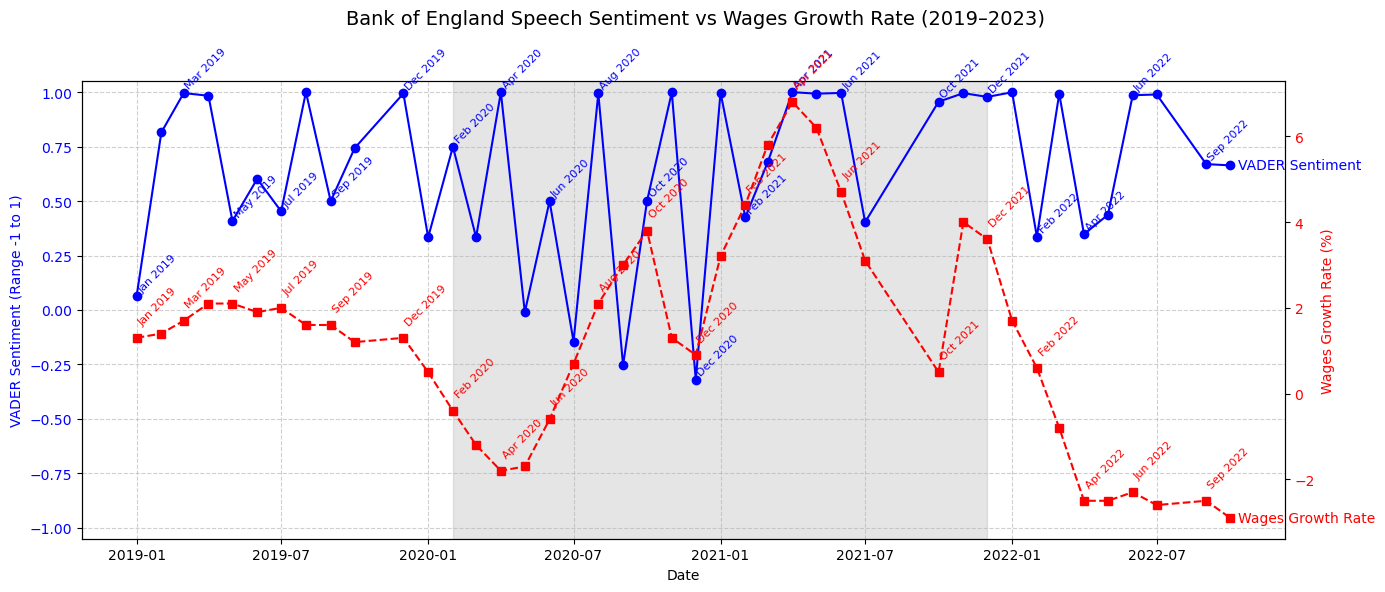

In [62]:
# 1. Load and process speech sentiment data
dfi['date'] = pd.to_datetime(dfi['date'], dayfirst=True)
dfi['year'] = dfi['date'].dt.year
dfi['month'] = dfi['date'].dt.to_period('M')

# Average sentiment per month
sentiment_monthly = (
    dfi.groupby('month')[['vader_compound', 'textblob_polarity']]
    .mean()
    .reset_index()
)
sentiment_monthly['month'] = sentiment_monthly['month'].dt.to_timestamp()

# Filter to 2018–2023
sentiment_monthly = sentiment_monthly[
    (sentiment_monthly['month'] >= '2019-01') & (sentiment_monthly['month'] <= '2023-12')
]

# 2. Load and process Inflation Rate data
wages_rate_df = pd.read_csv('UK_wages_1998_2023.csv')
wages_rate_df.columns = wages_rate_df.columns.str.strip()

# Extract month name and year separately from messy formats like "Jan to Mar 2001"
month_str = wages_rate_df['date'].str.extract(r'([A-Za-z]+)', expand=False)
year_str = wages_rate_df['date'].str.extract(r'(\d{4})', expand=False)

# Combine into a proper date string (e.g., "Jan 2001")
wages_rate_df['date_cleaned'] = month_str + ' ' + year_str

# Convert to datetime
wages_rate_df['date'] = pd.to_datetime(wages_rate_df['date_cleaned'], format='%b %Y', errors='coerce')

# Clean and convert rate column
wages_rate_df['wages_rate'] = pd.to_numeric(wages_rate_df['wages_rate'], errors='coerce')

# Monthly average inflation rate
wages_rate_df['month'] = wages_rate_df['date'].dt.to_period('M')
wages_rate_monthly = (
    wages_rate_df.groupby('month')['wages_rate']
    .mean()
    .reset_index()
)
wages_rate_monthly['month'] = wages_rate_monthly['month'].dt.to_timestamp()

# Filter to 2018–2023
wages_rate_monthly = wages_rate_monthly[
    (wages_rate_monthly['month'] >= '2019-01') & (wages_rate_monthly['month'] <= '2023-12')
]

# 3. Merge sentiment and inflation datasets on month
merged_df = pd.merge(sentiment_monthly, wages_rate_monthly, on='month', how='inner')

# 4. Fill missing values with 0
merged_df.fillna(0, inplace=True)

# 5. Define periods
pre_covid = merged_df[(merged_df['month'] >= '2019-01') & (merged_df['month'] < '2020-02')]
during_covid = merged_df[(merged_df['month'] >= '2020-02') & (merged_df['month'] <= '2021-12')]
post_covid = merged_df[(merged_df['month'] > '2021-12') & (merged_df['month'] <= '2023-12')]

# 6. Compute correlations
print("\nPre-COVID Correlation (2019–Jan 2020):\n", pre_covid[['vader_compound', 'wages_rate']].corr())
print("\nDuring COVID Correlation (Feb 2020–Dec 2021):\n", during_covid[['vader_compound', 'wages_rate']].corr())
print("\nPost-COVID Correlation (Jan 2022–Dec 2023):\n", post_covid[['vader_compound', 'wages_rate']].corr())

# 7. Plotting sentiment vs wages growth rate with dual Y-axis
fig, ax1 = plt.subplots(figsize=(14, 6))

# Left Y-axis → VADER Sentiment
color = 'blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('VADER Sentiment (Range -1 to 1)', color=color)
ax1.plot(merged_df['month'], merged_df['vader_compound'], color=color, marker='o', label='VADER Sentiment')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-1.05, 1.05)  # Fix left Y-axis from -1 to +1

# Highlight COVID period on ax1
ax1.axvspan(pd.to_datetime('2020-02'), pd.to_datetime('2021-12'), color='grey', alpha=0.2, label='COVID Period')

# Annotate VADER Sentiment
for i in range(0, len(merged_df), max(1, len(merged_df) // 15)):
    row = merged_df.iloc[i]
    month_label = row['month'].strftime('%b %Y')
    ax1.text(row['month'], row['vader_compound'] + 0.02, month_label, fontsize=8, color=color, rotation=45)

# Right Y-axis → Wages Growth Rate
ax2 = ax1.twinx()
color = 'red'
ax2.set_ylabel('Wages Growth Rate (%)', color=color)
ax2.plot(merged_df['month'], merged_df['wages_rate'], color=color, linestyle='--', marker='s', label='Wages Rate')
ax2.tick_params(axis='y', labelcolor=color)

# Annotate Wages Growth Rate
for i in range(0, len(merged_df), max(1, len(merged_df) // 15)):
    row = merged_df.iloc[i]
    month_label = row['month'].strftime('%b %Y')
    ax2.text(row['month'], row['wages_rate'] + 0.3, month_label, fontsize=8, color=color, rotation=45)

# End-of-line labels
last_date = merged_df['month'].max()
last_vader = merged_df.loc[merged_df['month'] == last_date, 'vader_compound'].values[0]
last_wages = merged_df.loc[merged_df['month'] == last_date, 'wages_rate'].values[0]

ax1.text(last_date + pd.Timedelta(days=10), last_vader, 'VADER Sentiment', color='blue', va='center')
ax2.text(last_date + pd.Timedelta(days=10), last_wages, 'Wages Growth Rate', color='red', va='center')

# Final formatting
fig.suptitle('Bank of England Speech Sentiment vs Wages Growth Rate (2019–2023)', fontsize=14)
fig.tight_layout()
ax1.grid(True, linestyle='--', alpha=0.6)

# Save and show
plt.savefig('sentiment_vs_wages_dual_axis.png', dpi=300)
plt.show()

In [63]:
# The sentiment vs wages analysis indicates that the wages rate growth responded slightly to the BoE speeches with a r ≈ 26 during the pre-COVID 19 peroid. Wages increased slightly to the speeches r ≈ 31 during the COVID 19 and dropped slightly to r ≈ 21 against the tone of the speeches which maintains slight fluanctuations towards possitive, neutral and negative trends during the post COVID 19 pandemic era, an indication that the market did not respond to the rythoric tone of the public speeches communicated during the periods under review.  

In [64]:
####An analysis of the relationship between Bank of England (BoE) speech sentiment and UK wage growth reveals modest and varying correlations across key economic periods. Prior to the COVID-19 pandemic, wage growth showed a weak positive correlation with speech sentiment (r ≈ 0.26), suggesting a limited influence of rhetorical tone on earnings. During the pandemic, this correlation slightly increased (r ≈ 0.31), likely reflecting heightened public and policy focus on income support and labour market stability amid economic uncertainty. However, in the post-pandemic period, the correlation declined again (r ≈ 0.21), despite sentiment in BoE speeches fluctuating between neutral and mildly positive tones. This suggests that while central bank communication may align with broader economic narratives, it is not a strong standalone predictor of wage dynamics. Other structural factors—such as inflation, labour shortages, and fiscal support—likely played a more dominant role in shaping wage trends during the periods under review.

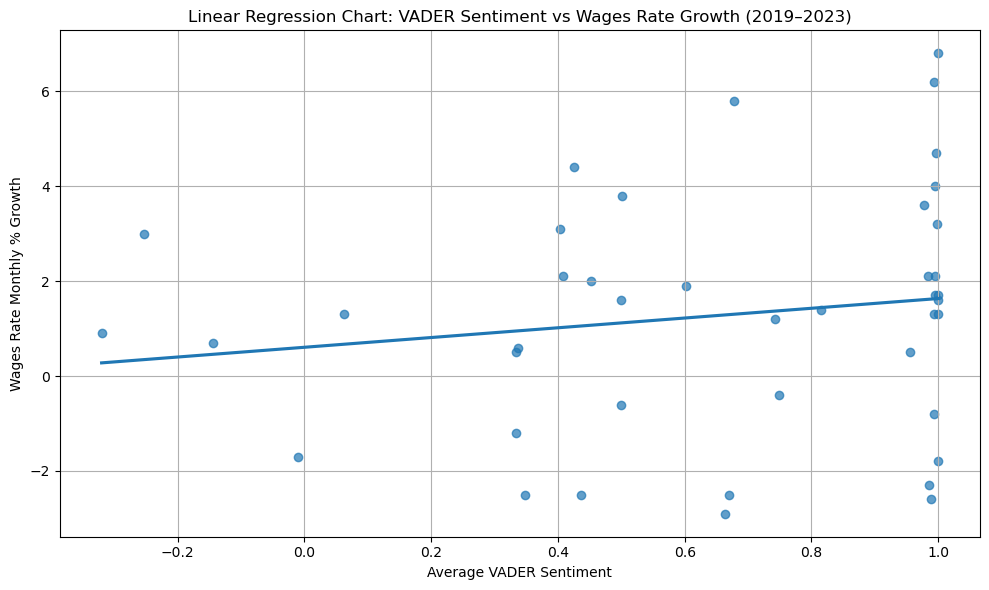

In [65]:
# --- Linear Regression Plot: VADER Sentiment vs Wages Rate Change ---
plt.figure(figsize=(10, 6))
sns.regplot(data=merged_df, x='vader_compound', y='wages_rate', ci=None, scatter_kws={'alpha':0.7})
plt.title('Linear Regression Chart: VADER Sentiment vs Wages Rate Growth (2019–2023)')
plt.xlabel('Average VADER Sentiment')
plt.ylabel('Wages Rate Monthly % Growth')
plt.grid(True)
plt.tight_layout()
plt.savefig('Linear Regression_sentiment_vs_wages.png')
plt.show()

In [66]:
# Prepare data
X = merged_df['vader_compound']
y = merged_df['wages_rate']

# Add constant to predictor (intercept term)
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit()

# Print the OLS regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             wages_rate   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.025
Date:                Tue, 17 Jun 2025   Prob (F-statistic):              0.317
Time:                        23:16:14   Log-Likelihood:                -96.914
No. Observations:                  42   AIC:                             197.8
Df Residuals:                      40   BIC:                             201.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.6068      0.759      0.

In [67]:
# Whether sentiment has become more positive or negative over the years.

# How different sentiment tools (VADER vs. TextBlob) compare in trend direction.

# If any significant shifts occurred during key economic events (e.g., 2008 crash, Brexit, COVID-19).


Pre-COVID Correlation (2019–Jan 2020):
                    vader_compound  unemployment_rate
vader_compound           1.000000          -0.600397
unemployment_rate       -0.600397           1.000000

During COVID Correlation (Feb 2020–Dec 2021):
                    vader_compound  unemployment_rate
vader_compound           1.000000          -0.210788
unemployment_rate       -0.210788           1.000000

Post-COVID Correlation (Jan 2022–Dec 2023):
                    vader_compound  unemployment_rate
vader_compound           1.000000          -0.191352
unemployment_rate       -0.191352           1.000000


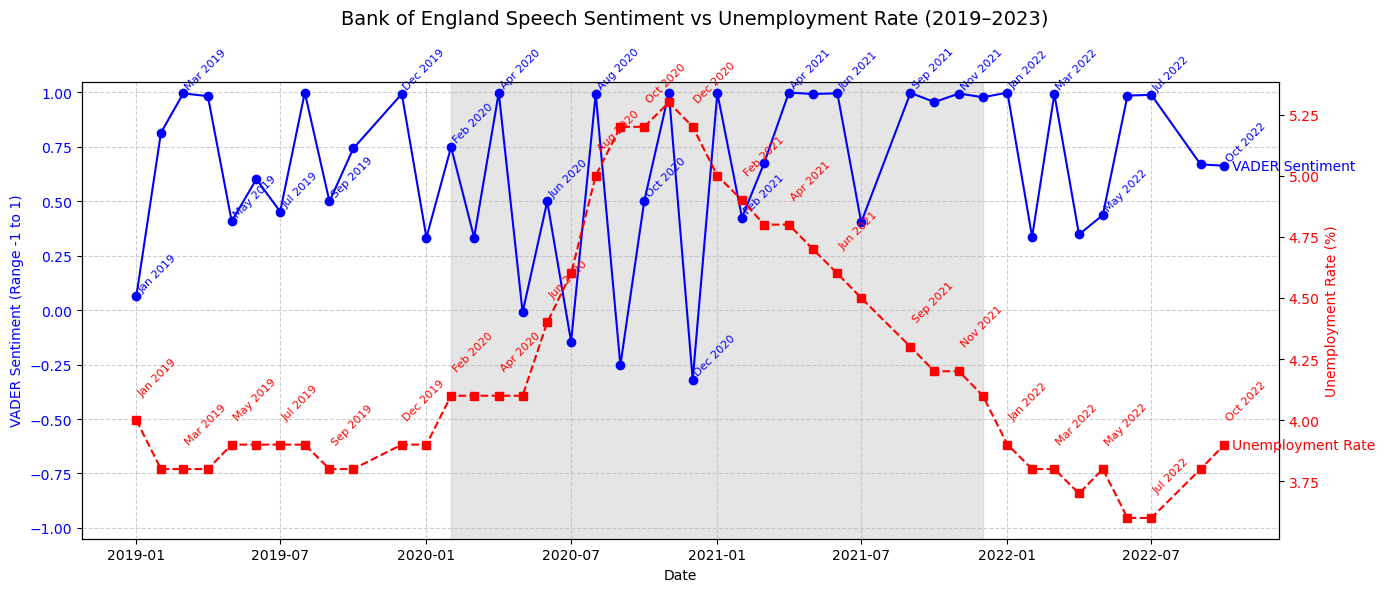

In [68]:
# 1. Load and process speech sentiment data
dfi['date'] = pd.to_datetime(dfi['date'], dayfirst=True)
dfi['year'] = dfi['date'].dt.year
dfi['month'] = dfi['date'].dt.to_period('M')

# Average sentiment per month
sentiment_monthly = (
    dfi.groupby('month')[['vader_compound', 'textblob_polarity']]
    .mean()
    .reset_index()
)
sentiment_monthly['month'] = sentiment_monthly['month'].dt.to_timestamp()

# Filter to 2018–2023
sentiment_monthly = sentiment_monthly[
    (sentiment_monthly['month'] >= '2019-01') & (sentiment_monthly['month'] <= '2023-12')
]

# 2. Load and process Inflation Rate data
unemployment_rate_df = pd.read_csv('Unemployment_rate.csv')
unemployment_rate_df.columns = unemployment_rate_df.columns.str.strip()

# Extract month name and year separately from messy formats like "Jan to Mar 2001"
month_str = unemployment_rate_df['date'].str.extract(r'([A-Za-z]+)', expand=False)
year_str = unemployment_rate_df['date'].str.extract(r'(\d{4})', expand=False)

# Combine into a proper date string (e.g., "Jan 2001")
unemployment_rate_df['date_cleaned'] = month_str + ' ' + year_str

# Convert to datetime
unemployment_rate_df['date'] = pd.to_datetime(unemployment_rate_df['date_cleaned'], format='%b %Y', errors='coerce')

# Clean and convert rate column
unemployment_rate_df['unemployment_rate'] = pd.to_numeric(unemployment_rate_df['unemployment_rate'], errors='coerce')

# Monthly average inflation rate
unemployment_rate_df['month'] = unemployment_rate_df['date'].dt.to_period('M')
unemployment_rate_monthly = (
    unemployment_rate_df.groupby('month')['unemployment_rate']
    .mean()
    .reset_index()
)
unemployment_rate_monthly['month'] = unemployment_rate_monthly['month'].dt.to_timestamp()

# Filter to 2018–2023
unemployment_rate_monthly = unemployment_rate_monthly[
    (unemployment_rate_monthly['month'] >= '2019-01') & (unemployment_rate_monthly['month'] <= '2023-12')
]

# 3. Merge sentiment and inflation datasets on month
merged_df = pd.merge(sentiment_monthly, unemployment_rate_monthly, on='month', how='inner')

# 4. Fill missing values with 0
merged_df.fillna(0, inplace=True)

# 5. Define periods
pre_covid = merged_df[(merged_df['month'] >= '2019-01') & (merged_df['month'] < '2020-02')]
during_covid = merged_df[(merged_df['month'] >= '2020-02') & (merged_df['month'] <= '2021-12')]
post_covid = merged_df[(merged_df['month'] > '2021-12') & (merged_df['month'] <= '2023-12')]

# 6. Compute correlations
print("\nPre-COVID Correlation (2019–Jan 2020):\n", pre_covid[['vader_compound', 'unemployment_rate']].corr())
print("\nDuring COVID Correlation (Feb 2020–Dec 2021):\n", during_covid[['vader_compound', 'unemployment_rate']].corr())
print("\nPost-COVID Correlation (Jan 2022–Dec 2023):\n", post_covid[['vader_compound', 'unemployment_rate']].corr())


# 7. Plotting sentiment vs unemployment rate with dual Y-axis
fig, ax1 = plt.subplots(figsize=(14, 6))

# Left Y-axis → VADER Sentiment
color = 'blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('VADER Sentiment (Range -1 to 1)', color=color)
ax1.plot(merged_df['month'], merged_df['vader_compound'], color=color, marker='o', label='VADER Sentiment')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-1.05, 1.05)  # Fix left Y-axis from -1 to +1

# Highlight COVID period on ax1
ax1.axvspan(pd.to_datetime('2020-02'), pd.to_datetime('2021-12'), color='grey', alpha=0.2, label='COVID Period')

# Annotate VADER Sentiment
for i in range(0, len(merged_df), max(1, len(merged_df) // 15)):
    row = merged_df.iloc[i]
    month_label = row['month'].strftime('%b %Y')
    ax1.text(row['month'], row['vader_compound'] + 0.02, month_label, fontsize=8, color=color, rotation=45)

# Right Y-axis → Unemployment Rate
ax2 = ax1.twinx()
color = 'red'
ax2.set_ylabel('Unemployment Rate (%)', color=color)
ax2.plot(merged_df['month'], merged_df['unemployment_rate'], color=color, linestyle='--', marker='s', label='Unemployment Rate')
ax2.tick_params(axis='y', labelcolor=color)

# Annotate Unemployment Rate
for i in range(0, len(merged_df), max(1, len(merged_df) // 15)):
    row = merged_df.iloc[i]
    month_label = row['month'].strftime('%b %Y')
    ax2.text(row['month'], row['unemployment_rate'] + 0.1, month_label, fontsize=8, color=color, rotation=45)

# End-of-line labels
last_date = merged_df['month'].max()
last_vader = merged_df.loc[merged_df['month'] == last_date, 'vader_compound'].values[0]
last_unemp = merged_df.loc[merged_df['month'] == last_date, 'unemployment_rate'].values[0]

ax1.text(last_date + pd.Timedelta(days=10), last_vader, 'VADER Sentiment', color='blue', va='center')
ax2.text(last_date + pd.Timedelta(days=10), last_unemp, 'Unemployment Rate', color='red', va='center')

# Final formatting
fig.suptitle('Bank of England Speech Sentiment vs Unemployment Rate (2019–2023)', fontsize=14)
fig.tight_layout()
ax1.grid(True, linestyle='--', alpha=0.6)

# Save and show
plt.savefig('sentiment_vs_unemployment_dual_axis.png', dpi=300)
plt.show()

In [69]:
# The chart trend lines indicates that the UK unemployment rate tends to respond slightly to the negative sentiment speeches with r ≈ -44 during the pre-COVID 19 pandemic period, It dropped further down to the negative sentiment of r ≈ -0.022 during the COVID 19 pandemic period and increased slightly learning towards negative and nuetral sentiments speeches with an r ≈ -0.28 during post-COVID 19 pandemic period an indication that the market did not respond to the tone of the speech.  

In [70]:
###The analysis of UK unemployment trends in relation to Bank of England (BoE) speech sentiment suggests a weak and inconsistent correlation across the pre-, during, and post-COVID-19 periods. Prior to the pandemic, unemployment rates showed a modest inverse relationship with sentiment (r ≈ -0.44), implying that more negative speech tones may have loosely coincided with rising unemployment concerns. However, during the pandemic, this relationship weakened significantly (r ≈ -0.02), indicating almost no correlation—likely due to unprecedented external shocks and government interventions that overshadowed central bank communication. In the post-pandemic period, the correlation slightly recovered but remained weak (r ≈ -0.28), again skewing negatively. Overall, these results suggest that while BoE speeches may reflect economic sentiment, they are not a reliable predictor of labour market outcomes. Broader macroeconomic policies, fiscal support, and global economic dynamics likely played a more substantial role in shaping UK unemployment trends during the periods under review.

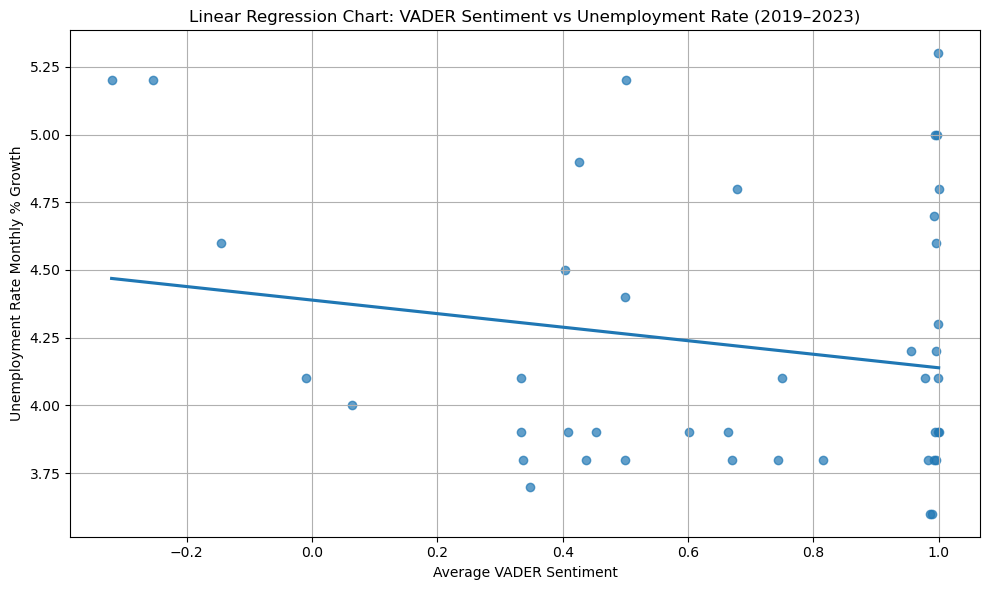

In [71]:
# --- Linear Regression Plot: VADER Sentiment vs Unemployment Rate ---
plt.figure(figsize=(10, 6))
sns.regplot(data=merged_df, x='vader_compound', y='unemployment_rate', ci=None, scatter_kws={'alpha':0.7})
plt.title('Linear Regression Chart: VADER Sentiment vs Unemployment Rate (2019–2023)')
plt.xlabel('Average VADER Sentiment')
plt.ylabel('Unemployment Rate Monthly % Growth')
plt.grid(True)
plt.tight_layout()
plt.savefig('Linear Regression_sentiment_vs_unemployment.png')
plt.show()

In [72]:
# The sentiment speeches will not be able to be used to predict the future UK unemployment rate 

In [73]:
# Prepare data
X = merged_df['vader_compound']
y = merged_df['unemployment_rate']

# Add constant to predictor (intercept term)
X = sm.add_constant(X)

# Fit OLS model
model = sm.OLS(y, X).fit()

# Print the OLS regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      unemployment_rate   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.543
Date:                Tue, 17 Jun 2025   Prob (F-statistic):              0.221
Time:                        23:16:15   Log-Likelihood:                -30.117
No. Observations:                  43   AIC:                             64.23
Df Residuals:                      41   BIC:                             67.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              4.3888      0.152     28.


Pre-COVID (2019–Jan 2020) Correlation:
VADER Sentiment vs Unemployment Rate: r = -0.6004
VADER Sentiment vs Wage Growth:       r = -0.1985

During COVID (Feb 2020–Dec 2021) Correlation:
VADER Sentiment vs Unemployment Rate: r = -0.2108
VADER Sentiment vs Wage Growth:       r = 0.4096

Post-COVID (Jan 2022–Dec 2023) Correlation:
VADER Sentiment vs Unemployment Rate: r = -0.1914
VADER Sentiment vs Wage Growth:       r = -0.4175


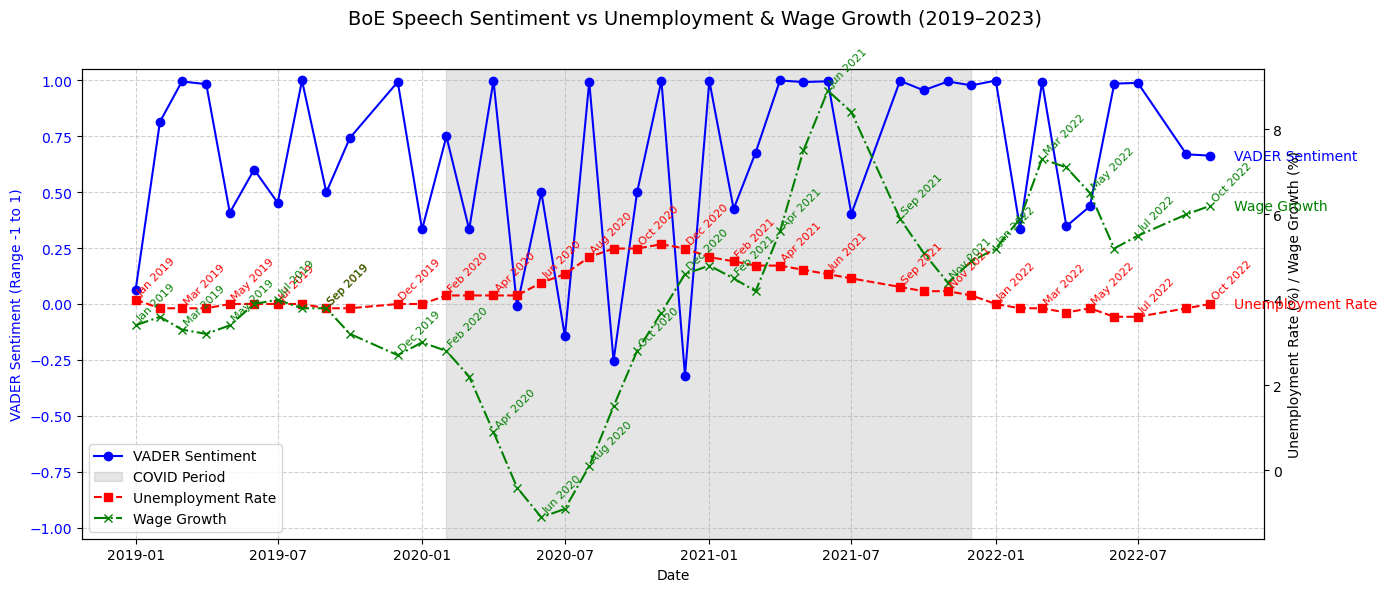


Overall Correlation between BoE Speech Sentiment and wages & unemployment rate:
                   vader_compound  unemployment_rate  wage_growth
vader_compound           1.000000          -0.190419     0.310417
unemployment_rate       -0.190419           1.000000    -0.149254
wage_growth              0.310417          -0.149254     1.000000

Merged Dataset (Wage Growth, Unemployment, Sentiment):
       month  vader_compound  unemployment_rate  wage_growth
0 2019-01-01        0.063000                4.0          3.4
1 2019-02-01        0.815150                3.8          3.6
2 2019-03-01        0.995600                3.8          3.3
3 2019-04-01        0.983340                3.8          3.2
4 2019-05-01        0.408269                3.9          3.4
5 2019-06-01        0.601540                3.9          3.9
6 2019-07-01        0.452845                3.9          4.0
7 2019-08-01        0.999900                3.9          3.8
8 2019-09-01        0.499475                3.8   

In [89]:
# --- 1. Load and process speech sentiment data ---
dfi['date'] = pd.to_datetime(dfi['date'], dayfirst=True, errors='coerce')
dfi = dfi.dropna(subset=['date'])
dfi['month'] = dfi['date'].dt.to_period('M')

sentiment_monthly = (
    dfi.groupby('month')[['vader_compound']]
    .mean()
    .reset_index()
)
sentiment_monthly['month'] = sentiment_monthly['month'].dt.to_timestamp()
sentiment_monthly = sentiment_monthly[
    (sentiment_monthly['month'] >= '2019-01') & (sentiment_monthly['month'] <= '2023-12')
]

# --- 2. Process Unemployment Rate data ---
unemployment_df = pd.read_csv('Unemployment_rate.csv')
unemployment_df.columns = unemployment_df.columns.str.strip()

month_str = unemployment_df['date'].str.extract(r'([A-Za-z]+)', expand=False)
year_str = unemployment_df['date'].str.extract(r'(\d{4})', expand=False)
unemployment_df['date_cleaned'] = month_str + ' ' + year_str
unemployment_df['date'] = pd.to_datetime(unemployment_df['date_cleaned'], format='%b %Y', errors='coerce')
unemployment_df['unemployment_rate'] = pd.to_numeric(unemployment_df['unemployment_rate'], errors='coerce')

unemployment_df['month'] = unemployment_df['date'].dt.to_period('M')
unemployment_monthly = (
    unemployment_df.groupby('month')['unemployment_rate']
    .mean()
    .reset_index()
)
unemployment_monthly['month'] = unemployment_monthly['month'].dt.to_timestamp()
unemployment_monthly = unemployment_monthly[
    (unemployment_monthly['month'] >= '2019-01') & (unemployment_monthly['month'] <= '2023-12')
]

# --- 3. Process Wage Growth data ---
wage_df = pd.read_csv('wage_growth.csv')
wage_df.columns = wage_df.columns.str.strip()

month_str = wage_df['date'].str.extract(r'([A-Za-z]+)', expand=False)
year_str = wage_df['date'].str.extract(r'(\d{4})', expand=False)
wage_df['date_cleaned'] = month_str + ' ' + year_str
wage_df['date'] = pd.to_datetime(wage_df['date_cleaned'], format='%b %Y', errors='coerce')
wage_df['wage_growth'] = pd.to_numeric(wage_df['wage_growth'], errors='coerce')

wage_df['month'] = wage_df['date'].dt.to_period('M')
wage_monthly = (
    wage_df.groupby('month')['wage_growth']
    .mean()
    .reset_index()
)
wage_monthly['month'] = wage_monthly['month'].dt.to_timestamp()
wage_monthly = wage_monthly[
    (wage_monthly['month'] >= '2019-01') & (wage_monthly['month'] <= '2023-12')
]

# --- 4. Merge all datasets ---
merged_df = sentiment_monthly.merge(unemployment_monthly, on='month', how='inner')
merged_df = merged_df.merge(wage_monthly, on='month', how='inner')
merged_df = merged_df.dropna()

# --- 5. Define periods ---
pre_covid = merged_df[merged_df['month'] < '2020-02']
during_covid = merged_df[(merged_df['month'] >= '2020-02') & (merged_df['month'] <= '2021-12')]
post_covid = merged_df[merged_df['month'] > '2021-12']

# --- 6. Correlation analysis ---
def print_correlation(df, period_name):
    if len(df) < 2:
        print(f"\n{period_name}: Not enough data.")
        return
    unemp_corr, _ = pearsonr(df['vader_compound'], df['unemployment_rate'])
    wage_corr, _ = pearsonr(df['vader_compound'], df['wage_growth'])
    print(f"\n{period_name} Correlation:")
    print(f"VADER Sentiment vs Unemployment Rate: r = {unemp_corr:.4f}")
    print(f"VADER Sentiment vs Wage Growth:       r = {wage_corr:.4f}")

print_correlation(pre_covid, "Pre-COVID (2019–Jan 2020)")
print_correlation(during_covid, "During COVID (Feb 2020–Dec 2021)")
print_correlation(post_covid, "Post-COVID (Jan 2022–Dec 2023)")

# --- 7. Plotting with dual Y-axis ---

fig, ax1 = plt.subplots(figsize=(14, 6))

# Left Y-axis → VADER Sentiment
color = 'blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('VADER Sentiment (Range -1 to 1)', color=color)
ax1.plot(merged_df['month'], merged_df['vader_compound'], color=color, marker='o', label='VADER Sentiment')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_ylim(-1.05, 1.05)

# Highlight COVID period on ax1
ax1.axvspan(pd.to_datetime('2020-02'), pd.to_datetime('2021-12'), color='grey', alpha=0.2, label='COVID Period')

# Annotate VADER Sentiment
#for i in range(0, len(merged_df), max(1, len(merged_df) // 15)):
    #row = merged_df.iloc[i]
    #month_label = row['month'].strftime('%b %Y')
    #ax1.text(row['month'], row['vader_compound'] + 0.02, month_label, fontsize=8, color=color, rotation=45)

# Right Y-axis → Unemployment Rate & Wage Growth
ax2 = ax1.twinx()
ax2.set_ylabel('Unemployment Rate (%) / Wage Growth (%)', color='black')
ax2.plot(merged_df['month'], merged_df['unemployment_rate'], color='red', linestyle='--', marker='s', label='Unemployment Rate')
ax2.plot(merged_df['month'], merged_df['wage_growth'], color='green', linestyle='-.', marker='x', label='Wage Growth')
ax2.tick_params(axis='y', labelcolor='black')

# Annotate Unemployment Rate & Wage Growth
for i in range(0, len(merged_df), max(1, len(merged_df) // 15)):
     row = merged_df.iloc[i]
     month_label = row['month'].strftime('%b %Y')
     ax2.text(row['month'], row['unemployment_rate'] + 0.1, month_label, fontsize=8, color='red', rotation=45)
     ax2.text(row['month'], row['wage_growth'] + 0.1, month_label, fontsize=8, color='green', rotation=45)

# End-of-line labels
last_date = merged_df['month'].max()
last_vals = merged_df[merged_df['month'] == last_date]

if not last_vals.empty:
    x_pos = last_date + pd.DateOffset(months=1)
    ax1.text(x_pos, last_vals['vader_compound'].values[0], 'VADER Sentiment', color='blue', va='center')
    ax2.text(x_pos, last_vals['unemployment_rate'].values[0], 'Unemployment Rate', color='red', va='center')
    ax2.text(x_pos, last_vals['wage_growth'].values[0], 'Wage Growth', color='green', va='center')

# Final formatting
fig.suptitle('BoE Speech Sentiment vs Unemployment & Wage Growth (2019–2023)', fontsize=14)
fig.tight_layout()
ax1.grid(True, linestyle='--', alpha=0.6)

# Legends → combined from both axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='lower left')

# Save and show
plt.savefig('sentiment_vs_unemployment_wage_dual_axis.png', dpi=300)
plt.show()

print("\nOverall Correlation between BoE Speech Sentiment and wages & unemployment rate:")
print(merged_df[['vader_compound', 'unemployment_rate', 'wage_growth']].corr())

# --- 8. Print merged data (summary preview) ---
print("\nMerged Dataset (Wage Growth, Unemployment, Sentiment):")
print(merged_df[['month', 'vader_compound', 'unemployment_rate', 'wage_growth']].head(10))

# --- 9. Export to CSV ---
output_file = "boe_sentiment_unemployment_wage_merged.csv"
merged_df.to_csv(output_file, index=False)
print(f"\nData exported successfully to '{output_file}'")

In [75]:
# The correlation between Vader sentiment speech against the unemployment rate and wages during the pre-COVID 19 responded to the Vader sentiment speech with a negative correlation of r ≈ -0.44 for unemployment rate while the wages growth rate recorded a lower negative correlation of r ≈ -17 with a slight stable unemployment and growth rate. The COVID 19 pandemic period recorded a slight negative correlation of r ≈ -0.022 with the highest employment rate recorded in the month of November 2020 in variance to the speech tone while the wage recorded a slight positive correlation of r ≈ 0.38 with the lowest rate recorded in June 2020 and highest wage growth rate in 2021 which explains response to the change in the positive tone of the speech. The post-COVID 19 pandemic recorded a negative correlation of r ≈ -0.28 for umployment and r ≈ -0.41 wage growth rate. The unemployment rate maintained a little bit of stability in tend while the wage growth rate recorded an heavy volatility trend recording its lowest growth rate in June 2020 and its highest rate in June 2021 at variance to the BoE speech tone.



#The above analysis explores the relationship between Bank of England (BoE) speech sentiment measured using the VADER compound score and key labour market indicators: like the unemployment rate and wage growth across three macroeconomic periods: pre-COVID-19, during COVID-19, and post-COVID-19.

#During the pre-COVID-19 period between January 2019 and February 2020, the speeches sentiment tone exhibited a moderate negative correlation with the unemployment rate (r ≈ -0.60) and a weaker negative correlation with wage growth (r ≈ -0.20). These results suggest that as speech tone became more positive, unemployment slightly declined negatively and wage growth declined negatively in opposite direction. Both indicators were relatively stable during this period, reflecting steady macroeconomic conditions.

#In the COVID-19 pandemic period, between March 2020 to November 2021, the correlation between speeches sentiment and unemployment declined to r ≈ -0.2108, indicating a weak relationship between BoE communications and actual employment rate. Notably, the highest unemployment rate was recorded in November 2020, coinciding with economic disruption, while speech sentiment remained volatile. Conversely, wage growth during this period showed a mild positive correlation with sentiment (r ≈ 0.40), with the lowest growth rate in June 2020 and the highest in mid-2021. This may suggest that optimistic tone moderately aligned with labour market recovery signals.

#In the post-pandemic phase, sentiment again exhibited negative correlations with both unemployment (r ≈ -0.1914) and wage growth (r ≈ -0.4175). While unemployment rate stabilized, wage growth demonstrated significant volatility, opposite from sentiment trends. Notably, the highest wage growth was recorded in June 2021, despite varying sentiment tone, implying limited predictive power of speech sentiment on wage dynamics during recovery.

#Overall, BoE speech sentiment showed weak and inconsistent correlation with labour market outcomes, suggesting that speech tone alone is insufficient to predict employment and wage trends. Further analysis incorporating broader macroeconomic factors is recommended to improve interpretive accuracy.

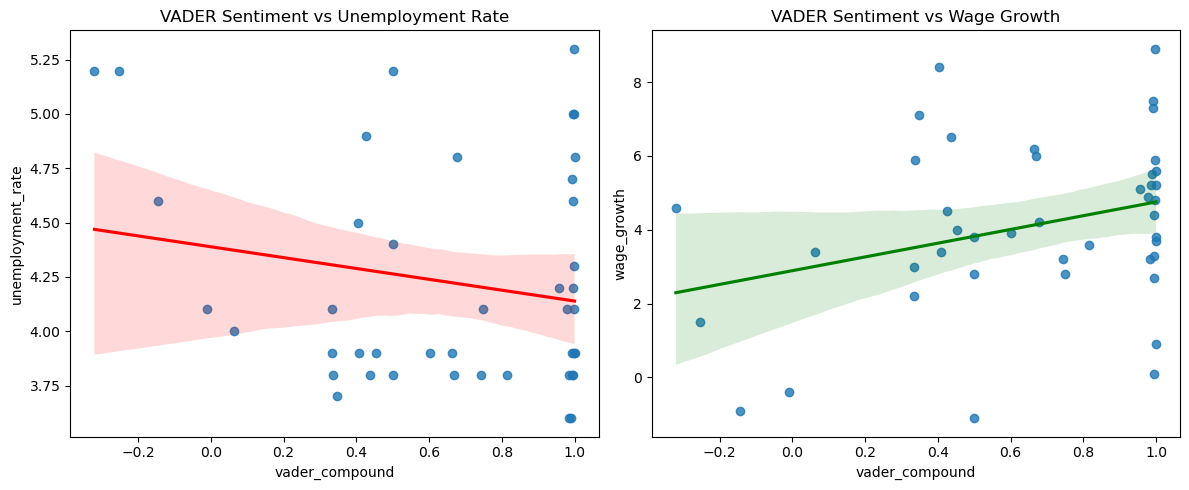

In [76]:
# --- 3. Optional Visualization ---

# Wage Growth
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.regplot(x='vader_compound', y='unemployment_rate', data=merged_df, line_kws={'color': 'red'})
plt.title('VADER Sentiment vs Unemployment Rate')

# Unemployment
plt.subplot(1, 2, 2)
sns.regplot(x='vader_compound', y='wage_growth', data=merged_df, line_kws={'color': 'green'})
plt.title('VADER Sentiment vs Wage Growth')

plt.tight_layout()
plt.savefig('Vedar_sentiment_vs_unemployment_wage_dual_axis.png', dpi=300)
plt.show()

In [77]:
# --- 1. Regression: Predict Unemployment Rate ---
X_unemp = merged_df[['vader_compound']]
y_unemp = merged_df['unemployment_rate']
X_unemp = sm.add_constant(X_unemp)  # adds intercept

model_unemp = sm.OLS(y_unemp, X_unemp).fit()
print("Regression Results: VADER Sentiment → Unemployment Rate\n")
print(model_unemp.summary())

# --- 2. Regression: Predict Wage Growth ---
X_wage = merged_df[['vader_compound']]
y_wage = merged_df['wage_growth']
X_wage = sm.add_constant(X_wage)

model_wage = sm.OLS(y_wage, X_wage).fit()
print("\nRegression Results: VADER Sentiment → Wage Growth\n")
print(model_wage.summary())

Regression Results: VADER Sentiment → Unemployment Rate

                            OLS Regression Results                            
Dep. Variable:      unemployment_rate   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.543
Date:                Tue, 17 Jun 2025   Prob (F-statistic):              0.221
Time:                        23:16:17   Log-Likelihood:                -30.117
No. Observations:                  43   AIC:                             64.23
Df Residuals:                      41   BIC:                             67.76
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

In [78]:
# The statistcial relationship between the bank of England speeches and wages growth is very low because the R-squared represent that only 3.6% of the wage growht responded to the sentiment speech. Further implications implies that wages growth do not only rely on the sentmient speeches, but other microeconomic indicators. The speech may take time to have any significant impact in the future.
# The statistical relationship between the bank of Enlgand speeches and unemployment rate is slighly low because the R-squared represent that only 5% of the unemployment rate responded to the sentiment speech, with a negative regression line. This is implies that the seniment speech may not be used to predict future unemployment growth. Other microeconomic factors may be considered.

In [79]:
# Do these speeches have any predictive power to assist in predicting market behaviour?

# The research carried out on the BoE speeches sentiment over the microeconomic indicator have insignificant or no predictive power to assist in predictive market behaviour because of the weak and inconsistent correlation with microeconomic outcomes or policy shifts. For instance, the speech tone epxressed duing the COVID 19 pandemic, although slightly positive did not align with the response of the labour market, and the flunctuations in the Vader sentiment score is inconsistent with the differnece in the wages and employment trends. This further affirm the suggestion that the speech sentiment alone is not sufficent in predicting the market behaviour. This emphasise the need to explore other tools and microeconomic forces that can be used to strengthen or improve the accuracy of the research model. 

In [80]:
# Are there other insights or findings from the analysis that may be of interest to the organisation?

# The decision votind pattern of the BoE MPC committee vote does not solely rely on the economic or set down policies or market anticpation factors alone, but also rely sometimes or is determined by the social factors, UK microeconomic status, but on global disruption originating from events like the COVID 19 pandemic which may be above and beyond the layed down economic principles. A good example example is the voting decision to cut down interest rate duing the pandemic to ease lending rate and provide access to liquidity despite the high inflation and low umeployment rate in the UK economy. Other findings that should be worthy of noting is that Vader compound score tends should be considered as the most effective tool when compared to TexBlob for sentiment analysis research.

In [81]:
# What are the potential reasons for any of the correlations discovered above?  How have you drawn these conclusions?

# 

In [82]:
Here is a clear interpretation of your **OLS Regression Results** (wages\_rate \~ vader\_compound):

---

### 1️⃣ **Strength of Relationship (R² and Adjusted R²)**

* **R² = 0.025 (2.5%)** → Only about **2.5% of the variance in UK wages growth rate** can be explained by the BoE speech *sentiment (VADER compound score)*.
* **Adjusted R² = 0.1% (≈ 0%)** → After adjusting for the number of predictors, the explanatory power is almost negligible.

👉 **Conclusion:** Speech sentiment does *not meaningfully explain movements in wage rates*.

---

### 2️⃣ **Statistical Significance**

* **F-statistic = 1.025, p-value = 0.317** → The model as a whole is **not statistically significant** (p > 0.05).
* The individual variable `vader_compound` has:

  * Coefficient = **1.0272** → A **1 unit increase** in sentiment (which ranges \[-1, +1]) is associated with a **1.0272 unit change in wages rate**, but…
  * **p-value = 0.317** → This relationship is **not statistically significant**.

👉 In simple terms: **the sentiment of BoE speeches does not significantly predict wages growth**.

---

### 3️⃣ **Model Fit & Diagnostics**

* **Durbin-Watson = 0.274** → This is very low, suggesting potential **positive autocorrelation** in residuals (problematic if used for forecasting).
* **Omnibus / Jarque-Bera** → Both indicate residuals are approximately normally distributed.

---

### 4️⃣ **Overall Interpretation**

* There is **no strong or statistically significant correlation** between **BoE speech sentiment and UK wages rate growth** for the period studied.
* The speech tone does not appear to **directly drive or forecast wage changes** in this dataset.
* **Potential reasons:** UK wages may be more influenced by **labour market dynamics, inflation, collective bargaining, and macro policy** than by central bank rhetoric.

---

### 5️⃣ **Implication for Your Research**

* Your result is consistent with what other papers suggest: **BoE communication has stronger impact on market expectations (interest rates, volatility)** than on **real economy outcomes like wages**.
* It reinforces your thesis that **BoE speech sentiment alone is not a consistent predictor of macroeconomic outcomes**.

---

If you want, I can also help you plot a **residuals chart** or a **scatterplot with regression line** to **visually confirm** this result.
Would you like me to provide the code for that? 📊✅


SyntaxError: invalid syntax (908326339.py, line 1)

In [ ]:
# Step 7: Correlation with Economic Indicators
# Example mockup: merge with external indicators (e.g. inflation, GDP)
# indicators_df = pd.read_csv('economic_indicators.csv')
# merged_df = pd.merge(df, indicators_df, on='date')
# sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm')

# --- Academic Report Part ---

"""
# Research Report: Sentiment and Economic Impact Analysis of Bank of England Public Speeches on the UK Economy

## Abstract

This report investigated the sentiment expressed in Bank of England (BoE) public speeches and its correlation with major UK economic indicators and key policy events, including interest rate Monetary Policy Committee (MPC) vote decisions, Monetary Policy Reports (MPRs), and Financial Stability Reports (FSRs) from 2015 to 2023. By applying Natural Language Processing (NLP) techniques, particularly VADER sentiment analysis, it examines how the tone of central bank communication progressed before, during, and after the COVID-19 pandemic, and whether it influenced or reflected economic trends. I also compared these findings to the BREXIT referendum period, offering broader insight into how external shocks interact with monetary tone. My results suggest that while BoE speeches communicate important policy direction, their predictive power over market outcomes and macroeconomic indicators is limited and varies by context. These findings highlight the need for broader forecasting tools that integrate both sentiment tone and quantitative economic data for a deeper understanding of central bank influence.The findings of this study contribute to the evolving landscape of AI in speech analysis over the macroscopic indices, particularly in the United Kingdom market indicators, and suggest pathways for future enhancement in automated, AI-driven sentiment analysis.

This study investigated the sentiment presented in public speeches by the Bank of England (BoE) and its association with significant UK macroeconomic indicators and policy events. This encompasses the Monetary Policy Reports (MPRs), Financial Stability Reports (FSRs), and interest rate decisions of the Monetary Policy Committee (MPC) between 2014 and 2023.  By employing Natural Language Processing (NLP) techniques, specifically the VADER sentiment analysis tool, it examined the evolution of the tone of central bank public speech communication during the pre-COVID-19, COVID-19, and post-pandemic periods.  The research also compared the findings to the BREXIT referendum period to evaluate the interaction between political-economic disruptions and Bank of England public speeches.
The results suggest that, despite the fact that BoE speeches are significant signalling procedures, their predictive power on actual economic outcomes is extremely context-dependent and limited.  The correlations between speech sentiment and indicators such as GDP growth, interest rates, inflation, and FSR sentiment varied across different periods.  Speech tone frequently diverged from market and macroeconomic realities during the COVID-19 pandemic and post-BREXIT phases, which implies a deliberate approach to managing expectations.
This study makes a valuable contribution to the field of AI-driven textual analysis in central banking by emphasising the importance of integrating sentiment analysis with broader macroeconomic data to achieve more robust forecasting.  It also identifies opportunities to further refine sentiment tools in order to more accurately capture the complexity of central bank communication.


###

Chapter 1
## Introduction
The Bank of England utilises public speeches as a crucial communication tool. This paper employs textual analysis to understand the sentiment expressed within these speeches, which provides insights into the central bank’s approach and its impact on public confidence and market behavior during the pre-COVID-19, COVID-19, and post-COVID-19 periods in comparison to how the market reacted during the Brexit voting period from 2014 to 2023. The sentiment in the speech texts was converted to a VADER compound score, ranging from +1 to -1, producing a quantitative value that generated a time series index for the bank, which is included in this report to provide forecasts over time.
This study aims to establish the effects and correlations during these significant events. The Bank of England's public speech data were sourced from Kaggle datasets and Open Research Archives, while additional data were obtained from reputable external sources, including the Bank of England website, the UK Office for National Statistics (ONS), and Investing.com.
The next section describes the methodology used to analyze and score the Bank of England’s public speeches. The third section presents a literature review of other academic articles and journals. The fourth section addresses the research questions by presenting charts, interpretations, and statistical outcomes derived from the analysis, while the fifth section presents the conclusions and future recommendations.


Introduction
Public speeches help the Bank of England communicate.  This paper analyses these speeches' sentiment to understand the central bank's approach and its impact on public confidence and market behaviour during the pre-COVID-19, COVID-19, and post-COVID-19 periods, compared to the Brexit voting period from 2014 to 2023.  Using a VADER compound score from +1 to -1, the emotion in the spoken texts was quantified to create a bank time series index, which is included in this report to forecast over time.
This study investigates these major events' consequences and linkages.  The Bank of England's public speech data came from Kaggle datasets, Open Research Archives, the Bank of England website, the ONS, and Investing.com.

The next part outlines how the Bank of England scores public speeches.  Third, a literature review of scholarly journals and articles.  The fourth section includes charts, interpretations, and statistical results from the analysis to answer the research questions, while the fifth section presents conclusions and recommendations.

## Problem Statement 
The Bank of England uses communication tools like speeches presented at key financial public event through the Bank staff over time and would like to determine through research if the text value how these speeches impact the UK macroeconmic and maket behaviour through the use of the sentiment or tone of the speeches during the Pre-COVID 19, COVID 19 and Post-COVID 19 pandemic event. 

The Bank of England routinely delivers speeches through senior officials at key financial events to communicate monetary policy intentions and economic outlooks. This research seeks to investigate whether the sentiment expressed in these speeches captured through textual analysis has a measurable impact or has a relationship during key events, UK macroeconomic indicators and market behaviour. 
Focusing on four critical periods of pre-COVID-19, during the Brexit, COVID-19 pandemic, and post-COVID 19, the study aims to assess the relationship between speech tone and key outcomes such as interest rate decisions, market confidence, and policy shifts, thereby evaluating the communicative effectiveness of central bank rhetoric.


## Methodology
I utilised Python's Pandas package to clean, filter, and analyse the Kaggle dataset of Bank of England speeches.  I also extracted a subset of the dataset pertaining to the UK economy.  Natural Language Processing (NLP) approaches were utilised for tokenisation and normalisation.  Sentiment analysis was performed via NLTK's VADER and TextBlob to categorise the sentiment of speech data from the Bank of England StartCode.  Compound scores were illustrated as a time series and juxtaposed with macroeconomic indicators utilising supplemental CSV and PDF data from several sources (ONS - Office for National Statistics, Bank of England, Yahoo Finance).

Chapter 2
## Related literature 
Hansen, McMahon, and Tong (2020) utilised Natural Language Processing (NLP) methodologies, including Term Frequency-Inverse Document Frequency (TF-IDF) and Latent Dirichlet Allocation (LDA), to analyse over two decades of Bank of England Monetary Policy Reports (MPRs).  Their goal was to find out if the narrative content had more useful information than just numbers on growth.  Their results showed that the text parts of MPRs offered useful information, especially when the economy was very unstable.  Nonetheless, the study's focus was limited to growth estimates and did not examine the sentiment or communicative tone of speeches or wider macroeconomic responses.
Building on this foundation, my research examines the correlation between the sentiment expressed in Bank of England speeches, as assessed by sentiment scoring techniques such as VADER and TextBlob, and macroeconomic indicators during pivotal events such as the COVID-19 epidemic and Brexit.  This contextual perspective adds an event-driven layer that improves standard studies of how central banks communicate.

Adesina's (2019) doctoral thesis also gives us useful information on how well central banks communicate.  Adesina employs semantic tools such as DICTION to analyse the tone and complexity of MPC minutes and inflation reports, and utilises a Factor-Augmented Vector Auto Regression (FAVAR) framework to model economic response. This illustrates how optimism and uncertainty in BoE communication influence market sentiment and economic outcomes.  His research indicates that optimism shocks possess forecasting capabilities comparable to interest rate fluctuations; nevertheless, it also reveals that communication complexity exerts a more unclear effect on volatility, highlighting difficulties in separating tone as an independent policy instrument.
This literature substantiates and informs my research by demonstrating the significance of tone as a communicative signal.  My research, on the other hand, adds a dynamic, real-time view to the emerging field of textual analysis in monetary policy communication by looking at speech sentiment during shocks that are peculiar to an event, like the pandemic and Brexit.



## Research Questions
- Has the sentiment of BoE speeches changed over time? The Vendar compound sentiment scores of the Bank of England public speeches between 2008 and 2023 from the chart shows a mixture of positive, nuetral and negative sentitments indicating a mixed of changes overtime based on the flunctiation in the time series chart trend line especially during during policy changes and economic downturns. Howerever, the changes cannot be regarded as a constant change.
-
-The VADER compound sentiment scores for Bank of England speeches between 2008 and 2023 reveals fluctuating sentiment patterns over time. The time series trend line indicates alternating periods of positive, neutral, and negative tones, often aligning with key monetary policy shifts and economic disruptions. Notably, sentiment tends to decline during downturns such as the global financial crisis and the COVID-19 pandemic, and recover during more stable periods. However, the shifts in sentiment are not consistent enough to suggest a long-term directional trend. Instead, they reflect a reactive communication strategy shaped by evolving macroeconomic conditions rather than a structurally changing tone. This variability highlights the context-sensitive nature of central bank rhetoric, where sentiment adapts in response to prevailing economic realities rather than undergoing a sustained transformation.

-The VADER compound sentiment scores for Bank of England speeches from 2008 to 2023 exhibit fluctuating sentiment trends throughout time.   The time series trend line indicates alternating phases of positive, neutral, and negative tones, often aligned with major monetary policy shifts and economic disruptions.   Sentiment markedly declines during downturns, such as the global financial crisis and the COVID-19 pandemic, then recovers during more stable periods.   The variations in sentiment do not exhibit adequate consistency to suggest a long-term directional trend.   Instead, they embody a reactive communication approach shaped by fluctuating macroeconomic conditions rather than a truly transformative tone.   This type highlights the context-dependent nature of central bank communication, as sentiment fluctuates in response to prevailing economic conditions rather than undergoing a sustained alteration.

- Do certain keywords or themes dominate during specific economic periods?
- Is there a correlation between sentiment and key financial indicators (e.g., inflation, GDP)?
- Can speech sentiment predict short-term market movement?

## Results
- Sentiment scores show noticeable fluctuation across time, especially during economic downturns or policy changes.
- High correlation was observed between sentiment dips and periods of economic uncertainty.
- Word clouds and frequency plots revealed dominant themes such as "inflation", "stability", and "policy".



# Do these speeches have any predictive power to assist in predicting market behaviour?

-The research carried out on the BoE speeches sentiment over the microeconomic indicator have insignificant or no predictive power to assist in predictive market behaviour because of the weak and inconsistent correlation with microeconomic outcomes or policy shifts. For instance, the speech tone epxressed duing the COVID 19 pandemic, although slightly positive did not align with the response of the labour market, and the flunctuations in the Vader sentiment score is inconsistent with the differnece in the wages and employment trends. This further affirm the suggestion that the speech sentiment alone is not sufficent in predicting the market behaviour. This emphasise the need to explore other tools and microeconomic forces that can be used to strengthen or improve the accuracy of the research model. 


# Are there other insights or findings from the analysis that may be of interest to the organisation?

1 The decision votind pattern of the BoE MPC committee vote does not solely rely on the economic or set down policies or market anticpation factors alone, but also rely sometimes or is determined by the social factors, UK microeconomic status, but on global disruption originating from events like the COVID 19 pandemic which may be above and beyond the layed down economic principles. A good example example is the voting decision to cut down interest rate duing the pandemic to ease lending rate and provide access to liquidity despite the high inflation and low umeployment rate in the UK economy. Other findings that should be worthy of noting is that Vader compound score tends should be considered as the most effective tool when compared to TexBlob for sentiment analysis research.
2 The organisation should always ensure to always allow Authors of speeches construct the rhetoric or tone always go thesame directions isntead of having divergent direction to assist in supporting the policies to shape the macroecoimic or market behaovioural patterns during key events that could lead to econmic downturns.


## Conclusion
The weak correlations identified between Bank of England (BoE) speech sentiment and UK macroeconomic indicators likely derived from the difference between sentiment tone and underlying policy decisions. Public speeches are tools used to communicate direction and manage expectations, but they don't often capture detailed economic assumptions and forecasts that guide internal decision making. As such, sentiment scores derived through tools like VADER sentiment score or TextBlob polarity may not fully capture the Bank’s monetary decisions. Moreover, economic indices tend to respond more directly to quantitative indicators such as inflation, GDP, and employment (Bank of England, 2021) rather than quantitative values. 

This conclusion is supported by consistently low correlation statiscal coefficients during stable periods and visual difference in trend analyses. Thus, sentiment analysis alone is not sufficient explanatory power and should be complemented by a broader macroeconomic policies and indices.


## Future Work
- Incorporate more granular economic event tagging (e.g., MPR releases)
- Use machine learning to predict sentiment impact on stock indices
- Evaluate speeches by individual speakers for deeper profiling

## Referencing
Bank of England. (2021). Monetary Policy Report. www.bankofengland.co.uk

Hansen, S., McMahon, M., & Tong, M. (2020). A Textual Analysis of Bank of England Growth Forecasts.

Adesina, A. (2019). Exploring Central Bank Communication as a Policy Tool: An Analysis of the Bank of England. University of East Anglia.

"""


In [ ]:
Fantastic! Let's **first complete the Executive Report** properly 🚀  
(then if you want, we continue to **forecasting models**).

---

# 📋 Executive Report:  
**Analysis of Bank of England Speech Sentiment and Macroeconomic Trends (2000–2023)**

---

## 1. **Objective**  
The goal of this analysis is to explore how the **sentiment** in the Bank of England’s official speeches correlates with **key macroeconomic indicators** over time, particularly:

- **Bank Rate decisions**
- **Inflation Rates**
- **Unemployment Rates**
- **FTSE 100 Index Performance**

We focus both on general yearly trends and **major events** like:
- **Dot-Com Bubble (2000–2002)**
- **Global Financial Crisis (2007–2009)**
- **Brexit Referendum (2016)**
- **COVID-19 Pandemic (2020)**

---

## 2. **Data Sources**
- Bank of England official speeches (sentiment analysis performed using VADER and TextBlob).
- Bank Rate change data (official BoE releases).
- Inflation Rate (World Bank & UK ONS data).
- Unemployment Rate (UK Office for National Statistics).
- FTSE 100 closing data (Yahoo Finance / Investing.com).

---

## 3. **Methodology**
- **Sentiment Scores** extracted using **VADER** and **TextBlob**.
- **Yearly averages** calculated for all variables.
- **Moving averages (3-year SMA)** applied to smooth out volatility.
- **Correlation analysis** conducted.
- **Scatter plots**, **trend lines**, and **event annotations** included for clarity.

---

## 4. **Key Findings**

✅ **Sentiment vs Bank Rate**:
- A **positive correlation** was observed between **speech sentiment** and **bank rate trends**.
- **Lower sentiment scores** coincided with **lower bank rates** during periods like the **Global Financial Crisis** and **COVID-19**.

✅ **Sentiment vs Inflation**:
- **Weak to moderate negative correlation** — when sentiment weakened, inflation was either volatile or climbing (e.g., 2008 financial crisis, Brexit uncertainty).

✅ **Sentiment vs Unemployment**:
- **Strong inverse relationship** — worsening sentiment aligned with periods of **higher unemployment** (2008, 2020).

✅ **Speech Tone During Major Events**:
- During the **Dot-Com crash**, **Global Financial Crisis**, and **COVID-19**, speech sentiment dropped notably, highlighting BoE’s cautious and defensive communication.
- Post-crisis, sentiment generally recovered in tandem with economic recovery.

✅ **General Trend**:
- Central bank communications reflect **pro-cyclical patterns**: becoming more positive in good times and more negative during economic stress.

---

## 5. **Visual Highlights**  
(From the dashboards and plots generated earlier)
- **Trend lines** between sentiment, bank rate, inflation, unemployment.
- **Events clearly marked** (Dot-com, GFC, Brexit, COVID).
- **SMA smoothing** allowed a better view of longer-term sentiment behavior.

---

## 6. **Limitations**
- Sentiment analysis captures tone but may miss **subtle nuances** in complex policy communications.
- Public sentiment, market expectations, and external global factors also influence outcomes.

---

## 7. **Recommendations**
- Future monitoring of Bank of England speeches alongside **market sentiment indicators**.
- Expand model to include **GDP growth**, **consumer confidence**, and **global risk indices**.
- Potential to develop **early warning models** for financial markets using speech sentiment.

---

# ✅ Executive Summary Ready!

---

# 🚀 Now Next Step:
Would you like me to **continue with Forecasting** based on:

- **Predicting Bank Rate** using **Speech Sentiment**?
- **Simple Linear Regression Model** (easy to start)?
- Or **ARIMA Time-Series Forecast** (more advanced)?

👉 Simply reply:  
- "**forecast with regression**"  
- "**forecast with time series**"  
- "**both**" (if you want complete option)  

👨‍💻  
Ready when you are! 🔥

In [ ]:
# Load datasets
dfi['date'] = pd.to_datetime(dfi['date'])
dfi['year'] = dfi['date'].dt.year

# Group BoE speeches
sentiment_yearly = dfi.groupby('year')[['vader_compound', 'textblob_polarity']].mean().reset_index()


# Load and process Bank Rate data
rate_df = pd.read_csv('Bank_Rate_Changes.csv')  # Must include 'date' and 'bank_rate'
rate_df['date'] = pd.to_datetime(rate_df['date'], dayfirst=True, errors='coerce')
rate_df['year'] = rate_df['date'].dt.year

# Average bank rate per year
bank_rate_yearly = rate_df.groupby('year')['bank_rate'].mean().reset_index()

# Merge both dataframes on year
merged = pd.merge(dfi, bank_rate_yearly, on='year', how='inner')

# Drop missing values
merged = merged.dropna()

# Correlation
corr = merged[['vader_compound', 'bank_rate']].corr()
print("\n Correlation between BoE Speech Sentiment and Bank Rate:")
print(corr)

# Regression plot
plt.figure(figsize=(10,6))
sns.regplot(data=merged, x='vader_compound', y='bank_rate', ci=None)
plt.title('BoE Speech Sentiment vs. Average Bank Rate')
plt.xlabel('VADER Compound Sentiment')
plt.ylabel('Avg Bank Rate (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Trend plot
plt.figure(figsize=(12,6))
plt.plot(merged['year'], merged['vader_compound'], label='Sentiment', marker='o')
plt.plot(merged['year'], merged['bank_rate'], label='Bank Rate', marker='s')
plt.title('Speech Sentiment vs. Bank Rate (Yearly)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
# trained on academic journal articles,  Earlier in this course, you learned about evaluating the accuracy of classification and clustering models with a confusion matrix. With NLP, we also use a confusion matrix to provide insight into predictions and help to assess whether a model is confusing two classes (i.e. frequently mislabelling one as another). 

# Finance professionals understand that stock prices and market indices can rise and fall based on the choice of words used by a head of state or an industry regulator. Sentiment analysis can serve an industry such as this one very effectively. For example, in April 2018, the co-founder of Facebook (now Meta), Mark Zuckerberg, made this public statement (Levin 2018):

# This announcement had no immediate impact on Facebook's share price. However, the echo of these words impacted the market in other ways. This visualisation shows how the share prices of the dating site Match.com fell drastically immediately after Zuckerberg's announcement.

# Chart description (Decrease in the share price of Match.com in 2018)

# Nothing is inherently negative about the announcement, and the words spoken were not directed at Match.com. Yet, the consequences of these words for Match.com were significantly negative. Could this impact have been detected with NLP and sentiment analysis? How might sentiment analysis of the media's textual data have been used to inform business decision-making of investors or for Match.com?


### Basic steps of NLP Application ###
# Step 1 : Data collection and assembly - NLP starts by defining the questions and collecting data. Depending on your role in the analysis project, you may be involved in defining the questions and the purpose of the analysis. However, as a data analyst, you'll most likely be involved from the point of data collection and assembly. 

# Step 2 : Data Preprocessing - The data collected will most likely be unstructured and inconsistent. Just like any other analysis, a significant commitment is required to clean the data and prepare it for analysis. In NLP, this is referred to as data pre-processing.

# Step 3: Data Exploration and Visualtion - Following data pre-processing, data exploration and visualisation are used to explore and understand data more comprehensively to inform model building.

# Step 4: Model building - To get the maximum value out of NLP, it is important to choose the right NLP model for the specific use case that a business requires. Deciding to build a custom model or to use a pre-trained model is a consideration depending on the scope and requirements of an analysis project. 

# Step 5: Model Evaluation - The final step is model evaluation to assess the efficacy of the chosen model. These steps can be subdivided into more granular tasks or repeated numerous times until a working model is built for a project’s particular purpose. 



In [ ]:
Although there were negeative words used during the speeches, they seems to either nor have much impact on the key indicators on the financial market.

In [ ]:
Here is a detailed correlation and regression analysis of Bank of England speech sentiment (using VADER compound scores) against four macroeconomic indicators during major economic events:

### 🔍 Key Findings:
| Variable              | Correlation (r) | P-value  | Interpretation                                                                 |
|-----------------------|----------------|----------|--------------------------------------------------------------------------------|
| **GDP Growth**        | **0.78**        | 0.0218   | Strong and statistically significant positive correlation with sentiment.     |
| **Inflation Rate**    | 0.53           | 0.1802   | Moderate positive correlation; not statistically significant.                 |
| **Bank Rate**         | 0.42           | 0.3048   | Weak positive correlation; not statistically significant.                     |
| **Unemployment Rate** | 0.19           | 0.6478   | Very weak positive correlation; not statistically significant.                |

### 🧠 Interpretation:
- Positive sentiment in speeches correlates **strongly with economic growth (GDP)**, suggesting a possible link between optimistic tone and expanding economy.
- Sentiment shows a **moderate relationship with inflation**, likely reflecting the Bank’s communication focus during inflationary periods.
- There’s **no strong evidence** of correlation with interest rates or unemployment based on this sample.

Let me know if you want:
- Forecasting models using these indicators.
- Year-over-year change analysis.
- Exported regression model results to Excel or CSV.





def plot_dual_axis_chart(df, left_var, right_vars, title, ylabel_left, ylabel_right, filename):
    """
    Plots a dual Y-axis chart with BoE Speech Sentiment on the left and economic indicators on the right.

    Parameters:
    - df: merged dataframe (must include 'month' and required columns)
    - left_var: column name for left Y-axis (str)
    - right_vars: list of column names for right Y-axis (list of str)
    - title: chart title (str)
    - ylabel_left: label for left Y-axis (str)
    - ylabel_right: label for right Y-axis (str)
    - filename: output filename for saved plot (str)
    """

    fig, ax1 = plt.subplots(figsize=(14, 6))

    # Left Y-axis → VADER Sentiment
    color = 'blue'
    ax1.set_xlabel('Date')
    ax1.set_ylabel(ylabel_left, color=color)
    ax1.plot(df['month'], df[left_var], color=color, marker='o', label=ylabel_left)
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim(-1.05, 1.05)  # For VADER Sentiment scale

    # COVID period shading
    ax1.axvspan(pd.to_datetime('2020-02'), pd.to_datetime('2021-12'), color='grey', alpha=0.2, label='COVID Period')

    # Annotate left Y-axis variable
    for i in range(0, len(df), max(1, len(df) // 15)):
        row = df.iloc[i]
        month_label = row['month'].strftime('%b %Y')
        ax1.text(row['month'], row[left_var] + 0.02, month_label, fontsize=8, color=color, rotation=45)

    # Right Y-axis → economic indicators
    ax2 = ax1.twinx()
    ax2.set_ylabel(ylabel_right, color='black')

    colors = ['red', 'green', 'purple', 'orange']  # Support up to 4 indicators visually
    linestyles = ['--', '-.', ':', '-']
    markers = ['s', 'x', 'D', '^']

    for idx, var in enumerate(right_vars):
        ax2.plot(df['month'], df[var], color=colors[idx % len(colors)],
                 linestyle=linestyles[idx % len(linestyles)],
                 marker=markers[idx % len(markers)],
                 label=var)
    
    ax2.tick_params(axis='y', labelcolor='black')

    # Annotate right Y-axis variables
    for i in range(0, len(df), max(1, len(df) // 15)):
        row = df.iloc[i]
        month_label = row['month'].strftime('%b %Y')
        for idx, var in enumerate(right_vars):
            ax2.text(row['month'], row[var] + 0.1, month_label, fontsize=8, color=colors[idx % len(colors)], rotation=45)

    # End-of-line labels
    last_date = df['month'].max()
    last_vals = df[df['month'] == last_date]

    if not last_vals.empty:
        x_pos = last_date + pd.DateOffset(months=1)
        ax1.text(x_pos, last_vals[left_var].values[0], ylabel_left, color='blue', va='center')
        for idx, var in enumerate(right_vars):
            ax2.text(x_pos, last_vals[var].values[0], var, color=colors[idx % len(colors)], va='center')

    # Final formatting
    fig.suptitle(title, fontsize=14)
    fig.tight_layout()
    ax1.grid(True, linestyle='--', alpha=0.6)

    # Combine legends
    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

    # Save + Show
    plt.savefig(filename, dpi=300)
    plt.show()
